In [ ]:
!pip install torch torchvision scikit-learn matplotlib pandas

In [1]:
import os
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, models, transforms
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Define the path to the dataset
dataset_path = "C:/Users/rishi/Desktop/JHU/Critical Infrastructure Protection/Major Project/Data Sets/Sonar/TrainSetMotionBlur"  # Update this with your dataset folder

# Define transformations for preprocessing
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to DenseNet121 input size
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # ImageNet normalization
])

# Load dataset using ImageFolder
dataset = datasets.ImageFolder(root=dataset_path, transform=preprocess)

# Print class names
class_names = dataset.classes
print(f"Classes: {class_names}")

Classes: ['BigAnimals', 'Mines', 'Pipes', 'Rockets', 'Vehicles']


In [3]:
# Load DenseNet121 with pretrained weights
def load_densenet(num_classes):
    model = models.densenet121(weights=models.DenseNet121_Weights.DEFAULT)  # Pretrained on ImageNet
    model.classifier = nn.Linear(model.classifier.in_features, num_classes)  # Replace final layer
    return model


In [4]:
# Define train-test split (80-20%)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Define DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [5]:
# Define a dictionary of optimizers
def get_optimizer(optimizer_name, model, learning_rate, weight_decay):
    if optimizer_name == "adam":
        return torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    elif optimizer_name == "sgd":
        return torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=weight_decay)
    elif optimizer_name == "rmsprop":
        return torch.optim.RMSprop(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    else:
        raise ValueError(f"Unsupported optimizer: {optimizer_name}")

In [6]:
# Parameter grid for hyperparameter search
param_grid = {
    'learning_rate': [0.001, 0.0001, 0.0005],
    'batch_size': [16, 32],
    'optimizer': ['adam', 'sgd', 'rmsprop'],
    'weight_decay': [0.0, 1e-3, 1e-4],
    'num_epochs': [10, 15, 20]
}

In [7]:
# Train and test the model with cross-validation
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print (device)

cuda


Testing: lr=0.001, batch_size=16, optimizer=adam, weight_decay=0.0, epochs=10
Epoch 1/10, Loss: 1.3159171442190807
Epoch 2/10, Loss: 0.8608208497365316
Epoch 3/10, Loss: 0.5492924551169077
Epoch 4/10, Loss: 0.47848162924249965
Epoch 5/10, Loss: 0.42694353808959323
Epoch 6/10, Loss: 0.4601979475054476
Epoch 7/10, Loss: 0.31599741325610214
Epoch 8/10, Loss: 0.2897598370909691
Epoch 9/10, Loss: 0.3007129236227936
Epoch 10/10, Loss: 0.3009856185979313
Accuracy: 75.71%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.86      0.71      0.77        17
       Mines       0.36      0.50      0.42         8
       Pipes       1.00      0.85      0.92        13
     Rockets       0.88      0.88      0.88        17
    Vehicles       0.65      0.73      0.69        15

    accuracy                           0.76        70
   macro avg       0.75      0.73      0.74        70
weighted avg       0.79      0.76      0.77        70



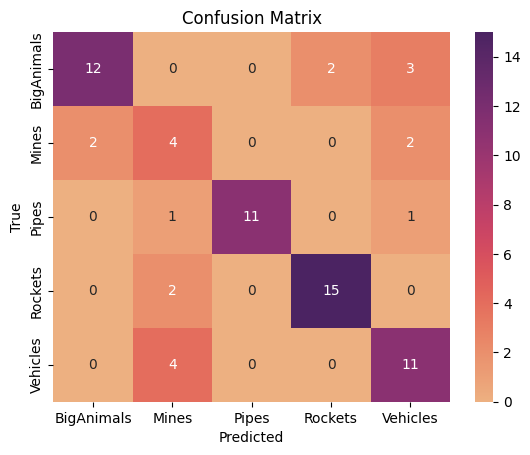

Testing: lr=0.001, batch_size=16, optimizer=adam, weight_decay=0.0, epochs=15
Epoch 1/15, Loss: 1.181510888867908
Epoch 2/15, Loss: 0.7717554436789619
Epoch 3/15, Loss: 0.7229849563704597
Epoch 4/15, Loss: 0.4376304660820299
Epoch 5/15, Loss: 0.3302390082842774
Epoch 6/15, Loss: 0.35287102974123424
Epoch 7/15, Loss: 0.4457888665298621
Epoch 8/15, Loss: 0.2780104970766438
Epoch 9/15, Loss: 0.2489586662915018
Epoch 10/15, Loss: 0.1401359715188543
Epoch 11/15, Loss: 0.1443929581178559
Epoch 12/15, Loss: 0.08604646344772643
Epoch 13/15, Loss: 0.2437950682101978
Epoch 14/15, Loss: 0.2185420429127084
Epoch 15/15, Loss: 0.11725447326898575
Accuracy: 78.57%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.80      0.94      0.86        17
       Mines       0.83      0.62      0.71         8
       Pipes       0.57      1.00      0.72        13
     Rockets       1.00      0.53      0.69        17
    Vehicles       1.00      0.80      0.89    

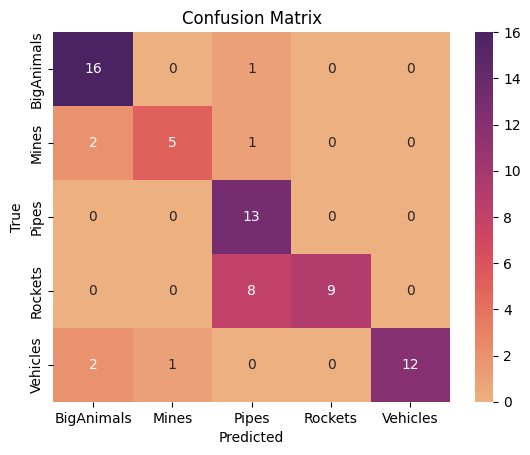

Testing: lr=0.001, batch_size=16, optimizer=adam, weight_decay=0.0, epochs=20
Epoch 1/20, Loss: 1.3593411578072443
Epoch 2/20, Loss: 0.6957312987910377
Epoch 3/20, Loss: 0.5388952179087533
Epoch 4/20, Loss: 0.512137850953473
Epoch 5/20, Loss: 0.4509381420082516
Epoch 6/20, Loss: 0.5467688826223215
Epoch 7/20, Loss: 0.34677599204911125
Epoch 8/20, Loss: 0.23244149175783
Epoch 9/20, Loss: 0.20068734190944168
Epoch 10/20, Loss: 0.17399440788560444
Epoch 11/20, Loss: 0.22372927620179123
Epoch 12/20, Loss: 0.21447837363100714
Epoch 13/20, Loss: 0.24116719100210401
Epoch 14/20, Loss: 0.13456191055269706
Epoch 15/20, Loss: 0.16143206196526685
Epoch 16/20, Loss: 0.03965021799215012
Epoch 17/20, Loss: 0.03706552378005452
Epoch 18/20, Loss: 0.03959053289145231
Epoch 19/20, Loss: 0.17086084665627116
Epoch 20/20, Loss: 0.34550746623426676
Accuracy: 72.86%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       1.00      0.29      0.45        17
       Mine

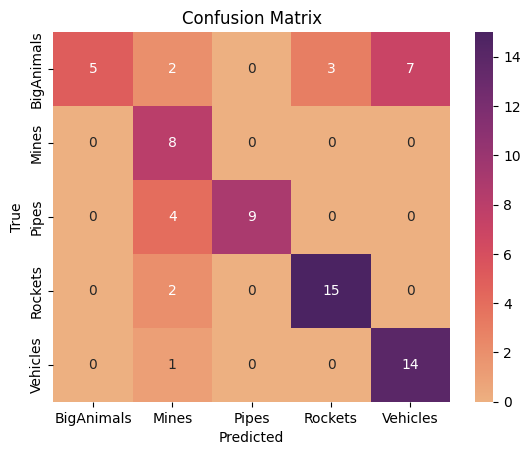

Testing: lr=0.001, batch_size=16, optimizer=adam, weight_decay=0.001, epochs=10
Epoch 1/10, Loss: 1.2619886298974354
Epoch 2/10, Loss: 0.9443494611316257
Epoch 3/10, Loss: 0.6078204297357135
Epoch 4/10, Loss: 0.5172032399310006
Epoch 5/10, Loss: 0.39081207497252357
Epoch 6/10, Loss: 0.3693668184181054
Epoch 7/10, Loss: 0.41063598295052844
Epoch 8/10, Loss: 0.46054812851879334
Epoch 9/10, Loss: 0.4146622212396728
Epoch 10/10, Loss: 0.24947771843936709
Accuracy: 72.86%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       1.00      0.41      0.58        17
       Mines       0.40      0.75      0.52         8
       Pipes       1.00      0.85      0.92        13
     Rockets       0.84      0.94      0.89        17
    Vehicles       0.61      0.73      0.67        15

    accuracy                           0.73        70
   macro avg       0.77      0.74      0.72        70
weighted avg       0.81      0.73      0.73        70



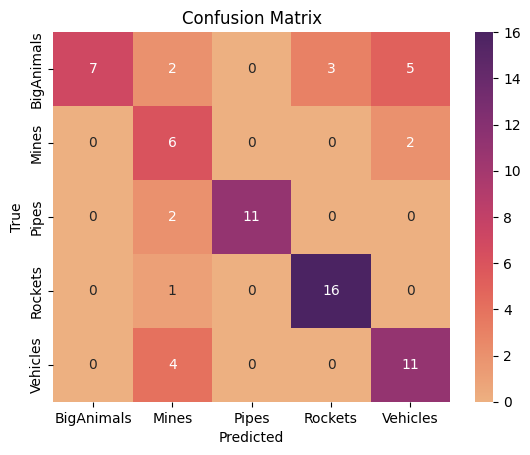

Testing: lr=0.001, batch_size=16, optimizer=adam, weight_decay=0.001, epochs=15
Epoch 1/15, Loss: 1.3301368753115337
Epoch 2/15, Loss: 0.7794862041870753
Epoch 3/15, Loss: 0.5607431903481483
Epoch 4/15, Loss: 0.3466300658053822
Epoch 5/15, Loss: 0.32958202477958465
Epoch 6/15, Loss: 0.3830691816078292
Epoch 7/15, Loss: 0.3830206323828962
Epoch 8/15, Loss: 0.38015758784280884
Epoch 9/15, Loss: 0.3130950302713447
Epoch 10/15, Loss: 0.26858124426669544
Epoch 11/15, Loss: 0.21843874351018006
Epoch 12/15, Loss: 0.18712039519515303
Epoch 13/15, Loss: 0.26666977256536484
Epoch 14/15, Loss: 0.08799814875237644
Epoch 15/15, Loss: 0.11227748325715463
Accuracy: 87.14%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.93      0.82      0.88        17
       Mines       1.00      0.50      0.67         8
       Pipes       0.93      1.00      0.96        13
     Rockets       0.94      0.88      0.91        17
    Vehicles       0.71      1.00      

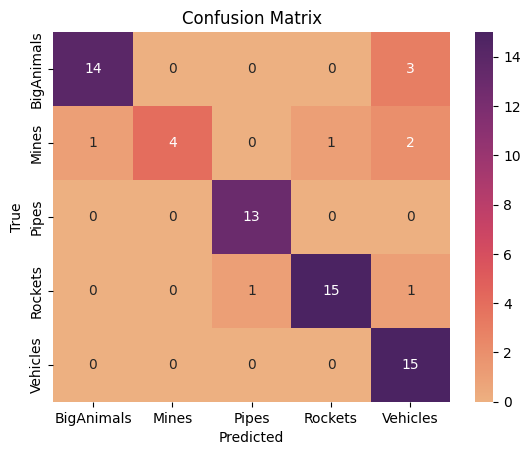

Testing: lr=0.001, batch_size=16, optimizer=adam, weight_decay=0.001, epochs=20
Epoch 1/20, Loss: 1.26490451892217
Epoch 2/20, Loss: 0.886320130692588
Epoch 3/20, Loss: 0.5419471570187144
Epoch 4/20, Loss: 0.5229191684888469
Epoch 5/20, Loss: 0.3987874661882718
Epoch 6/20, Loss: 0.2774049699720409
Epoch 7/20, Loss: 0.4892459333770805
Epoch 8/20, Loss: 0.36686989002757603
Epoch 9/20, Loss: 0.43224819749593735
Epoch 10/20, Loss: 0.3271113832791646
Epoch 11/20, Loss: 0.33625825825664735
Epoch 12/20, Loss: 0.3200943399634626
Epoch 13/20, Loss: 0.23954217984444565
Epoch 14/20, Loss: 0.31016076169908047
Epoch 15/20, Loss: 0.31013189628720284
Epoch 16/20, Loss: 0.2828404706799322
Epoch 17/20, Loss: 0.24076718567974037
Epoch 18/20, Loss: 0.24325748139785397
Epoch 19/20, Loss: 0.2190048024058342
Epoch 20/20, Loss: 0.12547173195828995
Accuracy: 88.57%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       1.00      0.71      0.83        17
       Mines 

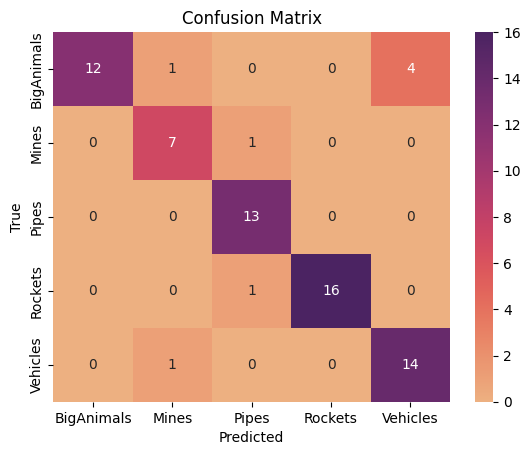

Testing: lr=0.001, batch_size=16, optimizer=adam, weight_decay=0.0001, epochs=10
Epoch 1/10, Loss: 1.2238005532158747
Epoch 2/10, Loss: 0.8977964835034477
Epoch 3/10, Loss: 0.6251490960518519
Epoch 4/10, Loss: 0.43423590312401456
Epoch 5/10, Loss: 0.3467690551446544
Epoch 6/10, Loss: 0.39427990631924736
Epoch 7/10, Loss: 0.3452397675977813
Epoch 8/10, Loss: 0.2530912334720294
Epoch 9/10, Loss: 0.22765662583212057
Epoch 10/10, Loss: 0.23323921921352544
Accuracy: 88.57%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.79      0.88      0.83        17
       Mines       0.89      1.00      0.94         8
       Pipes       0.92      0.92      0.92        13
     Rockets       1.00      0.76      0.87        17
    Vehicles       0.88      0.93      0.90        15

    accuracy                           0.89        70
   macro avg       0.90      0.90      0.89        70
weighted avg       0.90      0.89      0.89        70



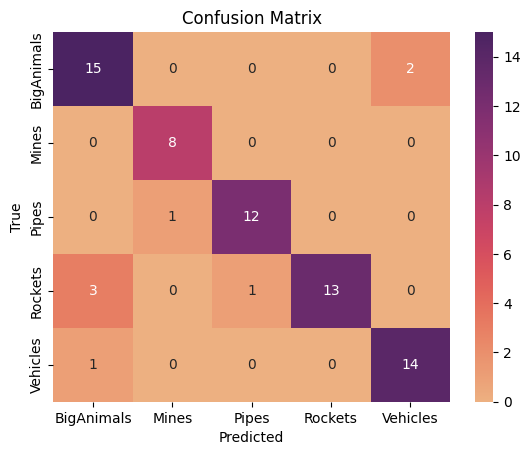

Testing: lr=0.001, batch_size=16, optimizer=adam, weight_decay=0.0001, epochs=15
Epoch 1/15, Loss: 1.2226989600393507
Epoch 2/15, Loss: 0.6650352908505334
Epoch 3/15, Loss: 0.6621903818514612
Epoch 4/15, Loss: 0.5477879962159528
Epoch 5/15, Loss: 0.5370912783675723
Epoch 6/15, Loss: 0.2986035802298122
Epoch 7/15, Loss: 0.21401843594180214
Epoch 8/15, Loss: 0.18199589517381456
Epoch 9/15, Loss: 0.20792707925041518
Epoch 10/15, Loss: 0.0845289169293311
Epoch 11/15, Loss: 0.10621259909951025
Epoch 12/15, Loss: 0.21996090240362617
Epoch 13/15, Loss: 0.1795534978931149
Epoch 14/15, Loss: 0.21309195003575748
Epoch 15/15, Loss: 0.372310522529814
Accuracy: 71.43%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.80      0.47      0.59        17
       Mines       1.00      0.12      0.22         8
       Pipes       1.00      0.92      0.96        13
     Rockets       0.71      0.88      0.79        17
    Vehicles       0.54      0.93      0.

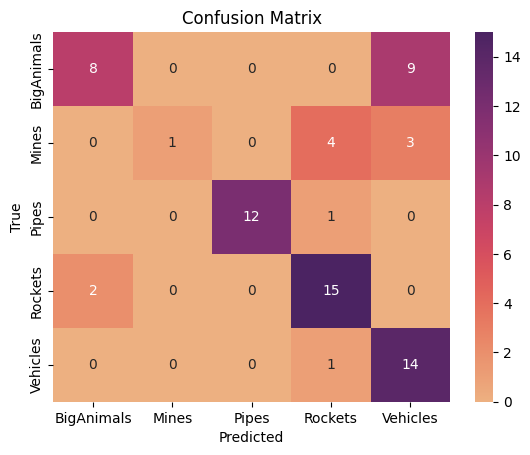

Testing: lr=0.001, batch_size=16, optimizer=adam, weight_decay=0.0001, epochs=20
Epoch 1/20, Loss: 1.333391613430447
Epoch 2/20, Loss: 0.7984770900673337
Epoch 3/20, Loss: 0.5952431079414156
Epoch 4/20, Loss: 0.5032965913414955
Epoch 5/20, Loss: 0.5519603921307458
Epoch 6/20, Loss: 0.3786856685247686
Epoch 7/20, Loss: 0.40054090155495536
Epoch 8/20, Loss: 0.37629204284813667
Epoch 9/20, Loss: 0.2225105683836672
Epoch 10/20, Loss: 0.2729784260607428
Epoch 11/20, Loss: 0.33993736861480606
Epoch 12/20, Loss: 0.22136744608481726
Epoch 13/20, Loss: 0.17546384491854244
Epoch 14/20, Loss: 0.15078808460384607
Epoch 15/20, Loss: 0.08045798338328798
Epoch 16/20, Loss: 0.1904436047706339
Epoch 17/20, Loss: 0.12741771495590606
Epoch 18/20, Loss: 0.10813302215602663
Epoch 19/20, Loss: 0.1360307863085634
Epoch 20/20, Loss: 0.09717614829747213
Accuracy: 90.00%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       1.00      0.94      0.97        17
       Mi

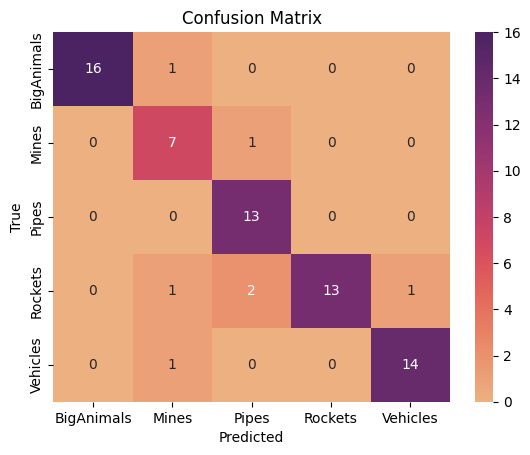

Testing: lr=0.001, batch_size=16, optimizer=sgd, weight_decay=0.0, epochs=10
Epoch 1/10, Loss: 1.5637811885939703
Epoch 2/10, Loss: 1.1477216647730932
Epoch 3/10, Loss: 0.699371928970019
Epoch 4/10, Loss: 0.39547090397940743
Epoch 5/10, Loss: 0.21438506866494814
Epoch 6/10, Loss: 0.23004808090627193
Epoch 7/10, Loss: 0.10749984511898623
Epoch 8/10, Loss: 0.08036743601163228
Epoch 9/10, Loss: 0.04793130327016115
Epoch 10/10, Loss: 0.02991490097095569
Accuracy: 87.14%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.82      0.82      0.82        17
       Mines       0.88      0.88      0.88         8
       Pipes       0.87      1.00      0.93        13
     Rockets       1.00      0.88      0.94        17
    Vehicles       0.80      0.80      0.80        15

    accuracy                           0.87        70
   macro avg       0.87      0.88      0.87        70
weighted avg       0.88      0.87      0.87        70



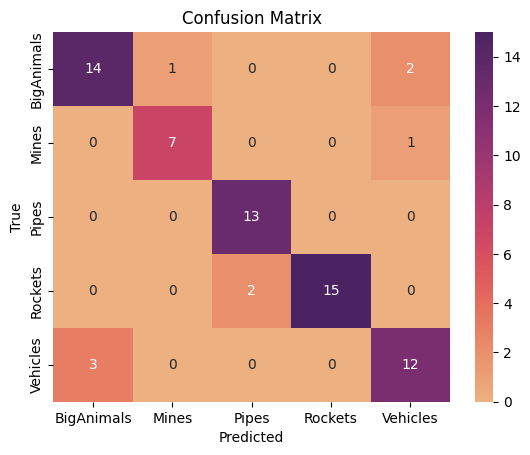

Testing: lr=0.001, batch_size=16, optimizer=sgd, weight_decay=0.0, epochs=15
Epoch 1/15, Loss: 1.5827418830659654
Epoch 2/15, Loss: 1.1033646530575223
Epoch 3/15, Loss: 0.7086956219540702
Epoch 4/15, Loss: 0.47600404421488446
Epoch 5/15, Loss: 0.22346006126867402
Epoch 6/15, Loss: 0.1356024386154281
Epoch 7/15, Loss: 0.11260335271557172
Epoch 8/15, Loss: 0.06797200855281618
Epoch 9/15, Loss: 0.072014931589365
Epoch 10/15, Loss: 0.039431465272274285
Epoch 11/15, Loss: 0.04114039149135351
Epoch 12/15, Loss: 0.032077579371010266
Epoch 13/15, Loss: 0.02430645886084272
Epoch 14/15, Loss: 0.017099096517389018
Epoch 15/15, Loss: 0.01742738011913995
Accuracy: 91.43%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.84      0.94      0.89        17
       Mines       0.89      1.00      0.94         8
       Pipes       0.87      1.00      0.93        13
     Rockets       1.00      0.88      0.94        17
    Vehicles       1.00      0.80     

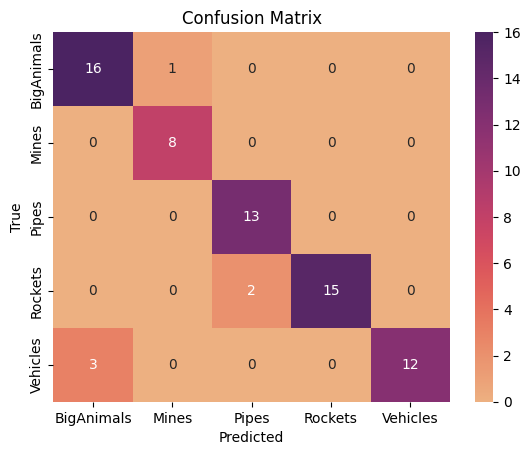

Testing: lr=0.001, batch_size=16, optimizer=sgd, weight_decay=0.0, epochs=20
Epoch 1/20, Loss: 1.6302647259500291
Epoch 2/20, Loss: 1.1496212283770244
Epoch 3/20, Loss: 0.766117501589987
Epoch 4/20, Loss: 0.3749275704224904
Epoch 5/20, Loss: 0.20636155870225695
Epoch 6/20, Loss: 0.11152703708244695
Epoch 7/20, Loss: 0.08844502311613825
Epoch 8/20, Loss: 0.07449662778526545
Epoch 9/20, Loss: 0.044747791459990874
Epoch 10/20, Loss: 0.03733806125819683
Epoch 11/20, Loss: 0.056018624609957136
Epoch 12/20, Loss: 0.03722760068356163
Epoch 13/20, Loss: 0.044097881505472794
Epoch 14/20, Loss: 0.03791066497150394
Epoch 15/20, Loss: 0.022511609545391466
Epoch 16/20, Loss: 0.022987343927121
Epoch 17/20, Loss: 0.042913954174663455
Epoch 18/20, Loss: 0.021254309388394985
Epoch 19/20, Loss: 0.01488838699232373
Epoch 20/20, Loss: 0.015704472419909306
Accuracy: 88.57%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.83      0.88      0.86        17
  

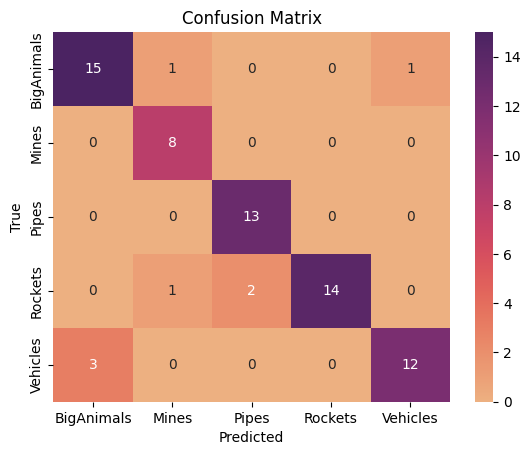

Testing: lr=0.001, batch_size=16, optimizer=sgd, weight_decay=0.001, epochs=10
Epoch 1/10, Loss: 1.6183576782544453
Epoch 2/10, Loss: 1.151165395975113
Epoch 3/10, Loss: 0.6922567387421926
Epoch 4/10, Loss: 0.40043890559011036
Epoch 5/10, Loss: 0.25082870241668487
Epoch 6/10, Loss: 0.1550979626675447
Epoch 7/10, Loss: 0.09535583553628789
Epoch 8/10, Loss: 0.06618312963594992
Epoch 9/10, Loss: 0.06962741218093368
Epoch 10/10, Loss: 0.04531335070108374
Accuracy: 87.14%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.76      0.94      0.84        17
       Mines       0.78      0.88      0.82         8
       Pipes       0.93      1.00      0.96        13
     Rockets       0.94      0.88      0.91        17
    Vehicles       1.00      0.67      0.80        15

    accuracy                           0.87        70
   macro avg       0.88      0.87      0.87        70
weighted avg       0.89      0.87      0.87        70



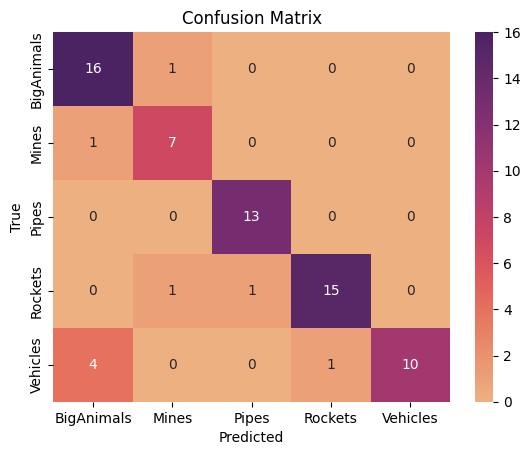

Testing: lr=0.001, batch_size=16, optimizer=sgd, weight_decay=0.001, epochs=15
Epoch 1/15, Loss: 1.5579733186297946
Epoch 2/15, Loss: 1.1226125160853069
Epoch 3/15, Loss: 0.6537569181786643
Epoch 4/15, Loss: 0.37706074118614197
Epoch 5/15, Loss: 0.25965191341108745
Epoch 6/15, Loss: 0.14405791709820429
Epoch 7/15, Loss: 0.09272742457687855
Epoch 8/15, Loss: 0.06675479488654269
Epoch 9/15, Loss: 0.08433946584247881
Epoch 10/15, Loss: 0.05920938940511809
Epoch 11/15, Loss: 0.046846698245240584
Epoch 12/15, Loss: 0.0578256556764245
Epoch 13/15, Loss: 0.06944700263233648
Epoch 14/15, Loss: 0.04896404309612182
Epoch 15/15, Loss: 0.028716810668508213
Accuracy: 94.29%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.94      0.94      0.94        17
       Mines       1.00      0.88      0.93         8
       Pipes       0.87      1.00      0.93        13
     Rockets       1.00      0.94      0.97        17
    Vehicles       0.93      0.93  

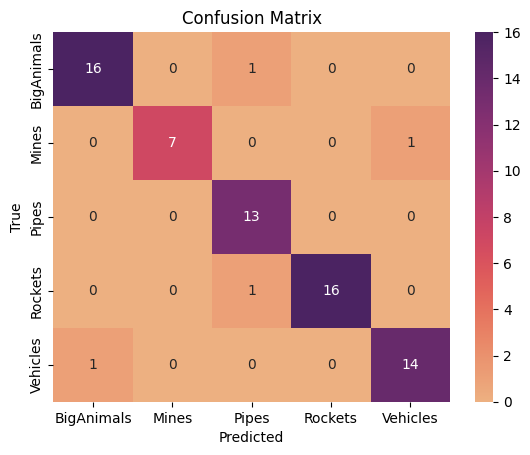

Testing: lr=0.001, batch_size=16, optimizer=sgd, weight_decay=0.001, epochs=20
Epoch 1/20, Loss: 1.56114082203971
Epoch 2/20, Loss: 1.0930574271414015
Epoch 3/20, Loss: 0.6799596034818225
Epoch 4/20, Loss: 0.3628530949354172
Epoch 5/20, Loss: 0.2613271586596966
Epoch 6/20, Loss: 0.14606581214401457
Epoch 7/20, Loss: 0.0960623145931297
Epoch 8/20, Loss: 0.08218450378626585
Epoch 9/20, Loss: 0.049754141002065606
Epoch 10/20, Loss: 0.056487583141360015
Epoch 11/20, Loss: 0.06849882736181219
Epoch 12/20, Loss: 0.039169583883550435
Epoch 13/20, Loss: 0.04295302084129718
Epoch 14/20, Loss: 0.022104238315174978
Epoch 15/20, Loss: 0.01936224175410138
Epoch 16/20, Loss: 0.02262901812274423
Epoch 17/20, Loss: 0.014333753316249285
Epoch 18/20, Loss: 0.02057252754457295
Epoch 19/20, Loss: 0.03176563114134802
Epoch 20/20, Loss: 0.02471846926750408
Accuracy: 92.86%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.89      0.94      0.91        17
   

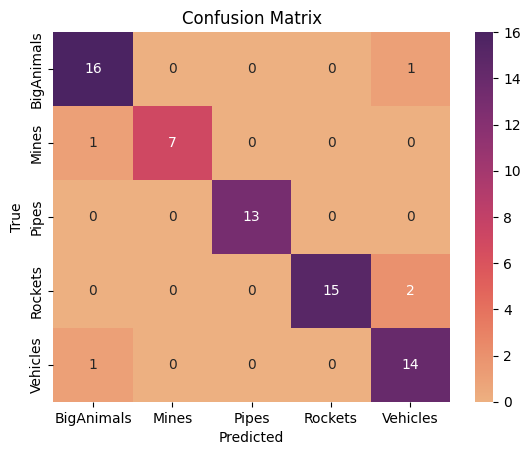

Testing: lr=0.001, batch_size=16, optimizer=sgd, weight_decay=0.0001, epochs=10
Epoch 1/10, Loss: 1.5631100204255846
Epoch 2/10, Loss: 1.0836715930038028
Epoch 3/10, Loss: 0.6473851783408059
Epoch 4/10, Loss: 0.35931578692462707
Epoch 5/10, Loss: 0.18659772061639363
Epoch 6/10, Loss: 0.11712151703735192
Epoch 7/10, Loss: 0.08130020772417386
Epoch 8/10, Loss: 0.06767996586859226
Epoch 9/10, Loss: 0.06559691060748365
Epoch 10/10, Loss: 0.06247075450503164
Accuracy: 92.86%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.88      0.88      0.88        17
       Mines       0.88      0.88      0.88         8
       Pipes       0.93      1.00      0.96        13
     Rockets       1.00      0.94      0.97        17
    Vehicles       0.93      0.93      0.93        15

    accuracy                           0.93        70
   macro avg       0.92      0.93      0.92        70
weighted avg       0.93      0.93      0.93        70



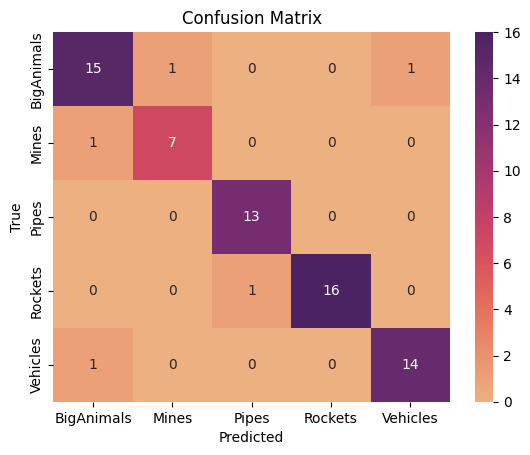

Testing: lr=0.001, batch_size=16, optimizer=sgd, weight_decay=0.0001, epochs=15
Epoch 1/15, Loss: 1.5793503522872925
Epoch 2/15, Loss: 1.0959728128380246
Epoch 3/15, Loss: 0.6583408498101764
Epoch 4/15, Loss: 0.3976025895939933
Epoch 5/15, Loss: 0.2740035578608513
Epoch 6/15, Loss: 0.18390114191505644
Epoch 7/15, Loss: 0.12006957021852334
Epoch 8/15, Loss: 0.06955376743442482
Epoch 9/15, Loss: 0.0644743125885725
Epoch 10/15, Loss: 0.050730957804868616
Epoch 11/15, Loss: 0.02948700005395545
Epoch 12/15, Loss: 0.03383289215465387
Epoch 13/15, Loss: 0.04717094482233127
Epoch 14/15, Loss: 0.03236681717034015
Epoch 15/15, Loss: 0.02683150406099028
Accuracy: 91.43%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.88      0.82      0.85        17
       Mines       0.89      1.00      0.94         8
       Pipes       0.93      1.00      0.96        13
     Rockets       1.00      0.94      0.97        17
    Vehicles       0.87      0.87    

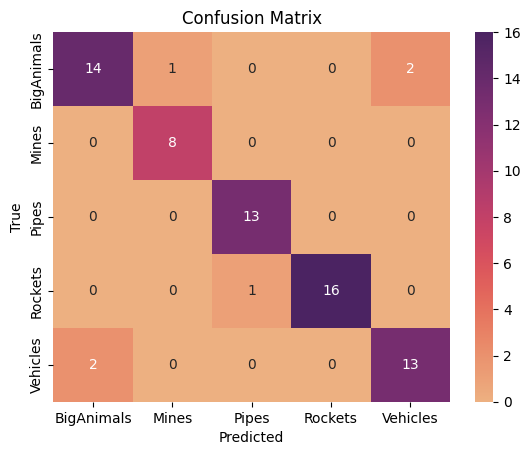

Testing: lr=0.001, batch_size=16, optimizer=sgd, weight_decay=0.0001, epochs=20
Epoch 1/20, Loss: 1.557450168662601
Epoch 2/20, Loss: 1.1520552337169647
Epoch 3/20, Loss: 0.7220147285196516
Epoch 4/20, Loss: 0.4461049222283893
Epoch 5/20, Loss: 0.21975003017319572
Epoch 6/20, Loss: 0.14794674888253212
Epoch 7/20, Loss: 0.10409317765798834
Epoch 8/20, Loss: 0.0728169276068608
Epoch 9/20, Loss: 0.06738946276406448
Epoch 10/20, Loss: 0.06836768084516127
Epoch 11/20, Loss: 0.033436318290316396
Epoch 12/20, Loss: 0.025020799910028774
Epoch 13/20, Loss: 0.02281461705246733
Epoch 14/20, Loss: 0.02733764683620797
Epoch 15/20, Loss: 0.021628164660392538
Epoch 16/20, Loss: 0.03127747947453625
Epoch 17/20, Loss: 0.02952832982151045
Epoch 18/20, Loss: 0.025880098148869973
Epoch 19/20, Loss: 0.01954006403684616
Epoch 20/20, Loss: 0.01549935327946312
Accuracy: 84.29%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.82      0.82      0.82        17
 

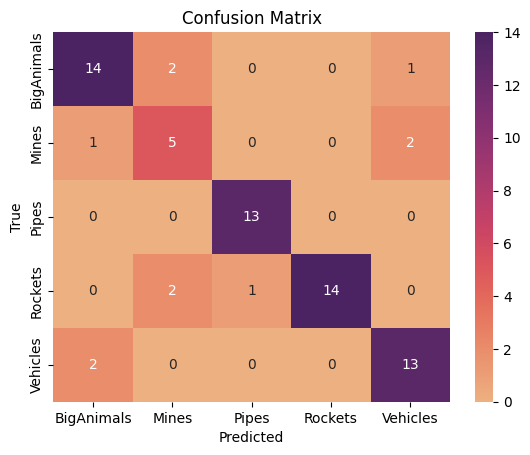

Testing: lr=0.001, batch_size=16, optimizer=rmsprop, weight_decay=0.0, epochs=10
Epoch 1/10, Loss: 2.313007242149777
Epoch 2/10, Loss: 1.5947746634483337
Epoch 3/10, Loss: 1.5178743137253656
Epoch 4/10, Loss: 1.463238040606181
Epoch 5/10, Loss: 1.5192996859550476
Epoch 6/10, Loss: 1.466447287135654
Epoch 7/10, Loss: 1.4689179592662387
Epoch 8/10, Loss: 1.2532103459040325
Epoch 9/10, Loss: 1.2252404888470967
Epoch 10/10, Loss: 1.1860280235608418
Accuracy: 17.14%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.00      0.00      0.00        17
       Mines       0.12      0.25      0.16         8
       Pipes       0.60      0.23      0.33        13
     Rockets       0.15      0.41      0.22        17
    Vehicles       0.00      0.00      0.00        15

    accuracy                           0.17        70
   macro avg       0.17      0.18      0.14        70
weighted avg       0.16      0.17      0.13        70



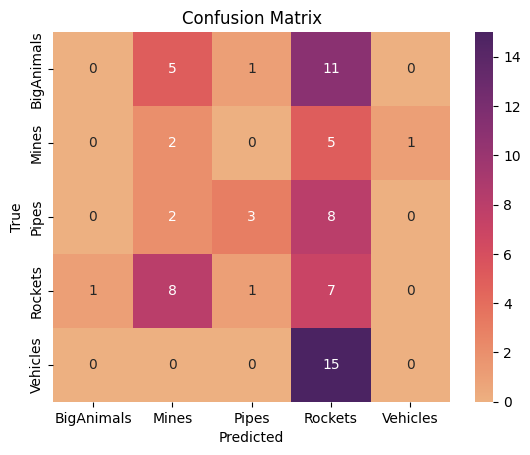

Testing: lr=0.001, batch_size=16, optimizer=rmsprop, weight_decay=0.0, epochs=15
Epoch 1/15, Loss: 2.2551365428500705
Epoch 2/15, Loss: 1.56572824716568
Epoch 3/15, Loss: 1.4768737289640639
Epoch 4/15, Loss: 1.495873683028751
Epoch 5/15, Loss: 1.3783258928192987
Epoch 6/15, Loss: 1.2382603122128382
Epoch 7/15, Loss: 1.198947525686688
Epoch 8/15, Loss: 1.0507337782118056
Epoch 9/15, Loss: 1.0797219706906214
Epoch 10/15, Loss: 0.9950878520806631
Epoch 11/15, Loss: 1.0100309517648485
Epoch 12/15, Loss: 0.979529450337092
Epoch 13/15, Loss: 0.8789013789759742
Epoch 14/15, Loss: 0.8212184508641561
Epoch 15/15, Loss: 0.7516705691814423
Accuracy: 54.29%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.65      0.76      0.70        17
       Mines       1.00      0.00      0.00         8
       Pipes       1.00      0.23      0.38        13
     Rockets       0.41      0.94      0.57        17
    Vehicles       0.75      0.40      0.52        

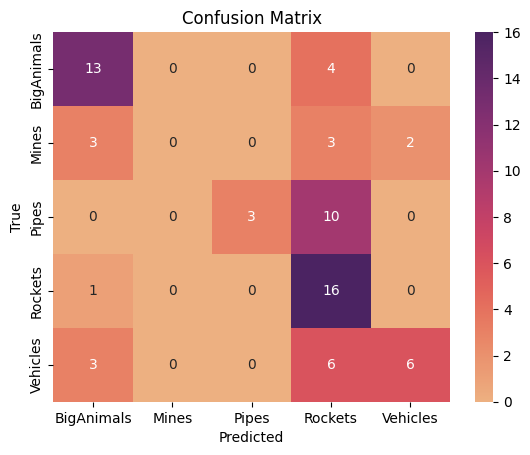

Testing: lr=0.001, batch_size=16, optimizer=rmsprop, weight_decay=0.0, epochs=20
Epoch 1/20, Loss: 2.212955892086029
Epoch 2/20, Loss: 1.551366560988956
Epoch 3/20, Loss: 1.3769195973873138
Epoch 4/20, Loss: 1.2576110031869676
Epoch 5/20, Loss: 1.2126989894443088
Epoch 6/20, Loss: 1.1604939334922366
Epoch 7/20, Loss: 1.0101485053698223
Epoch 8/20, Loss: 0.9061440130074819
Epoch 9/20, Loss: 0.9943851497438219
Epoch 10/20, Loss: 0.8537473910384707
Epoch 11/20, Loss: 0.7608304172754288
Epoch 12/20, Loss: 0.7484834343194962
Epoch 13/20, Loss: 0.5375645599431462
Epoch 14/20, Loss: 0.7575166672468185
Epoch 15/20, Loss: 0.5480092151297463
Epoch 16/20, Loss: 0.6483734564648734
Epoch 17/20, Loss: 0.5160077040394148
Epoch 18/20, Loss: 0.42662248346540665
Epoch 19/20, Loss: 0.5016558683580823
Epoch 20/20, Loss: 0.6405980305539237
Accuracy: 70.00%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.79      0.65      0.71        17
       Mines       

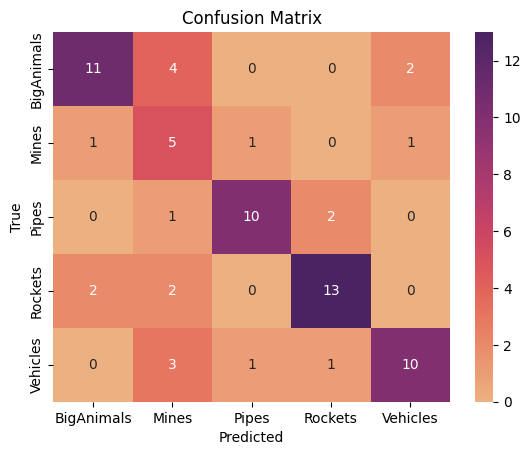

Testing: lr=0.001, batch_size=16, optimizer=rmsprop, weight_decay=0.001, epochs=10
Epoch 1/10, Loss: 2.293730742401547
Epoch 2/10, Loss: 1.6265119049284193
Epoch 3/10, Loss: 1.592082937558492
Epoch 4/10, Loss: 1.4811894827418857
Epoch 5/10, Loss: 1.3637937439812555
Epoch 6/10, Loss: 1.4310033586290147
Epoch 7/10, Loss: 1.2845697038703494
Epoch 8/10, Loss: 1.2944967846075695
Epoch 9/10, Loss: 1.118392629755868
Epoch 10/10, Loss: 1.093791703383128
Accuracy: 47.14%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.40      1.00      0.57        17
       Mines       0.00      0.00      0.00         8
       Pipes       0.55      0.85      0.67        13
     Rockets       0.67      0.12      0.20        17
    Vehicles       1.00      0.20      0.33        15

    accuracy                           0.47        70
   macro avg       0.52      0.43      0.35        70
weighted avg       0.57      0.47      0.38        70



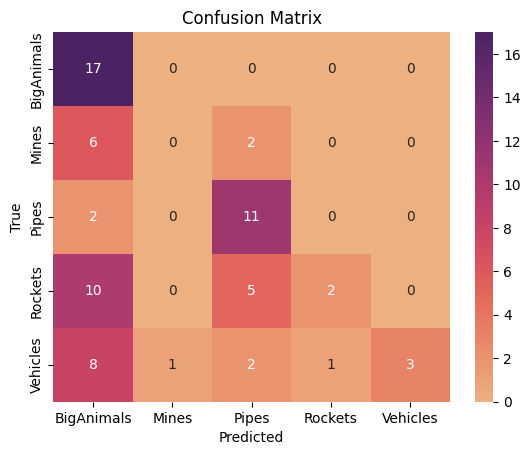

Testing: lr=0.001, batch_size=16, optimizer=rmsprop, weight_decay=0.001, epochs=15
Epoch 1/15, Loss: 2.1997998356819153
Epoch 2/15, Loss: 1.5891708466741774
Epoch 3/15, Loss: 1.4614139000574748
Epoch 4/15, Loss: 1.3762093351946936
Epoch 5/15, Loss: 1.2691477338473003
Epoch 6/15, Loss: 1.1929506427711911
Epoch 7/15, Loss: 1.1026029222541385
Epoch 8/15, Loss: 1.0921973486741383
Epoch 9/15, Loss: 0.9730964601039886
Epoch 10/15, Loss: 1.0496012253893747
Epoch 11/15, Loss: 0.9645113150278727
Epoch 12/15, Loss: 0.8475047912862566
Epoch 13/15, Loss: 0.9449270334508684
Epoch 14/15, Loss: 0.783779232038392
Epoch 15/15, Loss: 0.758199382159445
Accuracy: 72.86%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       1.00      0.53      0.69        17
       Mines       0.40      0.50      0.44         8
       Pipes       0.91      0.77      0.83        13
     Rockets       0.82      0.82      0.82        17
    Vehicles       0.61      0.93      0.74   

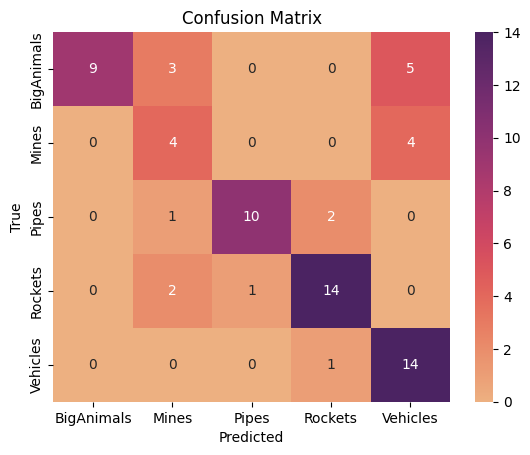

Testing: lr=0.001, batch_size=16, optimizer=rmsprop, weight_decay=0.001, epochs=20
Epoch 1/20, Loss: 2.185955239666833
Epoch 2/20, Loss: 1.7699390716022916
Epoch 3/20, Loss: 1.6314459840456645
Epoch 4/20, Loss: 1.5091704196400113
Epoch 5/20, Loss: 1.4086880882581074
Epoch 6/20, Loss: 1.3695614205466375
Epoch 7/20, Loss: 1.258588410086102
Epoch 8/20, Loss: 1.2657217681407928
Epoch 9/20, Loss: 1.2301278511683147
Epoch 10/20, Loss: 1.053031196196874
Epoch 11/20, Loss: 0.9715801609887017
Epoch 12/20, Loss: 0.8866452624400457
Epoch 13/20, Loss: 0.976802408695221
Epoch 14/20, Loss: 0.9929949310090807
Epoch 15/20, Loss: 0.9617922272947099
Epoch 16/20, Loss: 0.7990108331044515
Epoch 17/20, Loss: 0.8553924030727811
Epoch 18/20, Loss: 0.7576281411780251
Epoch 19/20, Loss: 0.6549744374222226
Epoch 20/20, Loss: 0.549169166220559
Accuracy: 42.86%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.40      1.00      0.58        17
       Mines       1.

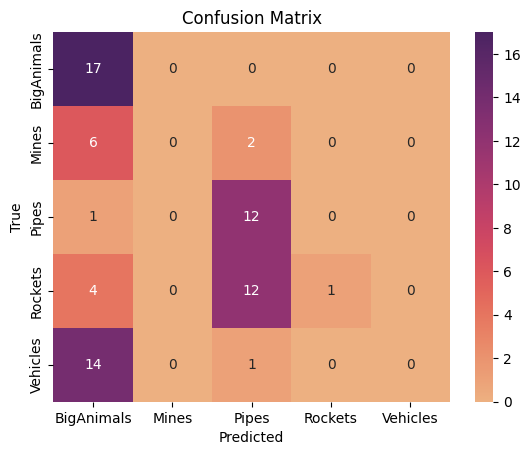

Testing: lr=0.001, batch_size=16, optimizer=rmsprop, weight_decay=0.0001, epochs=10
Epoch 1/10, Loss: 2.1265629397498236
Epoch 2/10, Loss: 1.6092535853385925
Epoch 3/10, Loss: 1.4014947613080342
Epoch 4/10, Loss: 1.310061040851805
Epoch 5/10, Loss: 1.2058530615435705
Epoch 6/10, Loss: 1.1688992314868503
Epoch 7/10, Loss: 1.0462246007389493
Epoch 8/10, Loss: 1.0537441968917847
Epoch 9/10, Loss: 0.9425482385688357
Epoch 10/10, Loss: 0.8547074198722839
Accuracy: 51.43%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.86      0.35      0.50        17
       Mines       0.00      0.00      0.00         8
       Pipes       1.00      0.38      0.56        13
     Rockets       0.57      0.71      0.63        17
    Vehicles       0.41      0.87      0.55        15

    accuracy                           0.51        70
   macro avg       0.57      0.46      0.45        70
weighted avg       0.62      0.51      0.50        70



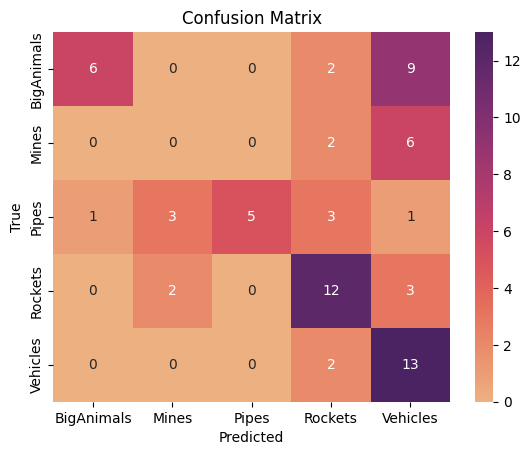

Testing: lr=0.001, batch_size=16, optimizer=rmsprop, weight_decay=0.0001, epochs=15
Epoch 1/15, Loss: 2.323477420541975
Epoch 2/15, Loss: 1.6997671789593167
Epoch 3/15, Loss: 1.5865316722128127
Epoch 4/15, Loss: 1.4458154837290447
Epoch 5/15, Loss: 1.4556072354316711
Epoch 6/15, Loss: 1.3545080456468794
Epoch 7/15, Loss: 1.2116803063286676
Epoch 8/15, Loss: 1.2515899174743228
Epoch 9/15, Loss: 1.267390916744868
Epoch 10/15, Loss: 1.0861456592877705
Epoch 11/15, Loss: 1.051850375201967
Epoch 12/15, Loss: 0.973786109023624
Epoch 13/15, Loss: 0.9154502054055532
Epoch 14/15, Loss: 0.8623712658882141
Epoch 15/15, Loss: 0.8391544537411796
Accuracy: 38.57%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.42      0.47      0.44        17
       Mines       0.22      0.62      0.32         8
       Pipes       1.00      0.00      0.00        13
     Rockets       0.50      0.82      0.62        17
    Vehicles       1.00      0.00      0.00    

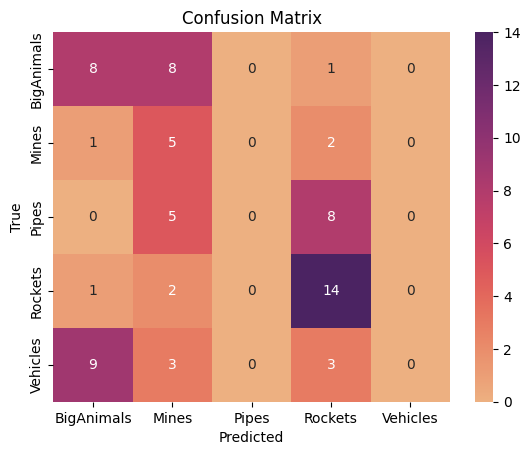

Testing: lr=0.001, batch_size=16, optimizer=rmsprop, weight_decay=0.0001, epochs=20
Epoch 1/20, Loss: 2.1118782228893704
Epoch 2/20, Loss: 1.633660998609331
Epoch 3/20, Loss: 1.5429374443160162
Epoch 4/20, Loss: 1.3988614877065022
Epoch 5/20, Loss: 1.361213703950246
Epoch 6/20, Loss: 1.3014726473225489
Epoch 7/20, Loss: 1.2625655333201091
Epoch 8/20, Loss: 1.1378919316662683
Epoch 9/20, Loss: 1.0330139233006372
Epoch 10/20, Loss: 1.1355359024471707
Epoch 11/20, Loss: 0.9658362004492018
Epoch 12/20, Loss: 1.1087225046422746
Epoch 13/20, Loss: 0.9700221121311188
Epoch 14/20, Loss: 0.8156816909710566
Epoch 15/20, Loss: 0.8921789874633154
Epoch 16/20, Loss: 0.7428955402639177
Epoch 17/20, Loss: 0.6114058444897333
Epoch 18/20, Loss: 0.7331686798069212
Epoch 19/20, Loss: 0.5008071776893404
Epoch 20/20, Loss: 0.5209264771805869
Accuracy: 61.43%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.89      0.47      0.62        17
       Mines     

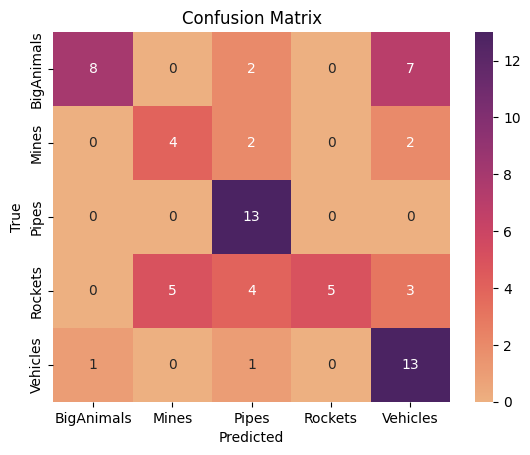

Testing: lr=0.001, batch_size=32, optimizer=adam, weight_decay=0.0, epochs=10
Epoch 1/10, Loss: 1.1758759485350714
Epoch 2/10, Loss: 0.4352725363439984
Epoch 3/10, Loss: 0.2612499346335729
Epoch 4/10, Loss: 0.1671886353029145
Epoch 5/10, Loss: 0.13059000712301996
Epoch 6/10, Loss: 0.09828825605412324
Epoch 7/10, Loss: 0.16472654044628143
Epoch 8/10, Loss: 0.1701121081908544
Epoch 9/10, Loss: 0.169521976262331
Epoch 10/10, Loss: 0.10893058155973752
Accuracy: 90.00%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.94      0.94      0.94        17
       Mines       0.70      0.88      0.78         8
       Pipes       1.00      0.92      0.96        13
     Rockets       0.89      1.00      0.94        17
    Vehicles       0.92      0.73      0.81        15

    accuracy                           0.90        70
   macro avg       0.89      0.89      0.89        70
weighted avg       0.91      0.90      0.90        70



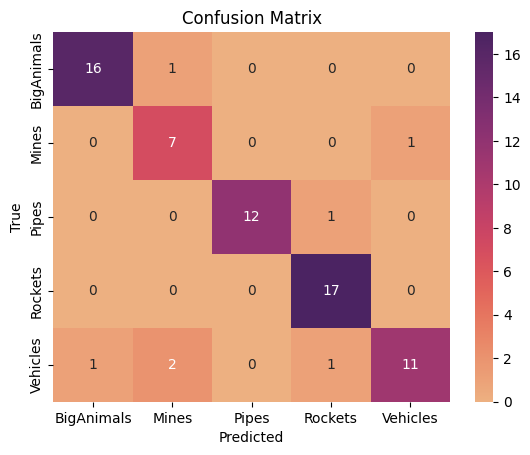

Testing: lr=0.001, batch_size=32, optimizer=adam, weight_decay=0.0, epochs=15
Epoch 1/15, Loss: 1.0879943039682176
Epoch 2/15, Loss: 0.48342803451750016
Epoch 3/15, Loss: 0.2242904214395417
Epoch 4/15, Loss: 0.19314689023627174
Epoch 5/15, Loss: 0.10310166536106004
Epoch 6/15, Loss: 0.09406147876547442
Epoch 7/15, Loss: 0.10122233877579372
Epoch 8/15, Loss: 0.09437007187969154
Epoch 9/15, Loss: 0.10868950767649545
Epoch 10/15, Loss: 0.19844699216385683
Epoch 11/15, Loss: 0.29579392820596695
Epoch 12/15, Loss: 0.18139859454499352
Epoch 13/15, Loss: 0.11281223470966022
Epoch 14/15, Loss: 0.09177078265282843
Epoch 15/15, Loss: 0.07206683026419745
Accuracy: 82.86%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       1.00      0.71      0.83        17
       Mines       0.60      0.75      0.67         8
       Pipes       0.80      0.92      0.86        13
     Rockets       0.93      0.82      0.88        17
    Vehicles       0.78      0.93   

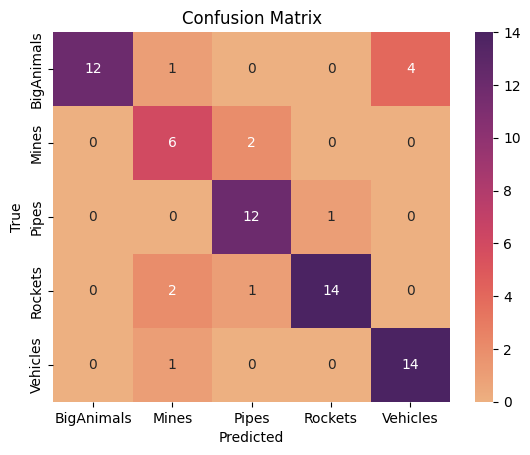

Testing: lr=0.001, batch_size=32, optimizer=adam, weight_decay=0.0, epochs=20
Epoch 1/20, Loss: 1.1661559012201097
Epoch 2/20, Loss: 0.6017298532856835
Epoch 3/20, Loss: 0.404610609014829
Epoch 4/20, Loss: 0.24009862707720864
Epoch 5/20, Loss: 0.22199951112270355
Epoch 6/20, Loss: 0.15986058571272427
Epoch 7/20, Loss: 0.2829207347499
Epoch 8/20, Loss: 0.12890718256433806
Epoch 9/20, Loss: 0.22767961687511867
Epoch 10/20, Loss: 0.08129980539282163
Epoch 11/20, Loss: 0.045308420124153294
Epoch 12/20, Loss: 0.030860775667760108
Epoch 13/20, Loss: 0.017187565927290253
Epoch 14/20, Loss: 0.01130812074471679
Epoch 15/20, Loss: 0.013646258869104914
Epoch 16/20, Loss: 0.01429984506426586
Epoch 17/20, Loss: 0.0048363063639650745
Epoch 18/20, Loss: 0.0036413517082110047
Epoch 19/20, Loss: 0.004520552530367341
Epoch 20/20, Loss: 0.0072213910300181145
Accuracy: 90.00%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.80      0.94      0.86        1

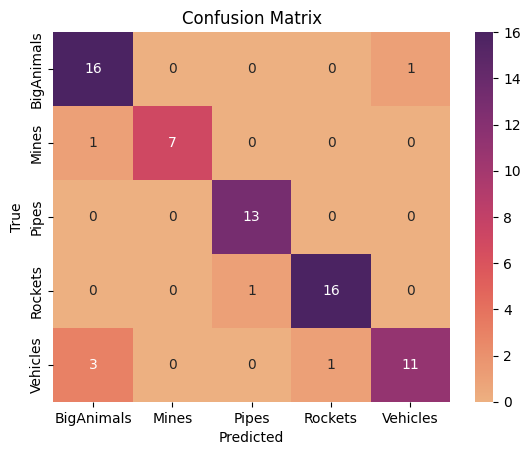

Testing: lr=0.001, batch_size=32, optimizer=adam, weight_decay=0.001, epochs=10
Epoch 1/10, Loss: 1.1060618691974216
Epoch 2/10, Loss: 0.3863571517997318
Epoch 3/10, Loss: 0.27255376759502625
Epoch 4/10, Loss: 0.26004744321107864
Epoch 5/10, Loss: 0.20360093149873945
Epoch 6/10, Loss: 0.18295839884214932
Epoch 7/10, Loss: 0.11134769436385897
Epoch 8/10, Loss: 0.12942501571443346
Epoch 9/10, Loss: 0.14166153222322464
Epoch 10/10, Loss: 0.1112573297901286
Accuracy: 85.71%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.93      0.82      0.88        17
       Mines       0.56      0.62      0.59         8
       Pipes       1.00      0.92      0.96        13
     Rockets       0.94      1.00      0.97        17
    Vehicles       0.75      0.80      0.77        15

    accuracy                           0.86        70
   macro avg       0.84      0.83      0.83        70
weighted avg       0.87      0.86      0.86        70



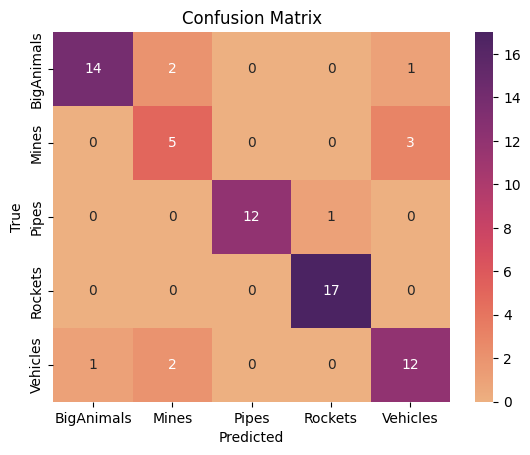

Testing: lr=0.001, batch_size=32, optimizer=adam, weight_decay=0.001, epochs=15
Epoch 1/15, Loss: 1.2137234807014465
Epoch 2/15, Loss: 0.5816631184683906
Epoch 3/15, Loss: 0.3355197177992927
Epoch 4/15, Loss: 0.26074355012840694
Epoch 5/15, Loss: 0.17986325588491228
Epoch 6/15, Loss: 0.11646226007077429
Epoch 7/15, Loss: 0.13829773147073057
Epoch 8/15, Loss: 0.09505119091934627
Epoch 9/15, Loss: 0.1493160997827848
Epoch 10/15, Loss: 0.08004952718814214
Epoch 11/15, Loss: 0.08162435351146592
Epoch 12/15, Loss: 0.06273974074671666
Epoch 13/15, Loss: 0.07032726229064995
Epoch 14/15, Loss: 0.04026843048632145
Epoch 15/15, Loss: 0.015925318313141663
Accuracy: 91.43%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       1.00      0.94      0.97        17
       Mines       0.70      0.88      0.78         8
       Pipes       0.81      1.00      0.90        13
     Rockets       1.00      0.88      0.94        17
    Vehicles       1.00      0.87  

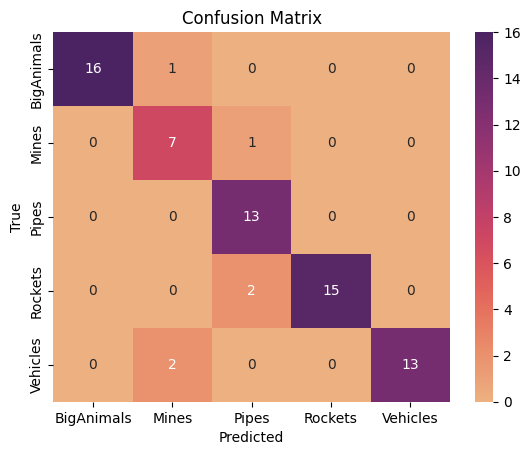

Testing: lr=0.001, batch_size=32, optimizer=adam, weight_decay=0.001, epochs=20
Epoch 1/20, Loss: 1.1120625734329224
Epoch 2/20, Loss: 0.45485424333148533
Epoch 3/20, Loss: 0.23477455311351353
Epoch 4/20, Loss: 0.24158428236842155
Epoch 5/20, Loss: 0.14061823652850258
Epoch 6/20, Loss: 0.11678775317139095
Epoch 7/20, Loss: 0.1586122384501828
Epoch 8/20, Loss: 0.21831475156876776
Epoch 9/20, Loss: 0.1999450061056349
Epoch 10/20, Loss: 0.10120784015291268
Epoch 11/20, Loss: 0.07843375350866053
Epoch 12/20, Loss: 0.05488571317659484
Epoch 13/20, Loss: 0.06694128747201628
Epoch 14/20, Loss: 0.08525109560125405
Epoch 15/20, Loss: 0.1100249472591612
Epoch 16/20, Loss: 0.1275787218991253
Epoch 17/20, Loss: 0.12593007046315405
Epoch 18/20, Loss: 0.14190069917175505
Epoch 19/20, Loss: 0.08197421849601799
Epoch 20/20, Loss: 0.08201806412802802
Accuracy: 85.71%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.81      0.76      0.79        17
    

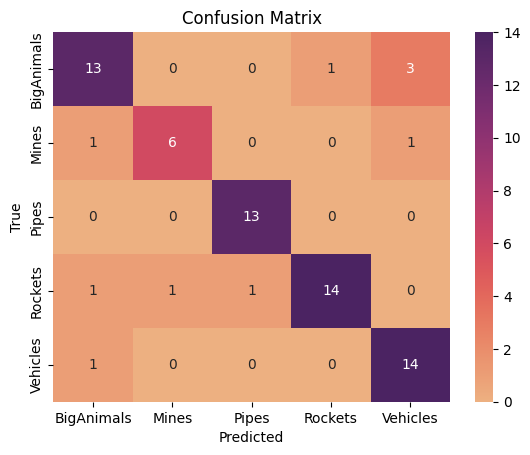

Testing: lr=0.001, batch_size=32, optimizer=adam, weight_decay=0.0001, epochs=10
Epoch 1/10, Loss: 1.192625515990787
Epoch 2/10, Loss: 0.5136654029289881
Epoch 3/10, Loss: 0.3140690757168664
Epoch 4/10, Loss: 0.24801907605595058
Epoch 5/10, Loss: 0.2594433907005522
Epoch 6/10, Loss: 0.1982811979121632
Epoch 7/10, Loss: 0.09472316172387865
Epoch 8/10, Loss: 0.07620825473633078
Epoch 9/10, Loss: 0.03971104220383697
Epoch 10/10, Loss: 0.04693242669519451
Accuracy: 88.57%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       1.00      0.65      0.79        17
       Mines       0.89      1.00      0.94         8
       Pipes       0.92      0.92      0.92        13
     Rockets       0.89      0.94      0.91        17
    Vehicles       0.79      1.00      0.88        15

    accuracy                           0.89        70
   macro avg       0.90      0.90      0.89        70
weighted avg       0.90      0.89      0.88        70



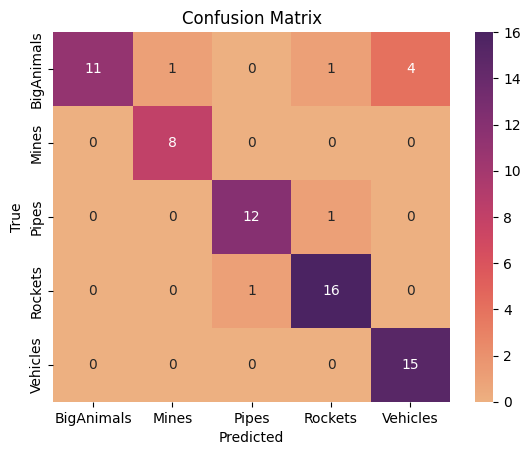

Testing: lr=0.001, batch_size=32, optimizer=adam, weight_decay=0.0001, epochs=15
Epoch 1/15, Loss: 1.2237515846888225
Epoch 2/15, Loss: 0.4929213656319512
Epoch 3/15, Loss: 0.2516373362806108
Epoch 4/15, Loss: 0.2050678473379877
Epoch 5/15, Loss: 0.1820116899907589
Epoch 6/15, Loss: 0.16486136863629022
Epoch 7/15, Loss: 0.18501732415623134
Epoch 8/15, Loss: 0.1506904922425747
Epoch 9/15, Loss: 0.15467591687209076
Epoch 10/15, Loss: 0.12066390179097652
Epoch 11/15, Loss: 0.12670509848329756
Epoch 12/15, Loss: 0.06254061052782668
Epoch 13/15, Loss: 0.061568476259708405
Epoch 14/15, Loss: 0.052487296466198236
Epoch 15/15, Loss: 0.0646170160940124
Accuracy: 92.86%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       1.00      0.82      0.90        17
       Mines       1.00      1.00      1.00         8
       Pipes       0.87      1.00      0.93        13
     Rockets       0.94      0.88      0.91        17
    Vehicles       0.88      1.00   

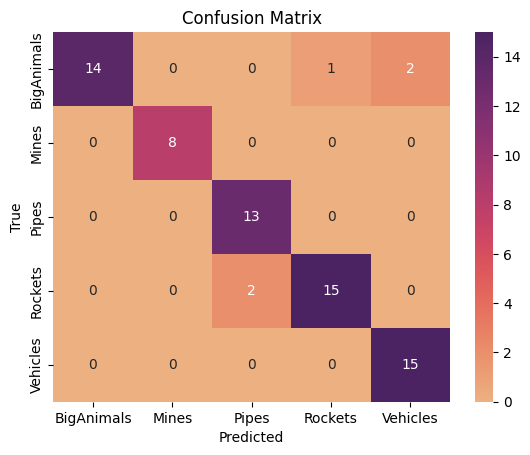

Testing: lr=0.001, batch_size=32, optimizer=adam, weight_decay=0.0001, epochs=20
Epoch 1/20, Loss: 1.1896516018443637
Epoch 2/20, Loss: 0.49328864283031887
Epoch 3/20, Loss: 0.33205409513579476
Epoch 4/20, Loss: 0.18182845248116386
Epoch 5/20, Loss: 0.12181266190277205
Epoch 6/20, Loss: 0.22056056062380472
Epoch 7/20, Loss: 0.31110340108474094
Epoch 8/20, Loss: 0.17368491904603112
Epoch 9/20, Loss: 0.12237418939669926
Epoch 10/20, Loss: 0.0935282599594858
Epoch 11/20, Loss: 0.16763364906526274
Epoch 12/20, Loss: 0.20835051043993896
Epoch 13/20, Loss: 0.1495834564169248
Epoch 14/20, Loss: 0.0635856640421682
Epoch 15/20, Loss: 0.06734881881210539
Epoch 16/20, Loss: 0.06687386064893669
Epoch 17/20, Loss: 0.06736315476397674
Epoch 18/20, Loss: 0.06975557427439424
Epoch 19/20, Loss: 0.046608279252217874
Epoch 20/20, Loss: 0.030636472058378987
Accuracy: 85.71%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.78      0.82      0.80        17


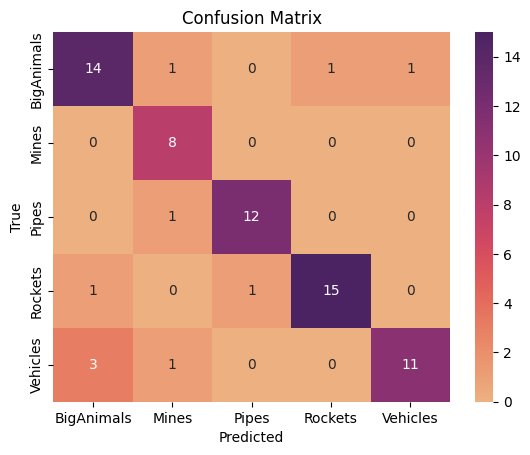

Testing: lr=0.001, batch_size=32, optimizer=sgd, weight_decay=0.0, epochs=10
Epoch 1/10, Loss: 1.6254110866122775
Epoch 2/10, Loss: 1.3651019599702623
Epoch 3/10, Loss: 1.0120820601781209
Epoch 4/10, Loss: 0.7240448461638557
Epoch 5/10, Loss: 0.5003499488035837
Epoch 6/10, Loss: 0.3486613631248474
Epoch 7/10, Loss: 0.22626754972669813
Epoch 8/10, Loss: 0.17226302789317238
Epoch 9/10, Loss: 0.12222979300551945
Epoch 10/10, Loss: 0.08719581034448412
Accuracy: 85.71%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.79      0.88      0.83        17
       Mines       1.00      0.88      0.93         8
       Pipes       0.81      1.00      0.90        13
     Rockets       0.94      0.88      0.91        17
    Vehicles       0.83      0.67      0.74        15

    accuracy                           0.86        70
   macro avg       0.87      0.86      0.86        70
weighted avg       0.86      0.86      0.86        70



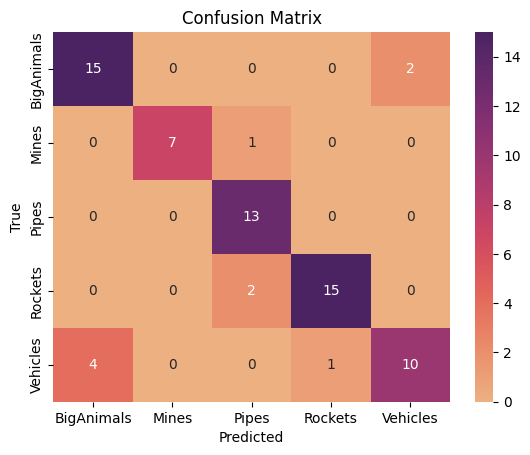

Testing: lr=0.001, batch_size=32, optimizer=sgd, weight_decay=0.0, epochs=15
Epoch 1/15, Loss: 1.6275620725419786
Epoch 2/15, Loss: 1.3442937135696411
Epoch 3/15, Loss: 1.006776577896542
Epoch 4/15, Loss: 0.7021756834454007
Epoch 5/15, Loss: 0.5218702654043833
Epoch 6/15, Loss: 0.33465683460235596
Epoch 7/15, Loss: 0.20900919371181065
Epoch 8/15, Loss: 0.1591967518130938
Epoch 9/15, Loss: 0.11569788720872667
Epoch 10/15, Loss: 0.08326036069128248
Epoch 11/15, Loss: 0.07534417923953798
Epoch 12/15, Loss: 0.056485097441408366
Epoch 13/15, Loss: 0.04105733335018158
Epoch 14/15, Loss: 0.044407337283094726
Epoch 15/15, Loss: 0.03828782464067141
Accuracy: 87.14%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.81      0.76      0.79        17
       Mines       0.80      1.00      0.89         8
       Pipes       0.93      1.00      0.96        13
     Rockets       0.94      0.88      0.91        17
    Vehicles       0.86      0.80      0

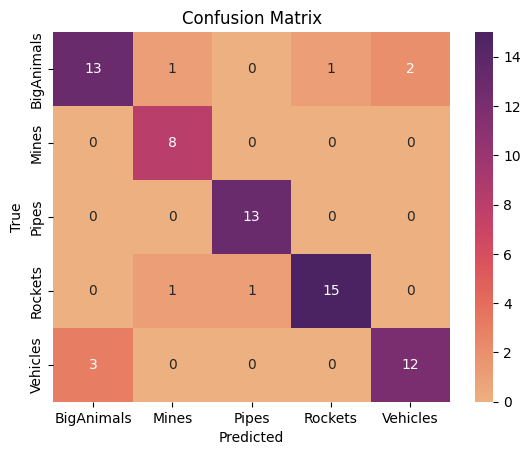

Testing: lr=0.001, batch_size=32, optimizer=sgd, weight_decay=0.0, epochs=20
Epoch 1/20, Loss: 1.5980910592608981
Epoch 2/20, Loss: 1.3320130109786987
Epoch 3/20, Loss: 0.999309606022305
Epoch 4/20, Loss: 0.766469869348738
Epoch 5/20, Loss: 0.5638521346780989
Epoch 6/20, Loss: 0.3511078556378682
Epoch 7/20, Loss: 0.23484060333834755
Epoch 8/20, Loss: 0.14591039303276274
Epoch 9/20, Loss: 0.12710057530138227
Epoch 10/20, Loss: 0.08510794366399448
Epoch 11/20, Loss: 0.06826259940862656
Epoch 12/20, Loss: 0.06076964073710971
Epoch 13/20, Loss: 0.04074774765306049
Epoch 14/20, Loss: 0.03765369889636835
Epoch 15/20, Loss: 0.03437362000760105
Epoch 16/20, Loss: 0.03301119328373008
Epoch 17/20, Loss: 0.028107708423501916
Epoch 18/20, Loss: 0.02635366055700514
Epoch 19/20, Loss: 0.02616851269784901
Epoch 20/20, Loss: 0.023360629772974387
Accuracy: 91.43%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.83      0.88      0.86        17
       M

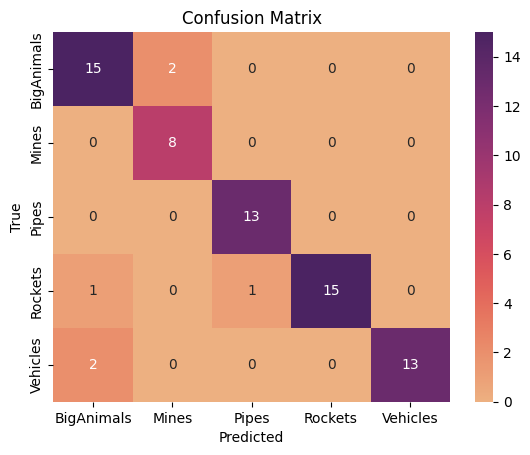

Testing: lr=0.001, batch_size=32, optimizer=sgd, weight_decay=0.001, epochs=10
Epoch 1/10, Loss: 1.6192146274778578
Epoch 2/10, Loss: 1.3579239315456815
Epoch 3/10, Loss: 1.0449523197280035
Epoch 4/10, Loss: 0.7732682360543145
Epoch 5/10, Loss: 0.5247285399172041
Epoch 6/10, Loss: 0.3704529040389591
Epoch 7/10, Loss: 0.24681294295522901
Epoch 8/10, Loss: 0.16945785615179274
Epoch 9/10, Loss: 0.11815248678127925
Epoch 10/10, Loss: 0.10479463471306695
Accuracy: 91.43%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.84      0.94      0.89        17
       Mines       0.88      0.88      0.88         8
       Pipes       0.93      1.00      0.96        13
     Rockets       1.00      0.94      0.97        17
    Vehicles       0.92      0.80      0.86        15

    accuracy                           0.91        70
   macro avg       0.91      0.91      0.91        70
weighted avg       0.92      0.91      0.91        70



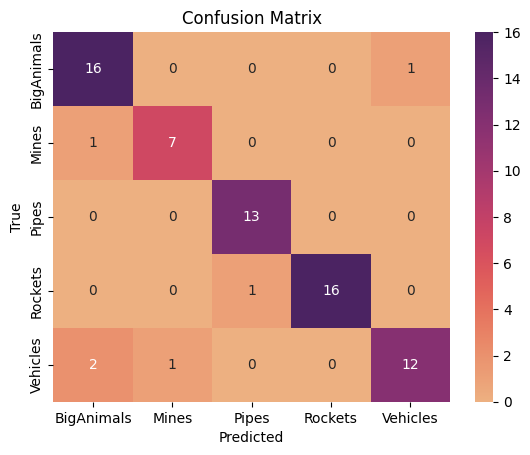

Testing: lr=0.001, batch_size=32, optimizer=sgd, weight_decay=0.001, epochs=15
Epoch 1/15, Loss: 1.6092428498797946
Epoch 2/15, Loss: 1.3750906123055353
Epoch 3/15, Loss: 1.0746439231766596
Epoch 4/15, Loss: 0.808278501033783
Epoch 5/15, Loss: 0.5625196331077151
Epoch 6/15, Loss: 0.3963082598315345
Epoch 7/15, Loss: 0.2723733319176568
Epoch 8/15, Loss: 0.20122614006201425
Epoch 9/15, Loss: 0.12569658872154024
Epoch 10/15, Loss: 0.09553094208240509
Epoch 11/15, Loss: 0.08511406224634913
Epoch 12/15, Loss: 0.05791828284660975
Epoch 13/15, Loss: 0.05924497379197015
Epoch 14/15, Loss: 0.04447698944972621
Epoch 15/15, Loss: 0.03613678510818216
Accuracy: 88.57%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.80      0.94      0.86        17
       Mines       0.88      0.88      0.88         8
       Pipes       0.87      1.00      0.93        13
     Rockets       0.94      0.88      0.91        17
    Vehicles       1.00      0.73      0.

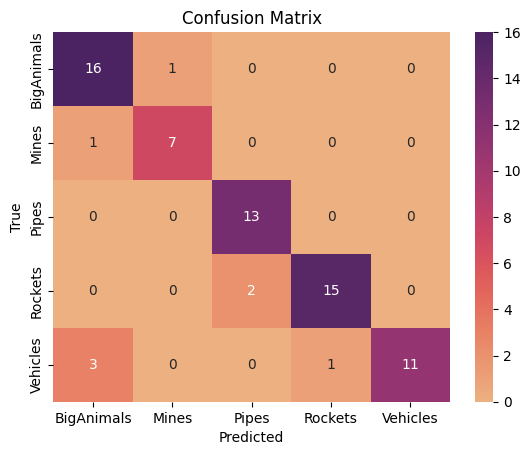

Testing: lr=0.001, batch_size=32, optimizer=sgd, weight_decay=0.001, epochs=20
Epoch 1/20, Loss: 1.5945027669270833
Epoch 2/20, Loss: 1.295804050233629
Epoch 3/20, Loss: 1.0120412508646648
Epoch 4/20, Loss: 0.735128747092353
Epoch 5/20, Loss: 0.5501111712720659
Epoch 6/20, Loss: 0.3835052053133647
Epoch 7/20, Loss: 0.26606571508778465
Epoch 8/20, Loss: 0.17688595089647505
Epoch 9/20, Loss: 0.13391542020771238
Epoch 10/20, Loss: 0.1051372778084543
Epoch 11/20, Loss: 0.08325189434819752
Epoch 12/20, Loss: 0.06418575346469879
Epoch 13/20, Loss: 0.051946595725086
Epoch 14/20, Loss: 0.04552237792975373
Epoch 15/20, Loss: 0.037815344209472336
Epoch 16/20, Loss: 0.04502465782894029
Epoch 17/20, Loss: 0.03343602538936668
Epoch 18/20, Loss: 0.029652436160378985
Epoch 19/20, Loss: 0.02347744752963384
Epoch 20/20, Loss: 0.026891759700245328
Accuracy: 87.14%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.83      0.88      0.86        17
       M

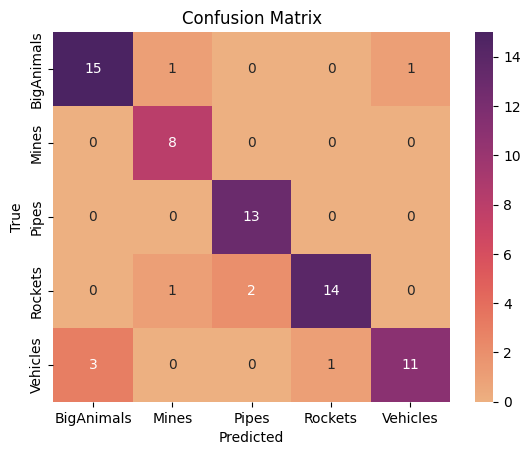

Testing: lr=0.001, batch_size=32, optimizer=sgd, weight_decay=0.0001, epochs=10
Epoch 1/10, Loss: 1.6394081380632188
Epoch 2/10, Loss: 1.3803762594858806
Epoch 3/10, Loss: 1.0422081616189744
Epoch 4/10, Loss: 0.7673158645629883
Epoch 5/10, Loss: 0.5117903451124827
Epoch 6/10, Loss: 0.35293585393163895
Epoch 7/10, Loss: 0.22826480865478516
Epoch 8/10, Loss: 0.15436778051985633
Epoch 9/10, Loss: 0.11011030442184871
Epoch 10/10, Loss: 0.08628430962562561
Accuracy: 90.00%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.94      0.94      0.94        17
       Mines       0.73      1.00      0.84         8
       Pipes       0.93      1.00      0.96        13
     Rockets       1.00      0.82      0.90        17
    Vehicles       0.86      0.80      0.83        15

    accuracy                           0.90        70
   macro avg       0.89      0.91      0.90        70
weighted avg       0.91      0.90      0.90        70



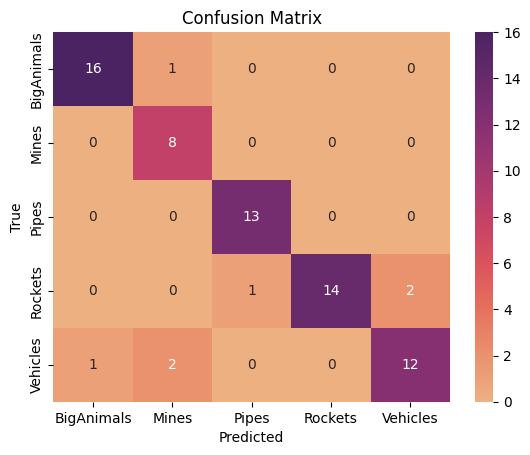

Testing: lr=0.001, batch_size=32, optimizer=sgd, weight_decay=0.0001, epochs=15
Epoch 1/15, Loss: 1.5819151401519775
Epoch 2/15, Loss: 1.3240340683195326
Epoch 3/15, Loss: 0.9863223168585036
Epoch 4/15, Loss: 0.6683488455083635
Epoch 5/15, Loss: 0.47124480538898045
Epoch 6/15, Loss: 0.32900406585799324
Epoch 7/15, Loss: 0.22457644840081534
Epoch 8/15, Loss: 0.16839470548762214
Epoch 9/15, Loss: 0.10683472123410967
Epoch 10/15, Loss: 0.08175541626082526
Epoch 11/15, Loss: 0.06773747917678621
Epoch 12/15, Loss: 0.054732298478484154
Epoch 13/15, Loss: 0.037727689991394676
Epoch 14/15, Loss: 0.03390774606830544
Epoch 15/15, Loss: 0.03290764883988433
Accuracy: 91.43%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.94      0.88      0.91        17
       Mines       0.89      1.00      0.94         8
       Pipes       0.87      1.00      0.93        13
     Rockets       1.00      0.88      0.94        17
    Vehicles       0.87      0.87 

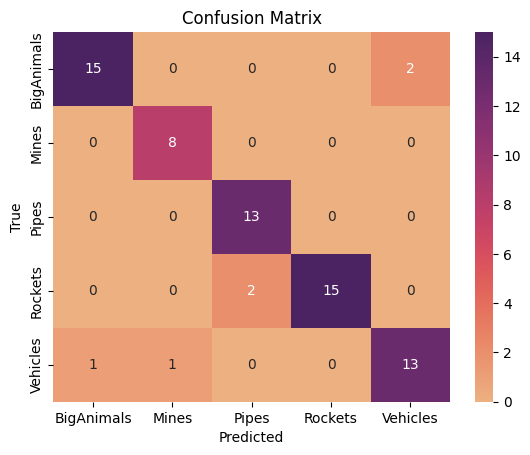

Testing: lr=0.001, batch_size=32, optimizer=sgd, weight_decay=0.0001, epochs=20
Epoch 1/20, Loss: 1.6462150414784749
Epoch 2/20, Loss: 1.369832158088684
Epoch 3/20, Loss: 1.0604811443222895
Epoch 4/20, Loss: 0.8067752983835008
Epoch 5/20, Loss: 0.5410328441196017
Epoch 6/20, Loss: 0.35007431772020126
Epoch 7/20, Loss: 0.24342423346307543
Epoch 8/20, Loss: 0.1904934263891644
Epoch 9/20, Loss: 0.13421347902880776
Epoch 10/20, Loss: 0.1106651880674892
Epoch 11/20, Loss: 0.07444532505340046
Epoch 12/20, Loss: 0.05490101542737749
Epoch 13/20, Loss: 0.04797258021103011
Epoch 14/20, Loss: 0.04038316301173634
Epoch 15/20, Loss: 0.039306621377666794
Epoch 16/20, Loss: 0.038519789568252034
Epoch 17/20, Loss: 0.03431247112651666
Epoch 18/20, Loss: 0.02612424621151553
Epoch 19/20, Loss: 0.024973724140889116
Epoch 20/20, Loss: 0.023585070959395833
Accuracy: 91.43%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.83      0.88      0.86        17
   

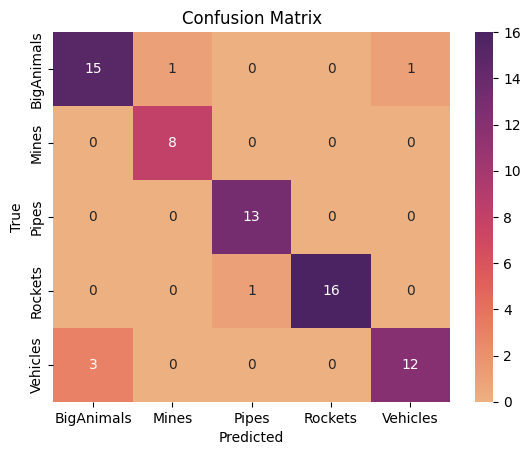

Testing: lr=0.001, batch_size=32, optimizer=rmsprop, weight_decay=0.0, epochs=10
Epoch 1/10, Loss: 2.2030325333277383
Epoch 2/10, Loss: 1.7795296642515395
Epoch 3/10, Loss: 1.530591991212633
Epoch 4/10, Loss: 1.5506123039457533
Epoch 5/10, Loss: 1.4410360389285617
Epoch 6/10, Loss: 1.389642635981242
Epoch 7/10, Loss: 1.2312128477626376
Epoch 8/10, Loss: 1.1358139779832628
Epoch 9/10, Loss: 1.402823309103648
Epoch 10/10, Loss: 1.2112449208895366
Accuracy: 57.14%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.50      0.65      0.56        17
       Mines       0.14      0.12      0.13         8
       Pipes       1.00      0.46      0.63        13
     Rockets       0.69      0.65      0.67        17
    Vehicles       0.58      0.73      0.65        15

    accuracy                           0.57        70
   macro avg       0.58      0.52      0.53        70
weighted avg       0.61      0.57      0.57        70



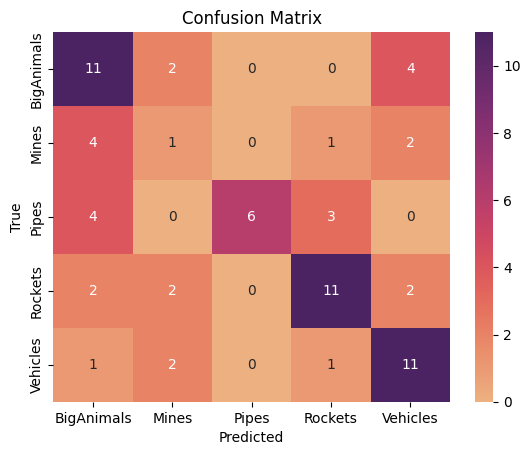

Testing: lr=0.001, batch_size=32, optimizer=rmsprop, weight_decay=0.0, epochs=15
Epoch 1/15, Loss: 2.1987789074579873
Epoch 2/15, Loss: 1.6559321880340576
Epoch 3/15, Loss: 1.33689108159807
Epoch 4/15, Loss: 1.4379269414477878
Epoch 5/15, Loss: 1.2588986621962652
Epoch 6/15, Loss: 1.2741702397664387
Epoch 7/15, Loss: 1.2007742193010118
Epoch 8/15, Loss: 1.0047924518585205
Epoch 9/15, Loss: 0.9935753345489502
Epoch 10/15, Loss: 1.003775907887353
Epoch 11/15, Loss: 0.9683739344278971
Epoch 12/15, Loss: 0.8588404787911309
Epoch 13/15, Loss: 0.8012033700942993
Epoch 14/15, Loss: 0.7145120832655165
Epoch 15/15, Loss: 0.8043170836236742
Accuracy: 62.86%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.60      0.71      0.65        17
       Mines       0.40      0.50      0.44         8
       Pipes       1.00      0.85      0.92        13
     Rockets       0.54      0.82      0.65        17
    Vehicles       1.00      0.20      0.33      

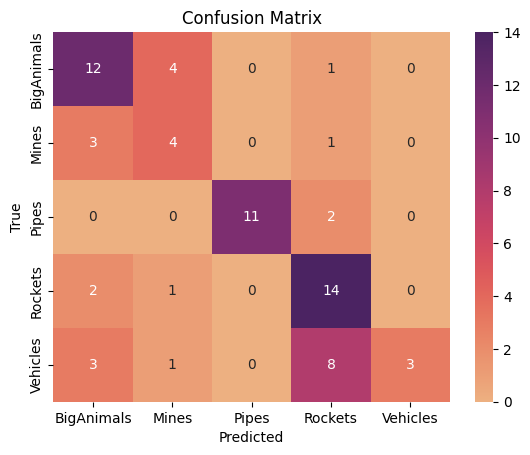

Testing: lr=0.001, batch_size=32, optimizer=rmsprop, weight_decay=0.0, epochs=20
Epoch 1/20, Loss: 2.254765192667643
Epoch 2/20, Loss: 1.5271854268179998
Epoch 3/20, Loss: 1.4718589385350545
Epoch 4/20, Loss: 1.2323016855451796
Epoch 5/20, Loss: 1.130699508719974
Epoch 6/20, Loss: 1.284947587384118
Epoch 7/20, Loss: 1.0666736165682476
Epoch 8/20, Loss: 1.018929613961114
Epoch 9/20, Loss: 0.9127953781021966
Epoch 10/20, Loss: 0.8709699643982781
Epoch 11/20, Loss: 0.7312251925468445
Epoch 12/20, Loss: 0.7665576206313239
Epoch 13/20, Loss: 0.7946933077441322
Epoch 14/20, Loss: 0.7002298964394463
Epoch 15/20, Loss: 0.7165956166055467
Epoch 16/20, Loss: 0.6171042852931552
Epoch 17/20, Loss: 0.5587504059076309
Epoch 18/20, Loss: 0.5483711361885071
Epoch 19/20, Loss: 0.547562473350101
Epoch 20/20, Loss: 0.46436641116937
Accuracy: 58.57%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.64      0.94      0.76        17
       Mines       0.21  

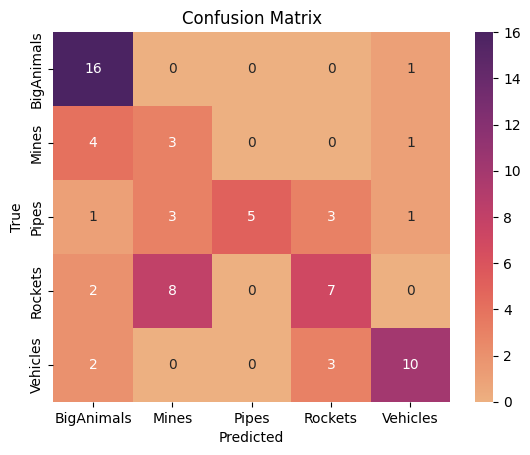

Testing: lr=0.001, batch_size=32, optimizer=rmsprop, weight_decay=0.001, epochs=10
Epoch 1/10, Loss: 2.318927447001139
Epoch 2/10, Loss: 1.484457532564799
Epoch 3/10, Loss: 1.3851494126849704
Epoch 4/10, Loss: 1.2916490899191961
Epoch 5/10, Loss: 1.2464692791302998
Epoch 6/10, Loss: 1.150041076872084
Epoch 7/10, Loss: 1.1475699610180325
Epoch 8/10, Loss: 1.075441579023997
Epoch 9/10, Loss: 1.0534057484732733
Epoch 10/10, Loss: 1.0018384125497606
Accuracy: 47.14%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       1.00      0.18      0.30        17
       Mines       0.09      0.12      0.11         8
       Pipes       1.00      0.38      0.56        13
     Rockets       0.56      0.59      0.57        17
    Vehicles       0.42      0.93      0.58        15

    accuracy                           0.47        70
   macro avg       0.61      0.44      0.42        70
weighted avg       0.66      0.47      0.45        70



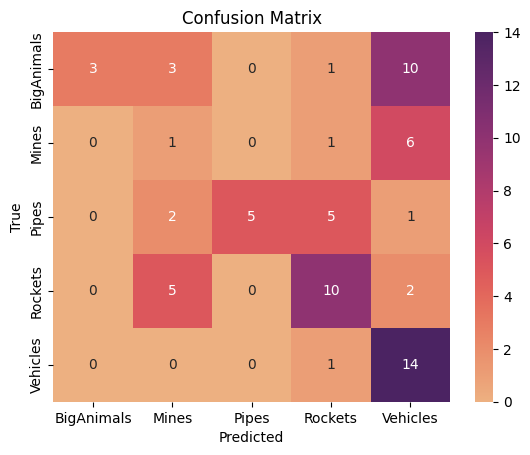

Testing: lr=0.001, batch_size=32, optimizer=rmsprop, weight_decay=0.001, epochs=15
Epoch 1/15, Loss: 2.364185028605991
Epoch 2/15, Loss: 1.7420454952451918
Epoch 3/15, Loss: 1.5314571724997625
Epoch 4/15, Loss: 1.380077256096734
Epoch 5/15, Loss: 1.3018618954552545
Epoch 6/15, Loss: 1.2912437915802002
Epoch 7/15, Loss: 1.2406754228803847
Epoch 8/15, Loss: 1.2271623214085896
Epoch 9/15, Loss: 1.3205629057354398
Epoch 10/15, Loss: 1.2299570242563884
Epoch 11/15, Loss: 1.0141198701328702
Epoch 12/15, Loss: 0.9623933831850687
Epoch 13/15, Loss: 1.0228774348894756
Epoch 14/15, Loss: 0.8733546998765733
Epoch 15/15, Loss: 0.7596716748343574
Accuracy: 40.00%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.31      1.00      0.48        17
       Mines       0.00      0.00      0.00         8
       Pipes       0.75      0.69      0.72        13
     Rockets       1.00      0.12      0.21        17
    Vehicles       1.00      0.00      0.00   

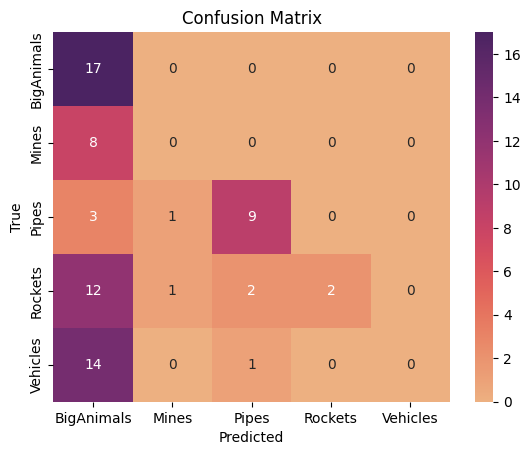

Testing: lr=0.001, batch_size=32, optimizer=rmsprop, weight_decay=0.001, epochs=20
Epoch 1/20, Loss: 2.208014448483785
Epoch 2/20, Loss: 1.5876381132337782
Epoch 3/20, Loss: 1.3835646841261122
Epoch 4/20, Loss: 1.2225441932678223
Epoch 5/20, Loss: 1.2109817001554701
Epoch 6/20, Loss: 1.0898005896144443
Epoch 7/20, Loss: 1.1361713475651212
Epoch 8/20, Loss: 0.9832522670427958
Epoch 9/20, Loss: 1.0294558670785692
Epoch 10/20, Loss: 0.8922604454888238
Epoch 11/20, Loss: 0.7690893676545885
Epoch 12/20, Loss: 0.8310336702399783
Epoch 13/20, Loss: 0.6413954363928901
Epoch 14/20, Loss: 0.8238325052791171
Epoch 15/20, Loss: 0.6250895228650835
Epoch 16/20, Loss: 0.6771863500277201
Epoch 17/20, Loss: 0.5215060744020674
Epoch 18/20, Loss: 0.5092463261551328
Epoch 19/20, Loss: 0.4618399441242218
Epoch 20/20, Loss: 0.5358428127235837
Accuracy: 68.57%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.65      0.65      0.65        17
       Mines     

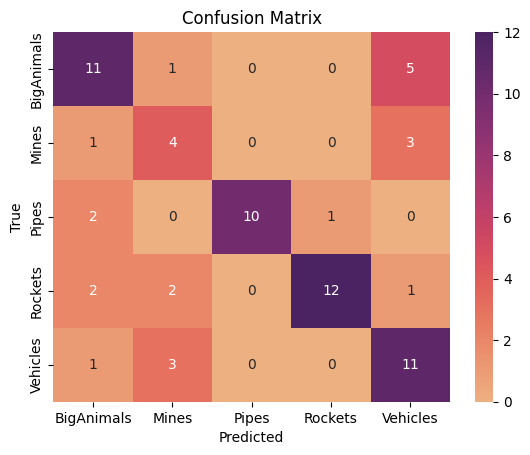

Testing: lr=0.001, batch_size=32, optimizer=rmsprop, weight_decay=0.0001, epochs=10
Epoch 1/10, Loss: 2.4820670419269137
Epoch 2/10, Loss: 1.6199288500679865
Epoch 3/10, Loss: 1.5850231912400987
Epoch 4/10, Loss: 1.4473937617407904
Epoch 5/10, Loss: 1.3132838673061795
Epoch 6/10, Loss: 1.2289139827092488
Epoch 7/10, Loss: 1.1196962065166898
Epoch 8/10, Loss: 1.0713299181726244
Epoch 9/10, Loss: 1.009936683707767
Epoch 10/10, Loss: 0.7641922997103797
Accuracy: 60.00%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.83      0.59      0.69        17
       Mines       0.22      0.50      0.31         8
       Pipes       0.69      0.69      0.69        13
     Rockets       0.77      0.59      0.67        17
    Vehicles       0.64      0.60      0.62        15

    accuracy                           0.60        70
   macro avg       0.63      0.59      0.60        70
weighted avg       0.68      0.60      0.63        70



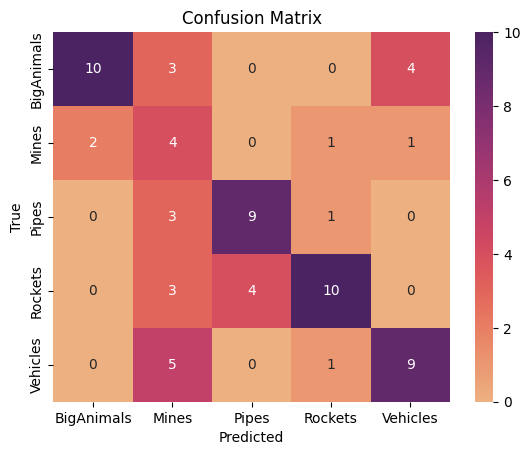

Testing: lr=0.001, batch_size=32, optimizer=rmsprop, weight_decay=0.0001, epochs=15
Epoch 1/15, Loss: 2.5486955775154962
Epoch 2/15, Loss: 1.57492376698388
Epoch 3/15, Loss: 1.3622601694530911
Epoch 4/15, Loss: 1.3104653358459473
Epoch 5/15, Loss: 1.241303887632158
Epoch 6/15, Loss: 1.2960038251347012
Epoch 7/15, Loss: 1.10185127125846
Epoch 8/15, Loss: 0.9178691837522719
Epoch 9/15, Loss: 0.8733259903060065
Epoch 10/15, Loss: 0.8359351423051622
Epoch 11/15, Loss: 0.9126714997821384
Epoch 12/15, Loss: 0.8953776756922404
Epoch 13/15, Loss: 0.7316099206606547
Epoch 14/15, Loss: 0.7173972460958693
Epoch 15/15, Loss: 0.594288600815667
Accuracy: 64.29%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.82      0.53      0.64        17
       Mines       0.43      0.38      0.40         8
       Pipes       1.00      0.31      0.47        13
     Rockets       0.55      0.94      0.70        17
    Vehicles       0.68      0.87      0.76      

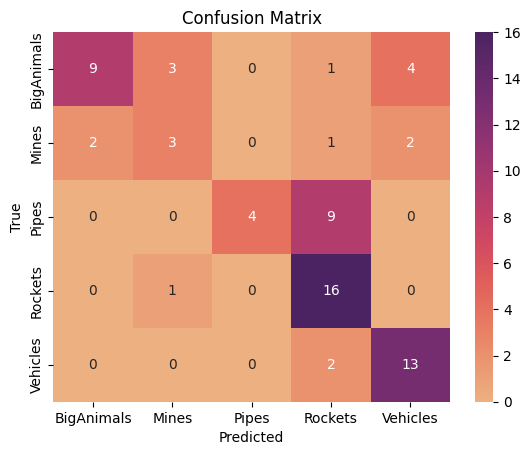

Testing: lr=0.001, batch_size=32, optimizer=rmsprop, weight_decay=0.0001, epochs=20
Epoch 1/20, Loss: 2.5238303343454995
Epoch 2/20, Loss: 1.6480327049891155
Epoch 3/20, Loss: 1.594399438963996
Epoch 4/20, Loss: 1.507634547021654
Epoch 5/20, Loss: 1.439473311106364
Epoch 6/20, Loss: 1.4197523726357355
Epoch 7/20, Loss: 1.2873457537757025
Epoch 8/20, Loss: 1.278579870859782
Epoch 9/20, Loss: 1.2855810059441461
Epoch 10/20, Loss: 1.031214541859097
Epoch 11/20, Loss: 1.0529898868666754
Epoch 12/20, Loss: 0.9952227407031589
Epoch 13/20, Loss: 0.9926686816745334
Epoch 14/20, Loss: 0.7454556889004178
Epoch 15/20, Loss: 0.8177007370524936
Epoch 16/20, Loss: 0.6705203188790215
Epoch 17/20, Loss: 0.6930339866214328
Epoch 18/20, Loss: 0.665933758020401
Epoch 19/20, Loss: 0.5236472487449646
Epoch 20/20, Loss: 0.47604195608033073
Accuracy: 70.00%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.89      0.47      0.62        17
       Mines       0

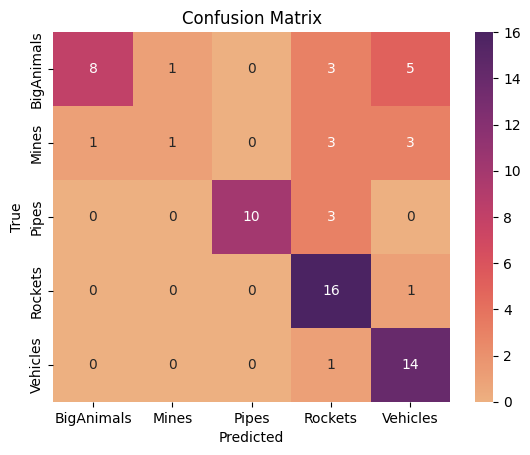

Testing: lr=0.0001, batch_size=16, optimizer=adam, weight_decay=0.0, epochs=10
Epoch 1/10, Loss: 1.3648242553075154
Epoch 2/10, Loss: 0.6259285691711638
Epoch 3/10, Loss: 0.3152889716956351
Epoch 4/10, Loss: 0.1785678875943025
Epoch 5/10, Loss: 0.1130762327876356
Epoch 6/10, Loss: 0.0641844513722592
Epoch 7/10, Loss: 0.04134736292892032
Epoch 8/10, Loss: 0.06242498543320431
Epoch 9/10, Loss: 0.03244564816769627
Epoch 10/10, Loss: 0.02808075211942196
Accuracy: 90.00%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.93      0.82      0.88        17
       Mines       0.80      1.00      0.89         8
       Pipes       0.93      1.00      0.96        13
     Rockets       0.94      0.94      0.94        17
    Vehicles       0.86      0.80      0.83        15

    accuracy                           0.90        70
   macro avg       0.89      0.91      0.90        70
weighted avg       0.90      0.90      0.90        70



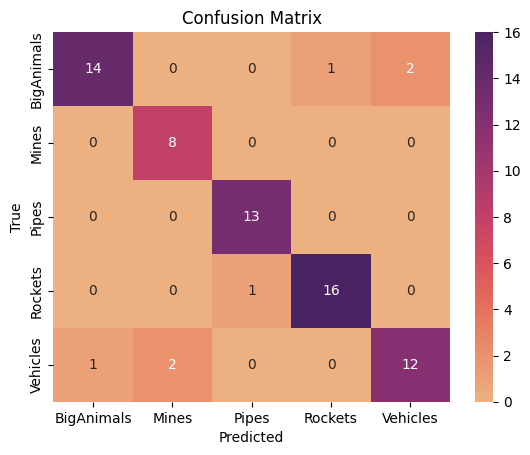

Testing: lr=0.0001, batch_size=16, optimizer=adam, weight_decay=0.0, epochs=15
Epoch 1/15, Loss: 1.4110370477040608
Epoch 2/15, Loss: 0.7425538053115209
Epoch 3/15, Loss: 0.34906413820054794
Epoch 4/15, Loss: 0.19524505734443665
Epoch 5/15, Loss: 0.13245180249214172
Epoch 6/15, Loss: 0.056063425520228014
Epoch 7/15, Loss: 0.0450384465770589
Epoch 8/15, Loss: 0.0439503135987454
Epoch 9/15, Loss: 0.045024030945367284
Epoch 10/15, Loss: 0.07515590539616016
Epoch 11/15, Loss: 0.0520877271062798
Epoch 12/15, Loss: 0.029057473823842075
Epoch 13/15, Loss: 0.03505778172984719
Epoch 14/15, Loss: 0.03479509989524053
Epoch 15/15, Loss: 0.020626052127530176
Accuracy: 95.71%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       1.00      0.94      0.97        17
       Mines       0.89      1.00      0.94         8
       Pipes       0.93      1.00      0.96        13
     Rockets       1.00      0.94      0.97        17
    Vehicles       0.93      0.93 

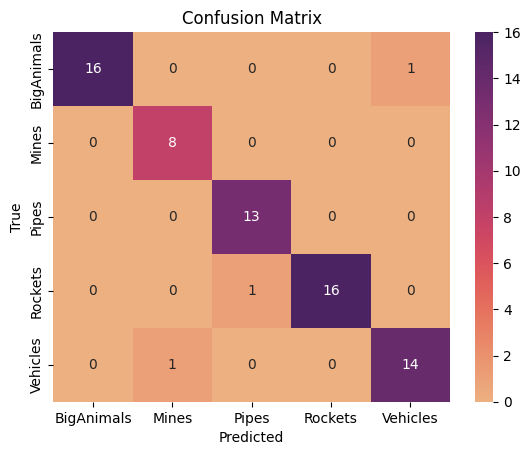

Testing: lr=0.0001, batch_size=16, optimizer=adam, weight_decay=0.0, epochs=20
Epoch 1/20, Loss: 1.3821775648328993
Epoch 2/20, Loss: 0.6807840913534164
Epoch 3/20, Loss: 0.38659361170397866
Epoch 4/20, Loss: 0.19738847265640894
Epoch 5/20, Loss: 0.11259344137377209
Epoch 6/20, Loss: 0.08786401090522607
Epoch 7/20, Loss: 0.07229410453389089
Epoch 8/20, Loss: 0.08098811149183247
Epoch 9/20, Loss: 0.0579866057054864
Epoch 10/20, Loss: 0.040252011372811265
Epoch 11/20, Loss: 0.03788358454282085
Epoch 12/20, Loss: 0.02717873673989541
Epoch 13/20, Loss: 0.02366728014830086
Epoch 14/20, Loss: 0.020548875366027158
Epoch 15/20, Loss: 0.0428359487042245
Epoch 16/20, Loss: 0.026790475990209315
Epoch 17/20, Loss: 0.01655334987056752
Epoch 18/20, Loss: 0.015233611998458704
Epoch 19/20, Loss: 0.01704136680604683
Epoch 20/20, Loss: 0.02776607874936114
Accuracy: 90.00%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.94      0.94      0.94        17


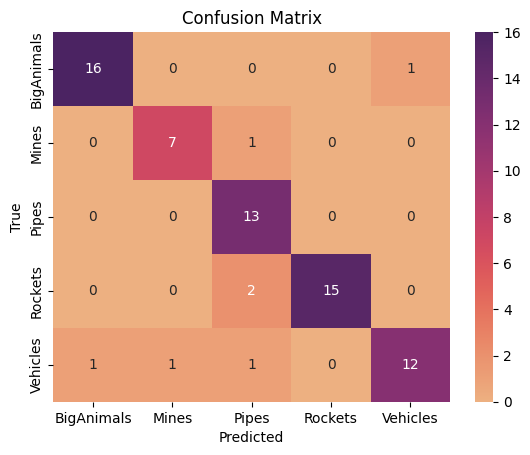

Testing: lr=0.0001, batch_size=16, optimizer=adam, weight_decay=0.001, epochs=10
Epoch 1/10, Loss: 1.3896626399623022
Epoch 2/10, Loss: 0.6789033561944962
Epoch 3/10, Loss: 0.382622081372473
Epoch 4/10, Loss: 0.19230765311254394
Epoch 5/10, Loss: 0.08504055999219418
Epoch 6/10, Loss: 0.07748301492797004
Epoch 7/10, Loss: 0.06566068054073387
Epoch 8/10, Loss: 0.04138612405707439
Epoch 9/10, Loss: 0.046180389252387814
Epoch 10/10, Loss: 0.03442370306907429
Accuracy: 90.00%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.81      1.00      0.89        17
       Mines       1.00      0.75      0.86         8
       Pipes       0.93      1.00      0.96        13
     Rockets       0.94      0.94      0.94        17
    Vehicles       0.92      0.73      0.81        15

    accuracy                           0.90        70
   macro avg       0.92      0.88      0.89        70
weighted avg       0.91      0.90      0.90        70



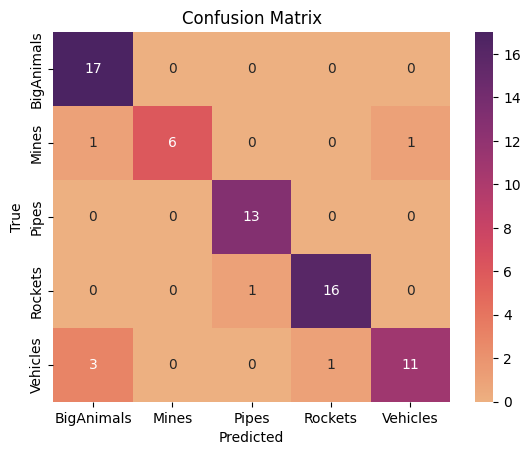

Testing: lr=0.0001, batch_size=16, optimizer=adam, weight_decay=0.001, epochs=15
Epoch 1/15, Loss: 1.3658111360337999
Epoch 2/15, Loss: 0.6554485476679273
Epoch 3/15, Loss: 0.31775640696287155
Epoch 4/15, Loss: 0.1590004480547375
Epoch 5/15, Loss: 0.07154986924595302
Epoch 6/15, Loss: 0.061383416772716574
Epoch 7/15, Loss: 0.05629025979174508
Epoch 8/15, Loss: 0.039504559296700686
Epoch 9/15, Loss: 0.02529862088461717
Epoch 10/15, Loss: 0.01883165931536092
Epoch 11/15, Loss: 0.021398407821026113
Epoch 12/15, Loss: 0.013778125893117653
Epoch 13/15, Loss: 0.016925182892009616
Epoch 14/15, Loss: 0.01715413928549323
Epoch 15/15, Loss: 0.020669113016790815
Accuracy: 92.86%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       1.00      0.94      0.97        17
       Mines       1.00      0.75      0.86         8
       Pipes       0.93      1.00      0.96        13
     Rockets       1.00      0.88      0.94        17
    Vehicles       0.79     

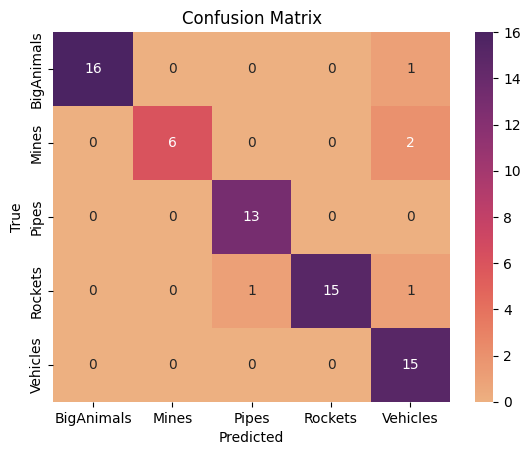

Testing: lr=0.0001, batch_size=16, optimizer=adam, weight_decay=0.001, epochs=20
Epoch 1/20, Loss: 1.4216649068726435
Epoch 2/20, Loss: 0.7046448157893287
Epoch 3/20, Loss: 0.3448224928643968
Epoch 4/20, Loss: 0.17631255628334153
Epoch 5/20, Loss: 0.10437074738244216
Epoch 6/20, Loss: 0.09636893889142407
Epoch 7/20, Loss: 0.046415290588306055
Epoch 8/20, Loss: 0.032853266689926386
Epoch 9/20, Loss: 0.03201186843216419
Epoch 10/20, Loss: 0.03426130566125115
Epoch 11/20, Loss: 0.039483755438899
Epoch 12/20, Loss: 0.06504379337032636
Epoch 13/20, Loss: 0.08419928849778241
Epoch 14/20, Loss: 0.05388492516552409
Epoch 15/20, Loss: 0.07825163306875361
Epoch 16/20, Loss: 0.04543924373057154
Epoch 17/20, Loss: 0.06923938139031331
Epoch 18/20, Loss: 0.03150831882117523
Epoch 19/20, Loss: 0.027757651250188548
Epoch 20/20, Loss: 0.04956607215313448
Accuracy: 95.71%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       1.00      0.88      0.94        17


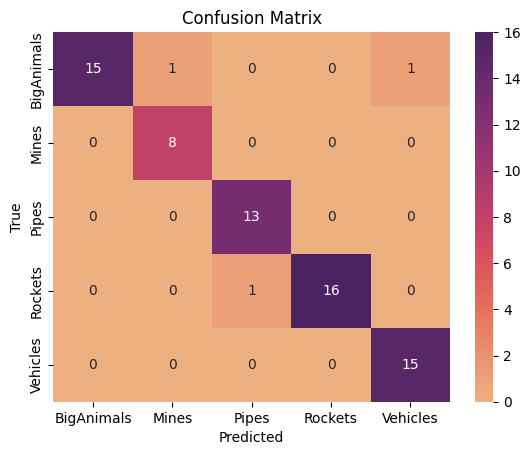

Testing: lr=0.0001, batch_size=16, optimizer=adam, weight_decay=0.0001, epochs=10
Epoch 1/10, Loss: 1.373568207025528
Epoch 2/10, Loss: 0.7009141213364072
Epoch 3/10, Loss: 0.36457470970021355
Epoch 4/10, Loss: 0.20258393925097254
Epoch 5/10, Loss: 0.11357135304974185
Epoch 6/10, Loss: 0.06787508084542221
Epoch 7/10, Loss: 0.0627139869870411
Epoch 8/10, Loss: 0.04912217675397793
Epoch 9/10, Loss: 0.059279234148561954
Epoch 10/10, Loss: 0.048545836419281035
Accuracy: 87.14%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.92      0.71      0.80        17
       Mines       0.80      1.00      0.89         8
       Pipes       0.93      1.00      0.96        13
     Rockets       1.00      0.82      0.90        17
    Vehicles       0.74      0.93      0.82        15

    accuracy                           0.87        70
   macro avg       0.88      0.89      0.88        70
weighted avg       0.89      0.87      0.87        70



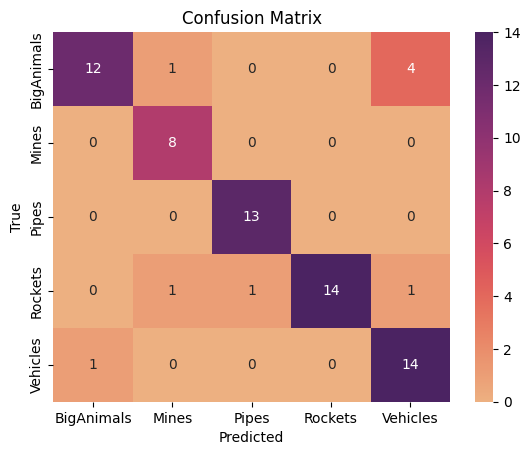

Testing: lr=0.0001, batch_size=16, optimizer=adam, weight_decay=0.0001, epochs=15
Epoch 1/15, Loss: 1.4355174269941118
Epoch 2/15, Loss: 0.707540974020958
Epoch 3/15, Loss: 0.3077458060450024
Epoch 4/15, Loss: 0.16434798099928433
Epoch 5/15, Loss: 0.10116785330077012
Epoch 6/15, Loss: 0.07222581882443693
Epoch 7/15, Loss: 0.06917962214599054
Epoch 8/15, Loss: 0.047030392930739455
Epoch 9/15, Loss: 0.03771814088233643
Epoch 10/15, Loss: 0.03893482881701655
Epoch 11/15, Loss: 0.02341094367309577
Epoch 12/15, Loss: 0.019206917663622234
Epoch 13/15, Loss: 0.02198876287891633
Epoch 14/15, Loss: 0.02481405113616751
Epoch 15/15, Loss: 0.02527357715492447
Accuracy: 97.14%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       1.00      0.94      0.97        17
       Mines       1.00      1.00      1.00         8
       Pipes       0.93      1.00      0.96        13
     Rockets       1.00      0.94      0.97        17
    Vehicles       0.94      1.0

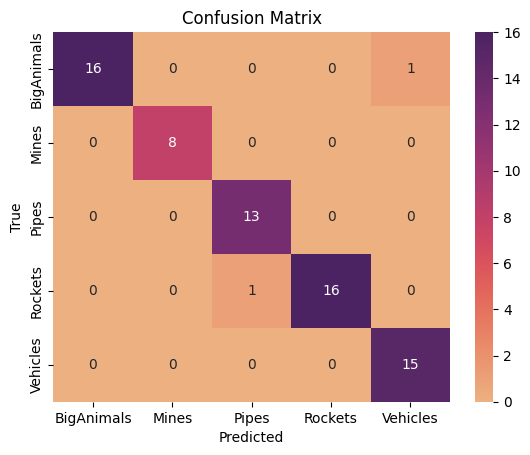

Testing: lr=0.0001, batch_size=16, optimizer=adam, weight_decay=0.0001, epochs=20
Epoch 1/20, Loss: 1.3721951908535428
Epoch 2/20, Loss: 0.7118469940291511
Epoch 3/20, Loss: 0.3592459840906991
Epoch 4/20, Loss: 0.215315540217691
Epoch 5/20, Loss: 0.1062189783487055
Epoch 6/20, Loss: 0.05897944234311581
Epoch 7/20, Loss: 0.055845308841930494
Epoch 8/20, Loss: 0.05121183985223373
Epoch 9/20, Loss: 0.03706493663291136
Epoch 10/20, Loss: 0.07197515966577663
Epoch 11/20, Loss: 0.04804372828867701
Epoch 12/20, Loss: 0.07063648901465866
Epoch 13/20, Loss: 0.0595788513827655
Epoch 14/20, Loss: 0.035539539996534586
Epoch 15/20, Loss: 0.03845235087080962
Epoch 16/20, Loss: 0.031500317415015563
Epoch 17/20, Loss: 0.017271638278745942
Epoch 18/20, Loss: 0.019554439932107925
Epoch 19/20, Loss: 0.033507518366807036
Epoch 20/20, Loss: 0.01936505520198908
Accuracy: 94.29%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.89      1.00      0.94        1

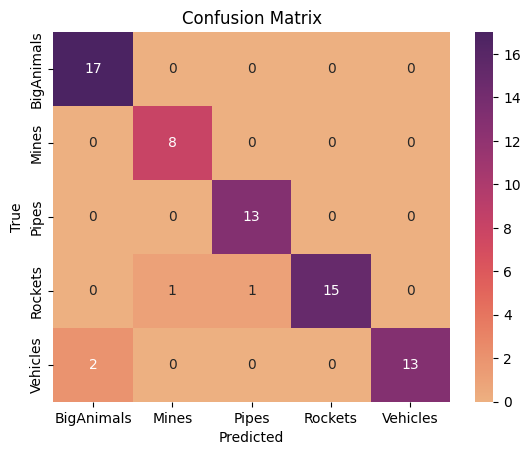

Testing: lr=0.0001, batch_size=16, optimizer=sgd, weight_decay=0.0, epochs=10
Epoch 1/10, Loss: 1.6729668776194255
Epoch 2/10, Loss: 1.544692039489746
Epoch 3/10, Loss: 1.463520924250285
Epoch 4/10, Loss: 1.3535846670468648
Epoch 5/10, Loss: 1.2573226028018527
Epoch 6/10, Loss: 1.18629209862815
Epoch 7/10, Loss: 1.08930218550894
Epoch 8/10, Loss: 1.0418093966113195
Epoch 9/10, Loss: 0.9892942905426025
Epoch 10/10, Loss: 0.9129981034331851
Accuracy: 72.86%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.75      0.88      0.81        17
       Mines       0.42      0.62      0.50         8
       Pipes       0.75      0.92      0.83        13
     Rockets       1.00      0.59      0.74        17
    Vehicles       0.75      0.60      0.67        15

    accuracy                           0.73        70
   macro avg       0.73      0.72      0.71        70
weighted avg       0.77      0.73      0.73        70



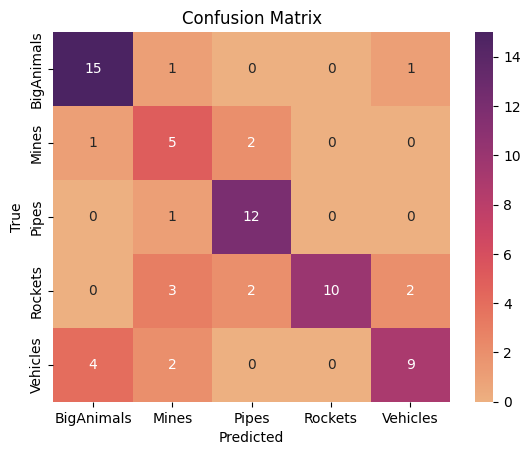

Testing: lr=0.0001, batch_size=16, optimizer=sgd, weight_decay=0.0, epochs=15
Epoch 1/15, Loss: 1.664629684554206
Epoch 2/15, Loss: 1.5149185723728604
Epoch 3/15, Loss: 1.4358920521206326
Epoch 4/15, Loss: 1.351993375354343
Epoch 5/15, Loss: 1.2945488293965657
Epoch 6/15, Loss: 1.1993402706252203
Epoch 7/15, Loss: 1.1273099184036255
Epoch 8/15, Loss: 1.0403550333446927
Epoch 9/15, Loss: 0.9901960260338254
Epoch 10/15, Loss: 0.9174369772275289
Epoch 11/15, Loss: 0.861067470577028
Epoch 12/15, Loss: 0.7973402804798551
Epoch 13/15, Loss: 0.793451319138209
Epoch 14/15, Loss: 0.6830258833037482
Epoch 15/15, Loss: 0.6818526950147417
Accuracy: 78.57%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.74      0.82      0.78        17
       Mines       1.00      0.62      0.77         8
       Pipes       0.72      1.00      0.84        13
     Rockets       0.93      0.76      0.84        17
    Vehicles       0.71      0.67      0.69        15

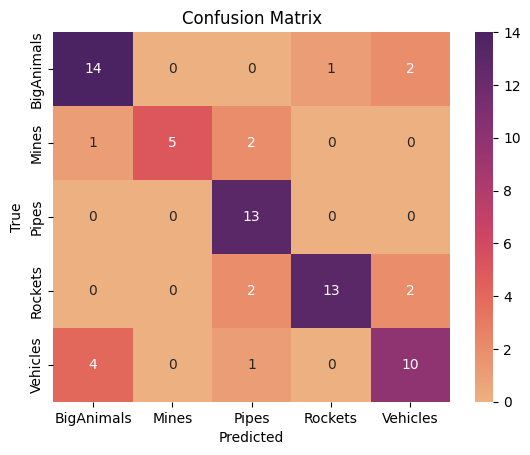

Testing: lr=0.0001, batch_size=16, optimizer=sgd, weight_decay=0.0, epochs=20
Epoch 1/20, Loss: 1.637549552652571
Epoch 2/20, Loss: 1.5512465039889018
Epoch 3/20, Loss: 1.4617767930030823
Epoch 4/20, Loss: 1.3942208621237013
Epoch 5/20, Loss: 1.3098040289349027
Epoch 6/20, Loss: 1.2470886243714228
Epoch 7/20, Loss: 1.1642496056026883
Epoch 8/20, Loss: 1.0806046724319458
Epoch 9/20, Loss: 1.033816784620285
Epoch 10/20, Loss: 0.9556513594256507
Epoch 11/20, Loss: 0.907552550236384
Epoch 12/20, Loss: 0.8457837932639651
Epoch 13/20, Loss: 0.8077056010564169
Epoch 14/20, Loss: 0.7358933521641625
Epoch 15/20, Loss: 0.7383221487204233
Epoch 16/20, Loss: 0.6681974132855734
Epoch 17/20, Loss: 0.6199062085813947
Epoch 18/20, Loss: 0.6067623280816608
Epoch 19/20, Loss: 0.5702898071871864
Epoch 20/20, Loss: 0.5066425253947576
Accuracy: 82.86%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.93      0.82      0.88        17
       Mines       0.67 

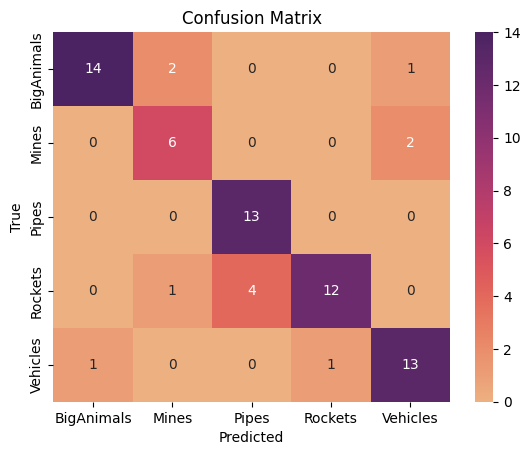

Testing: lr=0.0001, batch_size=16, optimizer=sgd, weight_decay=0.001, epochs=10
Epoch 1/10, Loss: 1.6574207213189867
Epoch 2/10, Loss: 1.5443271266089544
Epoch 3/10, Loss: 1.4540332092179193
Epoch 4/10, Loss: 1.3525008625454373
Epoch 5/10, Loss: 1.2802632914649115
Epoch 6/10, Loss: 1.1838840709792242
Epoch 7/10, Loss: 1.121493720346027
Epoch 8/10, Loss: 1.0294355518288083
Epoch 9/10, Loss: 0.9626208874914381
Epoch 10/10, Loss: 0.9351557857460446
Accuracy: 72.86%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.67      0.47      0.55        17
       Mines       0.58      0.88      0.70         8
       Pipes       0.93      1.00      0.96        13
     Rockets       0.86      0.71      0.77        17
    Vehicles       0.61      0.73      0.67        15

    accuracy                           0.73        70
   macro avg       0.73      0.76      0.73        70
weighted avg       0.74      0.73      0.72        70



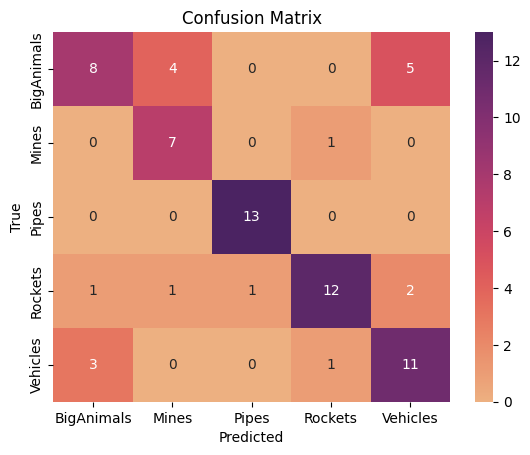

Testing: lr=0.0001, batch_size=16, optimizer=sgd, weight_decay=0.001, epochs=15
Epoch 1/15, Loss: 1.6368347605069478
Epoch 2/15, Loss: 1.5568254391352336
Epoch 3/15, Loss: 1.4573630889256795
Epoch 4/15, Loss: 1.35573720269733
Epoch 5/15, Loss: 1.2686489820480347
Epoch 6/15, Loss: 1.2107963893148634
Epoch 7/15, Loss: 1.1488076150417328
Epoch 8/15, Loss: 1.0503545767731137
Epoch 9/15, Loss: 0.9814395440949334
Epoch 10/15, Loss: 0.9278034567832947
Epoch 11/15, Loss: 0.8729147017002106
Epoch 12/15, Loss: 0.8082213004430135
Epoch 13/15, Loss: 0.755586690372891
Epoch 14/15, Loss: 0.7014579309357537
Epoch 15/15, Loss: 0.6125841124190224
Accuracy: 80.00%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.74      0.82      0.78        17
       Mines       0.56      0.62      0.59         8
       Pipes       0.93      1.00      0.96        13
     Rockets       0.82      0.82      0.82        17
    Vehicles       0.91      0.67      0.77       

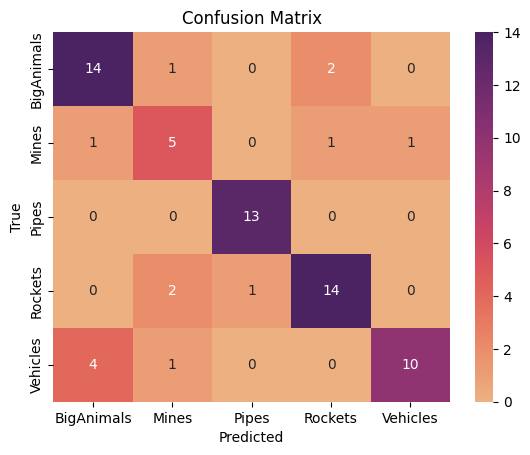

Testing: lr=0.0001, batch_size=16, optimizer=sgd, weight_decay=0.001, epochs=20
Epoch 1/20, Loss: 1.6361005902290344
Epoch 2/20, Loss: 1.5267924732632108
Epoch 3/20, Loss: 1.426374938752916
Epoch 4/20, Loss: 1.3174202640851338
Epoch 5/20, Loss: 1.2401483588748508
Epoch 6/20, Loss: 1.174748142560323
Epoch 7/20, Loss: 1.1154446303844452
Epoch 8/20, Loss: 1.0334924194547865
Epoch 9/20, Loss: 0.9584739539358351
Epoch 10/20, Loss: 0.912158360083898
Epoch 11/20, Loss: 0.8489437533749474
Epoch 12/20, Loss: 0.8008152941862742
Epoch 13/20, Loss: 0.7236578332053291
Epoch 14/20, Loss: 0.7256947822040982
Epoch 15/20, Loss: 0.6368853863742616
Epoch 16/20, Loss: 0.6151807424094942
Epoch 17/20, Loss: 0.5927887409925461
Epoch 18/20, Loss: 0.5342832422918744
Epoch 19/20, Loss: 0.5167694025569491
Epoch 20/20, Loss: 0.4931097941266166
Accuracy: 88.57%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.78      0.82      0.80        17
       Mines       0.8

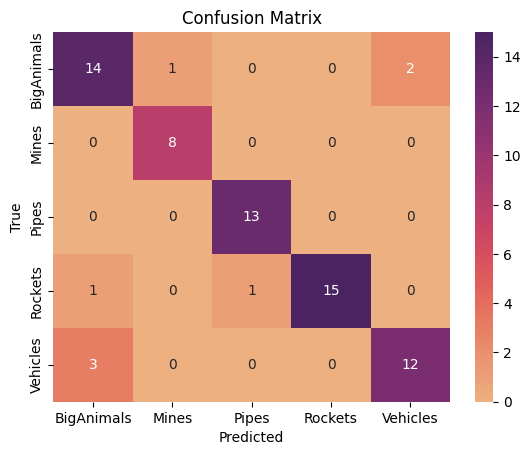

Testing: lr=0.0001, batch_size=16, optimizer=sgd, weight_decay=0.0001, epochs=10
Epoch 1/10, Loss: 1.644798669550154
Epoch 2/10, Loss: 1.551764686902364
Epoch 3/10, Loss: 1.4401834143532648
Epoch 4/10, Loss: 1.3722583187950983
Epoch 5/10, Loss: 1.2856094042460124
Epoch 6/10, Loss: 1.1957335207197402
Epoch 7/10, Loss: 1.1397012372811635
Epoch 8/10, Loss: 1.0579547782739003
Epoch 9/10, Loss: 0.9959495895438724
Epoch 10/10, Loss: 0.9281284345520867
Accuracy: 77.14%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.74      0.82      0.78        17
       Mines       0.67      0.75      0.71         8
       Pipes       0.86      0.92      0.89        13
     Rockets       1.00      0.65      0.79        17
    Vehicles       0.65      0.73      0.69        15

    accuracy                           0.77        70
   macro avg       0.78      0.78      0.77        70
weighted avg       0.80      0.77      0.77        70



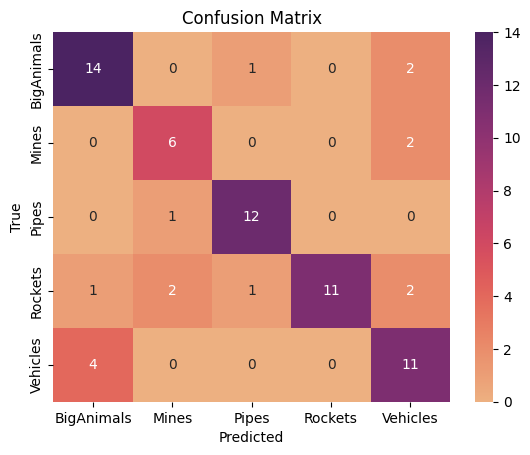

Testing: lr=0.0001, batch_size=16, optimizer=sgd, weight_decay=0.0001, epochs=15
Epoch 1/15, Loss: 1.768126176463233
Epoch 2/15, Loss: 1.5578644474347432
Epoch 3/15, Loss: 1.4500379827287462
Epoch 4/15, Loss: 1.3788153330485027
Epoch 5/15, Loss: 1.2802509268124898
Epoch 6/15, Loss: 1.220410770840115
Epoch 7/15, Loss: 1.1346569524870977
Epoch 8/15, Loss: 1.0640909439987607
Epoch 9/15, Loss: 0.9802059133847555
Epoch 10/15, Loss: 0.930631611082289
Epoch 11/15, Loss: 0.8756823970211877
Epoch 12/15, Loss: 0.8308831022845374
Epoch 13/15, Loss: 0.7698930733733707
Epoch 14/15, Loss: 0.7000774873627557
Epoch 15/15, Loss: 0.6926545600096384
Accuracy: 84.29%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.83      0.88      0.86        17
       Mines       0.70      0.88      0.78         8
       Pipes       0.87      1.00      0.93        13
     Rockets       0.93      0.82      0.88        17
    Vehicles       0.83      0.67      0.74      

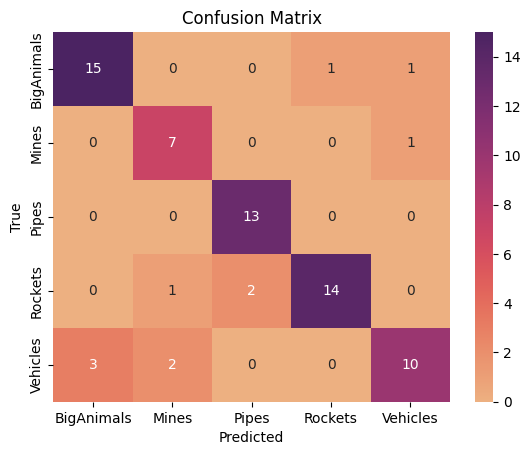

Testing: lr=0.0001, batch_size=16, optimizer=sgd, weight_decay=0.0001, epochs=20
Epoch 1/20, Loss: 1.6515512201521132
Epoch 2/20, Loss: 1.5042044189241197
Epoch 3/20, Loss: 1.4134589433670044
Epoch 4/20, Loss: 1.3123523129357233
Epoch 5/20, Loss: 1.2526332934697468
Epoch 6/20, Loss: 1.179646611213684
Epoch 7/20, Loss: 1.1019700798723433
Epoch 8/20, Loss: 1.0371976329220667
Epoch 9/20, Loss: 1.0055986874633365
Epoch 10/20, Loss: 0.919930080572764
Epoch 11/20, Loss: 0.8802020417319404
Epoch 12/20, Loss: 0.8180509474542406
Epoch 13/20, Loss: 0.7659422722127702
Epoch 14/20, Loss: 0.7211414575576782
Epoch 15/20, Loss: 0.6823294527000852
Epoch 16/20, Loss: 0.638628085454305
Epoch 17/20, Loss: 0.5749892675214343
Epoch 18/20, Loss: 0.522941529750824
Epoch 19/20, Loss: 0.5367357316944334
Epoch 20/20, Loss: 0.4845273080799315
Accuracy: 84.29%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.79      0.88      0.83        17
       Mines       1.0

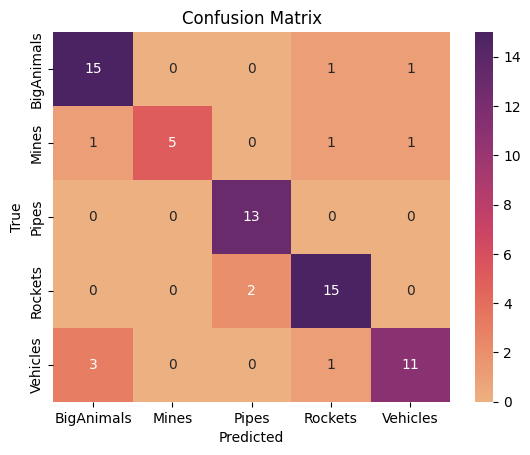

Testing: lr=0.0001, batch_size=16, optimizer=rmsprop, weight_decay=0.0, epochs=10
Epoch 1/10, Loss: 1.154686924484041
Epoch 2/10, Loss: 0.5080630431572596
Epoch 3/10, Loss: 0.18168219220307139
Epoch 4/10, Loss: 0.10860713405741586
Epoch 5/10, Loss: 0.05818907140443722
Epoch 6/10, Loss: 0.09947642725374964
Epoch 7/10, Loss: 0.0755814519814319
Epoch 8/10, Loss: 0.04537991346377465
Epoch 9/10, Loss: 0.017521274120857317
Epoch 10/10, Loss: 0.02239560103043914
Accuracy: 92.86%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       1.00      0.88      0.94        17
       Mines       0.73      1.00      0.84         8
       Pipes       0.93      1.00      0.96        13
     Rockets       1.00      0.94      0.97        17
    Vehicles       0.93      0.87      0.90        15

    accuracy                           0.93        70
   macro avg       0.92      0.94      0.92        70
weighted avg       0.94      0.93      0.93        70



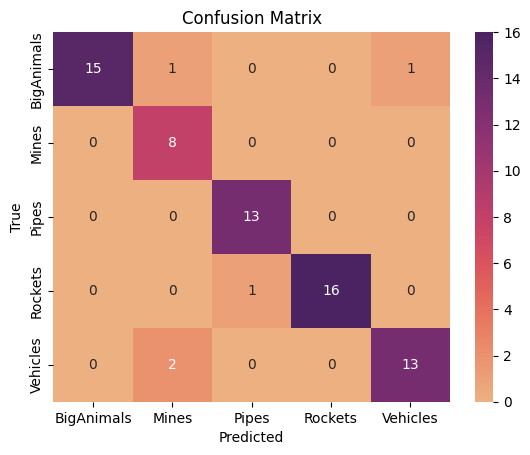

Testing: lr=0.0001, batch_size=16, optimizer=rmsprop, weight_decay=0.0, epochs=15
Epoch 1/15, Loss: 1.1323185099495783
Epoch 2/15, Loss: 0.38049985468387604
Epoch 3/15, Loss: 0.15002820764978728
Epoch 4/15, Loss: 0.10799454069799846
Epoch 5/15, Loss: 0.043103749501622386
Epoch 6/15, Loss: 0.05329423423649536
Epoch 7/15, Loss: 0.04209638537011213
Epoch 8/15, Loss: 0.03847103100270033
Epoch 9/15, Loss: 0.04050104881429838
Epoch 10/15, Loss: 0.018951222688580554
Epoch 11/15, Loss: 0.032700605509388775
Epoch 12/15, Loss: 0.036093099818875395
Epoch 13/15, Loss: 0.045620171974102654
Epoch 14/15, Loss: 0.04562288587395516
Epoch 15/15, Loss: 0.050739112491202026
Accuracy: 88.57%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.89      0.94      0.91        17
       Mines       0.88      0.88      0.88         8
       Pipes       0.86      0.92      0.89        13
     Rockets       0.89      0.94      0.91        17
    Vehicles       0.92  

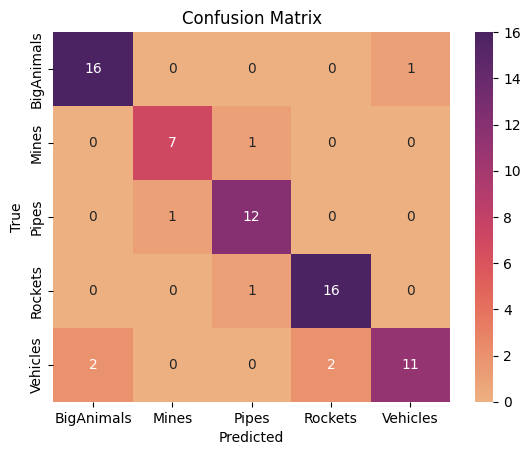

Testing: lr=0.0001, batch_size=16, optimizer=rmsprop, weight_decay=0.0, epochs=20
Epoch 1/20, Loss: 1.1530446973111894
Epoch 2/20, Loss: 0.38550661835405564
Epoch 3/20, Loss: 0.17464294884767798
Epoch 4/20, Loss: 0.06781957909050915
Epoch 5/20, Loss: 0.07188142432520787
Epoch 6/20, Loss: 0.048587097217225365
Epoch 7/20, Loss: 0.06438516773697403
Epoch 8/20, Loss: 0.07543202929405703
Epoch 9/20, Loss: 0.04001899167067475
Epoch 10/20, Loss: 0.060570176509726376
Epoch 11/20, Loss: 0.022753726872098114
Epoch 12/20, Loss: 0.024407899731563196
Epoch 13/20, Loss: 0.013506033444880612
Epoch 14/20, Loss: 0.03128761538149168
Epoch 15/20, Loss: 0.02684993780631986
Epoch 16/20, Loss: 0.010516904527321458
Epoch 17/20, Loss: 0.011920920469694667
Epoch 18/20, Loss: 0.027364922027724486
Epoch 19/20, Loss: 0.011097352693064345
Epoch 20/20, Loss: 0.006753677101288404
Accuracy: 97.14%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.94      1.00      0.9

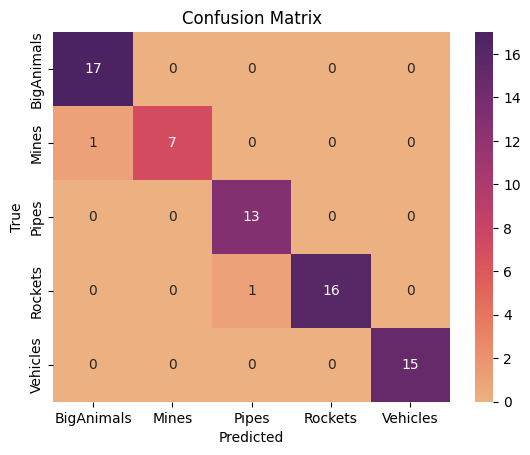

Testing: lr=0.0001, batch_size=16, optimizer=rmsprop, weight_decay=0.001, epochs=10
Epoch 1/10, Loss: 1.0293669584724638
Epoch 2/10, Loss: 0.3855699035856459
Epoch 3/10, Loss: 0.15611149639719063
Epoch 4/10, Loss: 0.09163729649864966
Epoch 5/10, Loss: 0.10226167593565252
Epoch 6/10, Loss: 0.06144779563571016
Epoch 7/10, Loss: 0.0474146889626152
Epoch 8/10, Loss: 0.034506289650582604
Epoch 9/10, Loss: 0.0928645274705357
Epoch 10/10, Loss: 0.0803741386367215
Accuracy: 92.86%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.89      1.00      0.94        17
       Mines       1.00      0.88      0.93         8
       Pipes       0.87      1.00      0.93        13
     Rockets       0.94      0.94      0.94        17
    Vehicles       1.00      0.80      0.89        15

    accuracy                           0.93        70
   macro avg       0.94      0.92      0.93        70
weighted avg       0.94      0.93      0.93        70



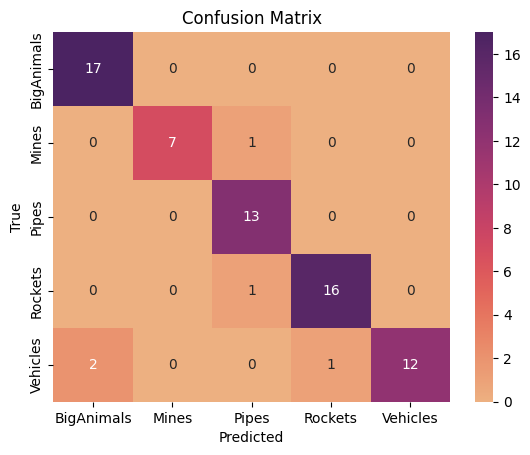

Testing: lr=0.0001, batch_size=16, optimizer=rmsprop, weight_decay=0.001, epochs=15
Epoch 1/15, Loss: 1.0719296435515087
Epoch 2/15, Loss: 0.42791997972461915
Epoch 3/15, Loss: 0.1635261196643114
Epoch 4/15, Loss: 0.11727053713467386
Epoch 5/15, Loss: 0.08829805544681019
Epoch 6/15, Loss: 0.0626877024769783
Epoch 7/15, Loss: 0.03717942240958413
Epoch 8/15, Loss: 0.03432739652796752
Epoch 9/15, Loss: 0.06861763116386202
Epoch 10/15, Loss: 0.04456239995650119
Epoch 11/15, Loss: 0.04945555572501487
Epoch 12/15, Loss: 0.02289452721985678
Epoch 13/15, Loss: 0.024930487309272092
Epoch 14/15, Loss: 0.012762049187181724
Epoch 15/15, Loss: 0.012825210009598069
Accuracy: 94.29%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.85      1.00      0.92        17
       Mines       1.00      1.00      1.00         8
       Pipes       0.93      1.00      0.96        13
     Rockets       1.00      0.88      0.94        17
    Vehicles       1.00     

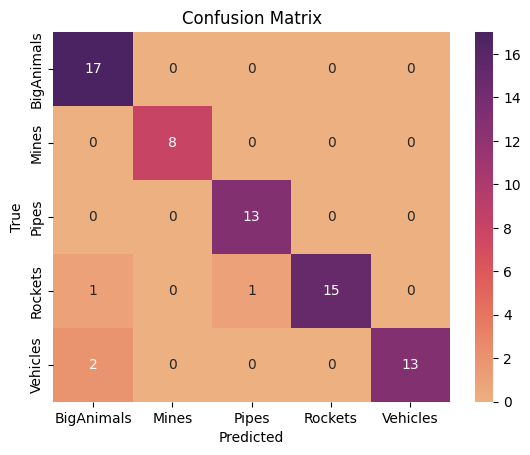

Testing: lr=0.0001, batch_size=16, optimizer=rmsprop, weight_decay=0.001, epochs=20
Epoch 1/20, Loss: 1.1059016320440505
Epoch 2/20, Loss: 0.3915920588705275
Epoch 3/20, Loss: 0.18463513627648354
Epoch 4/20, Loss: 0.12113556431399451
Epoch 5/20, Loss: 0.1313817985355854
Epoch 6/20, Loss: 0.08426692135011156
Epoch 7/20, Loss: 0.07776488700053757
Epoch 8/20, Loss: 0.06534631627922256
Epoch 9/20, Loss: 0.1044497858836419
Epoch 10/20, Loss: 0.058968242102613054
Epoch 11/20, Loss: 0.024566019264360268
Epoch 12/20, Loss: 0.020343218800715275
Epoch 13/20, Loss: 0.01807639789250162
Epoch 14/20, Loss: 0.009918471461989813
Epoch 15/20, Loss: 0.05843019764870405
Epoch 16/20, Loss: 0.07505883840430114
Epoch 17/20, Loss: 0.026162105483106442
Epoch 18/20, Loss: 0.0398961263967471
Epoch 19/20, Loss: 0.03159803478047252
Epoch 20/20, Loss: 0.025366213638335466
Accuracy: 91.43%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.94      0.94      0.94     

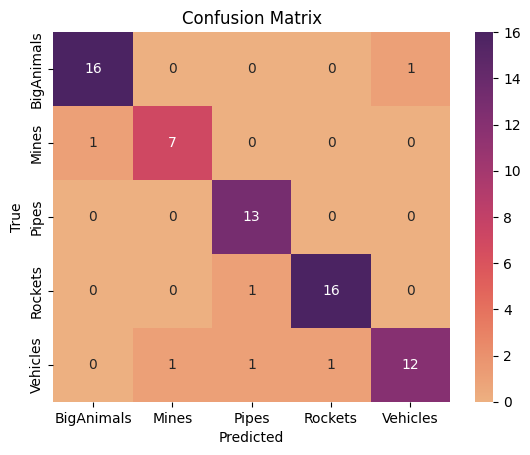

Testing: lr=0.0001, batch_size=16, optimizer=rmsprop, weight_decay=0.0001, epochs=10
Epoch 1/10, Loss: 1.0801272922092013
Epoch 2/10, Loss: 0.39607378674878013
Epoch 3/10, Loss: 0.15197907843523556
Epoch 4/10, Loss: 0.054156363320847355
Epoch 5/10, Loss: 0.039461192985375725
Epoch 6/10, Loss: 0.042432229241563216
Epoch 7/10, Loss: 0.1292787083528108
Epoch 8/10, Loss: 0.08526856390138467
Epoch 9/10, Loss: 0.06729900490285622
Epoch 10/10, Loss: 0.0267374862709807
Accuracy: 90.00%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.82      0.82      0.82        17
       Mines       0.89      1.00      0.94         8
       Pipes       0.93      1.00      0.96        13
     Rockets       1.00      0.94      0.97        17
    Vehicles       0.86      0.80      0.83        15

    accuracy                           0.90        70
   macro avg       0.90      0.91      0.90        70
weighted avg       0.90      0.90      0.90        70



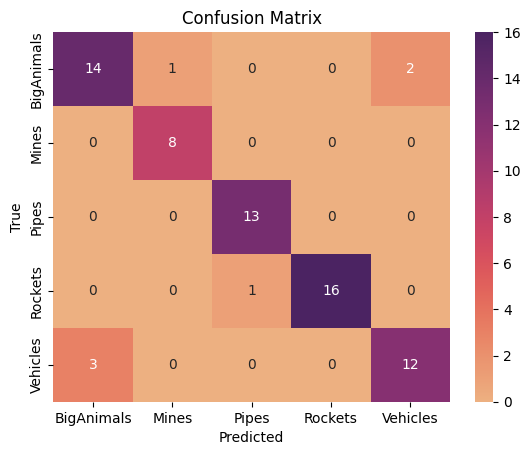

Testing: lr=0.0001, batch_size=16, optimizer=rmsprop, weight_decay=0.0001, epochs=15
Epoch 1/15, Loss: 1.1349906656477187
Epoch 2/15, Loss: 0.30627654906776214
Epoch 3/15, Loss: 0.12342400538424651
Epoch 4/15, Loss: 0.08508466867109139
Epoch 5/15, Loss: 0.05627365265455511
Epoch 6/15, Loss: 0.03282369637034006
Epoch 7/15, Loss: 0.025448400992900133
Epoch 8/15, Loss: 0.021676421734607883
Epoch 9/15, Loss: 0.02414911610281302
Epoch 10/15, Loss: 0.022989489370957017
Epoch 11/15, Loss: 0.017419799230992794
Epoch 12/15, Loss: 0.09838582542983608
Epoch 13/15, Loss: 0.05945139181696706
Epoch 14/15, Loss: 0.03965493951303264
Epoch 15/15, Loss: 0.02535988747452696
Accuracy: 94.29%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       1.00      0.82      0.90        17
       Mines       0.89      1.00      0.94         8
       Pipes       0.93      1.00      0.96        13
     Rockets       1.00      0.94      0.97        17
    Vehicles       0.88 

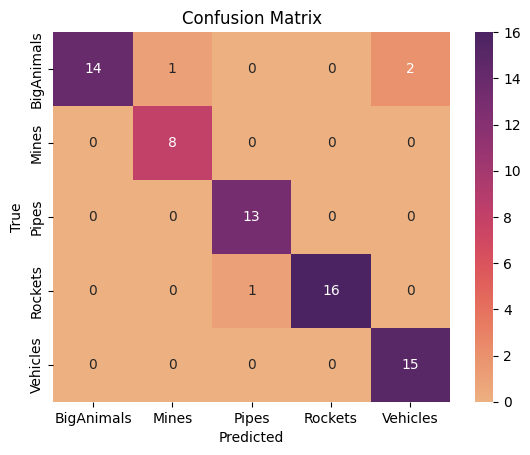

Testing: lr=0.0001, batch_size=16, optimizer=rmsprop, weight_decay=0.0001, epochs=20
Epoch 1/20, Loss: 1.1105535626411438
Epoch 2/20, Loss: 0.3682101046045621
Epoch 3/20, Loss: 0.163977626297209
Epoch 4/20, Loss: 0.11215742573969895
Epoch 5/20, Loss: 0.04268378743694888
Epoch 6/20, Loss: 0.04965715389698744
Epoch 7/20, Loss: 0.04996540645758311
Epoch 8/20, Loss: 0.04013333891311453
Epoch 9/20, Loss: 0.06271003786888388
Epoch 10/20, Loss: 0.04595546724481715
Epoch 11/20, Loss: 0.026322527840319607
Epoch 12/20, Loss: 0.026353094985501632
Epoch 13/20, Loss: 0.09817002905118796
Epoch 14/20, Loss: 0.017974435196568567
Epoch 15/20, Loss: 0.015055606710828014
Epoch 16/20, Loss: 0.029657122627314594
Epoch 17/20, Loss: 0.09399392616210712
Epoch 18/20, Loss: 0.026015244476083253
Epoch 19/20, Loss: 0.03672752764800356
Epoch 20/20, Loss: 0.020824137221400935
Accuracy: 92.86%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       1.00      0.82      0.90  

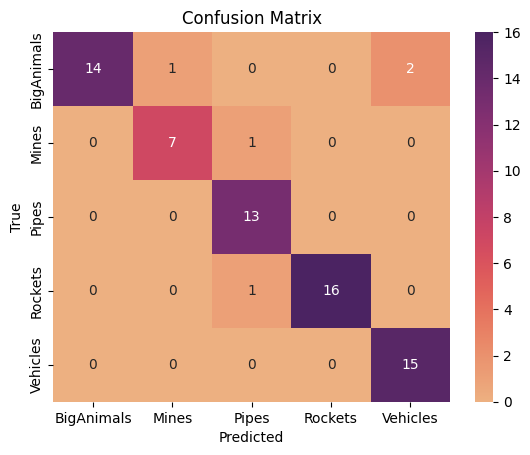

Testing: lr=0.0001, batch_size=32, optimizer=adam, weight_decay=0.0, epochs=10
Epoch 1/10, Loss: 1.4416163232591417
Epoch 2/10, Loss: 0.7637686199612088
Epoch 3/10, Loss: 0.4396515687306722
Epoch 4/10, Loss: 0.23842724495463902
Epoch 5/10, Loss: 0.14996653381321165
Epoch 6/10, Loss: 0.0921027229891883
Epoch 7/10, Loss: 0.05116928741335869
Epoch 8/10, Loss: 0.04118648130032751
Epoch 9/10, Loss: 0.027502473443746567
Epoch 10/10, Loss: 0.02520063312517272
Accuracy: 91.43%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.88      0.88      0.88        17
       Mines       1.00      1.00      1.00         8
       Pipes       0.87      1.00      0.93        13
     Rockets       0.94      0.88      0.91        17
    Vehicles       0.93      0.87      0.90        15

    accuracy                           0.91        70
   macro avg       0.92      0.93      0.92        70
weighted avg       0.92      0.91      0.91        70



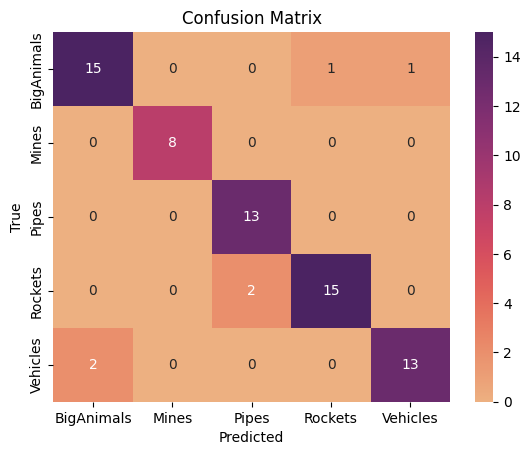

Testing: lr=0.0001, batch_size=32, optimizer=adam, weight_decay=0.0, epochs=15
Epoch 1/15, Loss: 1.4231696261299982
Epoch 2/15, Loss: 0.7672930028703477
Epoch 3/15, Loss: 0.4246742394235399
Epoch 4/15, Loss: 0.24360037677817875
Epoch 5/15, Loss: 0.11261134677463108
Epoch 6/15, Loss: 0.07967245785726441
Epoch 7/15, Loss: 0.05343279325299793
Epoch 8/15, Loss: 0.04108647753794988
Epoch 9/15, Loss: 0.023139082723193698
Epoch 10/15, Loss: 0.031215969680084124
Epoch 11/15, Loss: 0.02050002022749848
Epoch 12/15, Loss: 0.015911238578458626
Epoch 13/15, Loss: 0.014124787929985259
Epoch 14/15, Loss: 0.012195040161410967
Epoch 15/15, Loss: 0.012065104001926051
Accuracy: 91.43%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.84      0.94      0.89        17
       Mines       0.89      1.00      0.94         8
       Pipes       0.87      1.00      0.93        13
     Rockets       1.00      0.88      0.94        17
    Vehicles       1.00      0

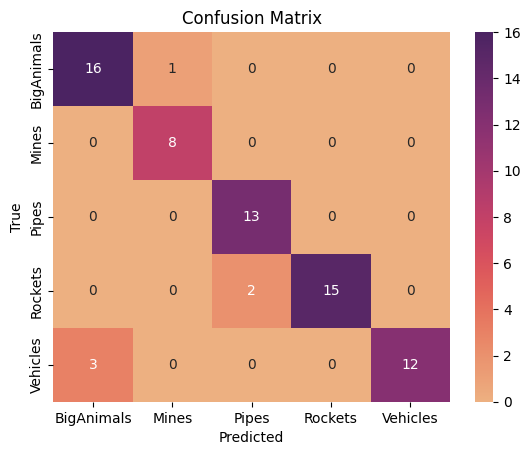

Testing: lr=0.0001, batch_size=32, optimizer=adam, weight_decay=0.0, epochs=20
Epoch 1/20, Loss: 1.398433009783427
Epoch 2/20, Loss: 0.7080019116401672
Epoch 3/20, Loss: 0.425688988632626
Epoch 4/20, Loss: 0.22840742270151773
Epoch 5/20, Loss: 0.12207814885510339
Epoch 6/20, Loss: 0.07131827498475711
Epoch 7/20, Loss: 0.051871570034159556
Epoch 8/20, Loss: 0.04831565192176236
Epoch 9/20, Loss: 0.027827763516041968
Epoch 10/20, Loss: 0.02401325830982791
Epoch 11/20, Loss: 0.02148875252654155
Epoch 12/20, Loss: 0.017322342325415876
Epoch 13/20, Loss: 0.01440740024877919
Epoch 14/20, Loss: 0.012933731493022706
Epoch 15/20, Loss: 0.009314074905382263
Epoch 16/20, Loss: 0.008282599453296926
Epoch 17/20, Loss: 0.00851438825743066
Epoch 18/20, Loss: 0.007111124021725522
Epoch 19/20, Loss: 0.008525079995807674
Epoch 20/20, Loss: 0.0065904381271037794
Accuracy: 94.29%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.89      1.00      0.94      

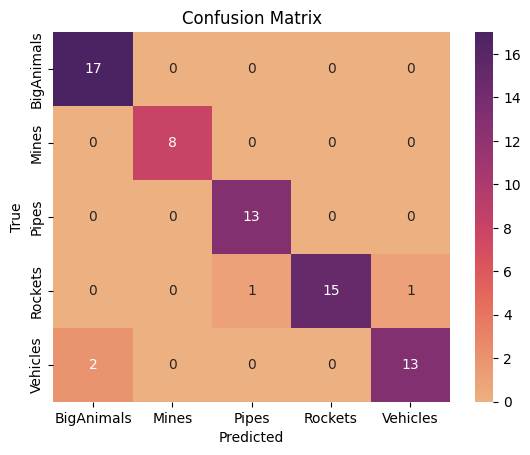

Testing: lr=0.0001, batch_size=32, optimizer=adam, weight_decay=0.001, epochs=10
Epoch 1/10, Loss: 1.4571625656551785
Epoch 2/10, Loss: 0.8245061900880601
Epoch 3/10, Loss: 0.46199007829030353
Epoch 4/10, Loss: 0.27717362840970355
Epoch 5/10, Loss: 0.1397520618306266
Epoch 6/10, Loss: 0.09524377725190586
Epoch 7/10, Loss: 0.05314551293849945
Epoch 8/10, Loss: 0.03694028055502309
Epoch 9/10, Loss: 0.03454013148115741
Epoch 10/10, Loss: 0.026115723368194368
Accuracy: 92.86%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.94      0.94      0.94        17
       Mines       1.00      1.00      1.00         8
       Pipes       0.87      1.00      0.93        13
     Rockets       1.00      0.82      0.90        17
    Vehicles       0.88      0.93      0.90        15

    accuracy                           0.93        70
   macro avg       0.94      0.94      0.94        70
weighted avg       0.93      0.93      0.93        70



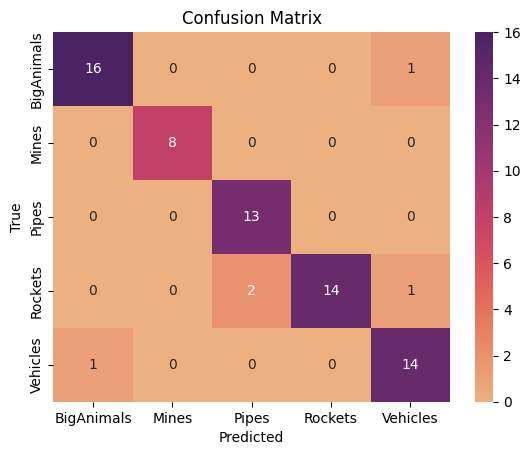

Testing: lr=0.0001, batch_size=32, optimizer=adam, weight_decay=0.001, epochs=15
Epoch 1/15, Loss: 1.497902062204149
Epoch 2/15, Loss: 0.8065899742974175
Epoch 3/15, Loss: 0.4117536313003964
Epoch 4/15, Loss: 0.23372204932901594
Epoch 5/15, Loss: 0.1413208329015308
Epoch 6/15, Loss: 0.08825958354605569
Epoch 7/15, Loss: 0.050590862002637654
Epoch 8/15, Loss: 0.033867009811931185
Epoch 9/15, Loss: 0.026620585264431104
Epoch 10/15, Loss: 0.019831166706151433
Epoch 11/15, Loss: 0.015745056172211964
Epoch 12/15, Loss: 0.013555970767305957
Epoch 13/15, Loss: 0.014930762247078948
Epoch 14/15, Loss: 0.013009686436918046
Epoch 15/15, Loss: 0.010324146029435925
Accuracy: 92.86%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.84      0.94      0.89        17
       Mines       0.89      1.00      0.94         8
       Pipes       0.93      1.00      0.96        13
     Rockets       1.00      0.94      0.97        17
    Vehicles       1.00    

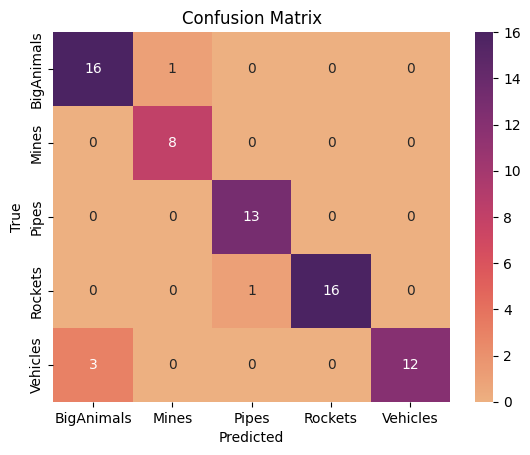

Testing: lr=0.0001, batch_size=32, optimizer=adam, weight_decay=0.001, epochs=20
Epoch 1/20, Loss: 1.4379831155141194
Epoch 2/20, Loss: 0.7505983312924703
Epoch 3/20, Loss: 0.39549346102608574
Epoch 4/20, Loss: 0.20184602505630916
Epoch 5/20, Loss: 0.12600857102208668
Epoch 6/20, Loss: 0.07215546857979563
Epoch 7/20, Loss: 0.0489946413371298
Epoch 8/20, Loss: 0.029888682067394257
Epoch 9/20, Loss: 0.0255115439908372
Epoch 10/20, Loss: 0.021302353590726852
Epoch 11/20, Loss: 0.01673688180744648
Epoch 12/20, Loss: 0.015251551133890947
Epoch 13/20, Loss: 0.012725646193656657
Epoch 14/20, Loss: 0.014234808325353596
Epoch 15/20, Loss: 0.010153736298282942
Epoch 16/20, Loss: 0.010652323822594352
Epoch 17/20, Loss: 0.008908851486113336
Epoch 18/20, Loss: 0.007614174236853917
Epoch 19/20, Loss: 0.007183940046363407
Epoch 20/20, Loss: 0.007695813870264424
Accuracy: 94.29%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.89      0.94      0.91  

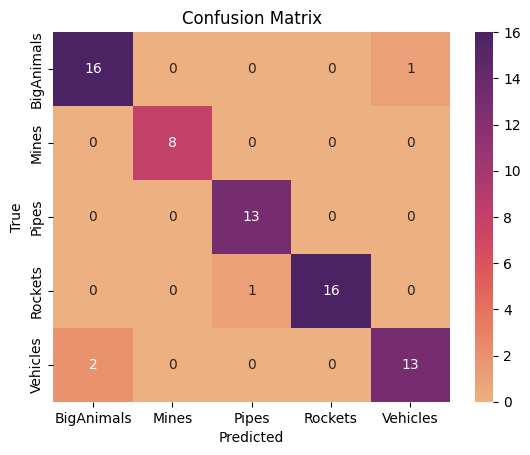

Testing: lr=0.0001, batch_size=32, optimizer=adam, weight_decay=0.0001, epochs=10
Epoch 1/10, Loss: 1.4655093881818984
Epoch 2/10, Loss: 0.742217050658332
Epoch 3/10, Loss: 0.37512997951772475
Epoch 4/10, Loss: 0.1991337686777115
Epoch 5/10, Loss: 0.10179747889439265
Epoch 6/10, Loss: 0.08303477987647057
Epoch 7/10, Loss: 0.04622850939631462
Epoch 8/10, Loss: 0.04253212403919962
Epoch 9/10, Loss: 0.02913008402619097
Epoch 10/10, Loss: 0.018117981135017343
Accuracy: 92.86%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       1.00      0.88      0.94        17
       Mines       0.89      1.00      0.94         8
       Pipes       0.87      1.00      0.93        13
     Rockets       1.00      0.88      0.94        17
    Vehicles       0.88      0.93      0.90        15

    accuracy                           0.93        70
   macro avg       0.93      0.94      0.93        70
weighted avg       0.94      0.93      0.93        70



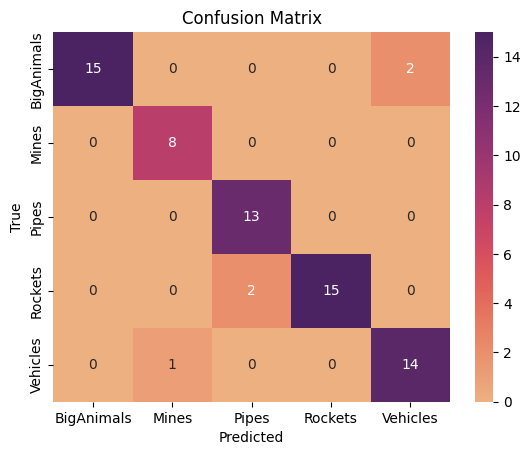

Testing: lr=0.0001, batch_size=32, optimizer=adam, weight_decay=0.0001, epochs=15
Epoch 1/15, Loss: 1.5195696618821886
Epoch 2/15, Loss: 0.8211335076226128
Epoch 3/15, Loss: 0.44078781538539463
Epoch 4/15, Loss: 0.2322424981329176
Epoch 5/15, Loss: 0.13338118460443285
Epoch 6/15, Loss: 0.07319966248340076
Epoch 7/15, Loss: 0.050147185722986855
Epoch 8/15, Loss: 0.03949531519578563
Epoch 9/15, Loss: 0.02315740928881698
Epoch 10/15, Loss: 0.021889643226232793
Epoch 11/15, Loss: 0.021426746104326513
Epoch 12/15, Loss: 0.014082965130607287
Epoch 13/15, Loss: 0.017898313080271084
Epoch 14/15, Loss: 0.011691068402594991
Epoch 15/15, Loss: 0.010268831625580788
Accuracy: 95.71%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.89      1.00      0.94        17
       Mines       1.00      1.00      1.00         8
       Pipes       1.00      1.00      1.00        13
     Rockets       1.00      0.94      0.97        17
    Vehicles       0.93   

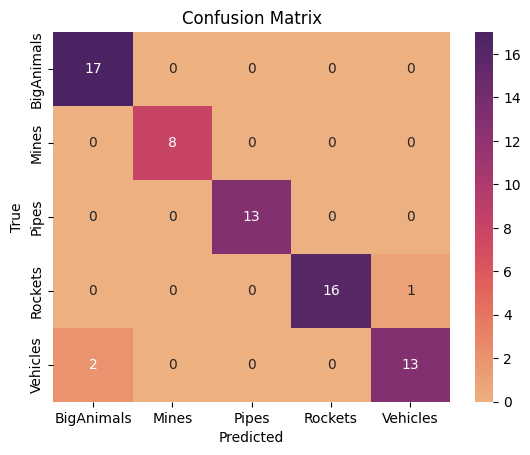

Testing: lr=0.0001, batch_size=32, optimizer=adam, weight_decay=0.0001, epochs=20
Epoch 1/20, Loss: 1.457238859600491
Epoch 2/20, Loss: 0.7997594078381857
Epoch 3/20, Loss: 0.4542578359444936
Epoch 4/20, Loss: 0.2598656117916107
Epoch 5/20, Loss: 0.11863339030080372
Epoch 6/20, Loss: 0.08562477222747272
Epoch 7/20, Loss: 0.0522842009862264
Epoch 8/20, Loss: 0.02956829344232877
Epoch 9/20, Loss: 0.026929033506247733
Epoch 10/20, Loss: 0.024867481034662988
Epoch 11/20, Loss: 0.013869876869850688
Epoch 12/20, Loss: 0.01671895022607512
Epoch 13/20, Loss: 0.011023955574880043
Epoch 14/20, Loss: 0.010426723708709082
Epoch 15/20, Loss: 0.014902885278893841
Epoch 16/20, Loss: 0.012029667591883076
Epoch 17/20, Loss: 0.009037407218582101
Epoch 18/20, Loss: 0.006289026079078515
Epoch 19/20, Loss: 0.007694329549041059
Epoch 20/20, Loss: 0.005177002503640122
Accuracy: 94.29%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.89      1.00      0.94   

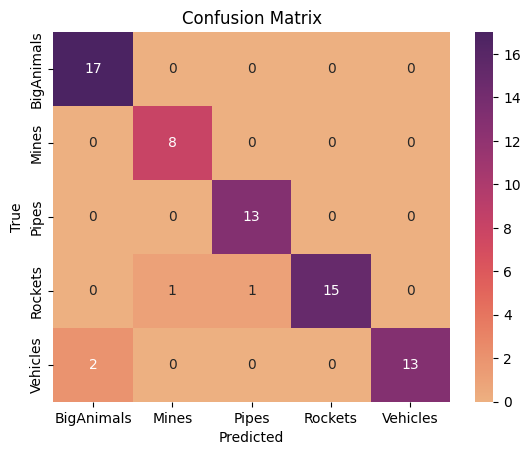

Testing: lr=0.0001, batch_size=32, optimizer=sgd, weight_decay=0.0, epochs=10
Epoch 1/10, Loss: 1.6247427728441026
Epoch 2/10, Loss: 1.5690473053190443
Epoch 3/10, Loss: 1.4987080494562786
Epoch 4/10, Loss: 1.4228506088256836
Epoch 5/10, Loss: 1.3731969462500677
Epoch 6/10, Loss: 1.3190460602442424
Epoch 7/10, Loss: 1.271958311398824
Epoch 8/10, Loss: 1.202214823828803
Epoch 9/10, Loss: 1.1766086684332953
Epoch 10/10, Loss: 1.1233985556496515
Accuracy: 74.29%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.92      0.71      0.80        17
       Mines       0.43      0.75      0.55         8
       Pipes       0.92      0.85      0.88        13
     Rockets       0.83      0.59      0.69        17
    Vehicles       0.68      0.87      0.76        15

    accuracy                           0.74        70
   macro avg       0.76      0.75      0.74        70
weighted avg       0.79      0.74      0.75        70



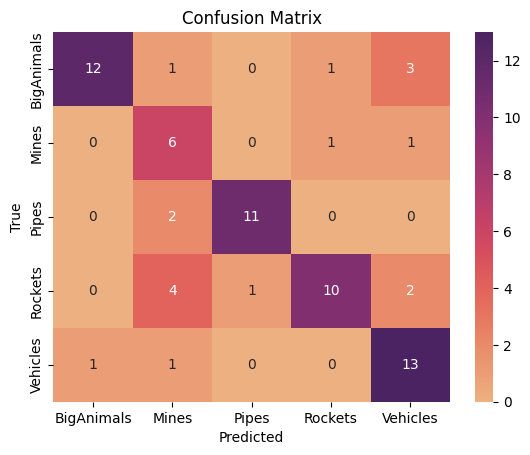

Testing: lr=0.0001, batch_size=32, optimizer=sgd, weight_decay=0.0, epochs=15
Epoch 1/15, Loss: 1.7040910985734727
Epoch 2/15, Loss: 1.5985421869489882
Epoch 3/15, Loss: 1.5133129490746393
Epoch 4/15, Loss: 1.4609816471735637
Epoch 5/15, Loss: 1.3929889334572687
Epoch 6/15, Loss: 1.3366343047883775
Epoch 7/15, Loss: 1.2833536598417494
Epoch 8/15, Loss: 1.2223118543624878
Epoch 9/15, Loss: 1.1876531309551663
Epoch 10/15, Loss: 1.1392405033111572
Epoch 11/15, Loss: 1.0952484342787001
Epoch 12/15, Loss: 1.0659026106198628
Epoch 13/15, Loss: 1.0206361081865098
Epoch 14/15, Loss: 0.9803018569946289
Epoch 15/15, Loss: 0.9533190263642205
Accuracy: 68.57%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.71      0.59      0.65        17
       Mines       0.46      0.75      0.57         8
       Pipes       0.80      0.92      0.86        13
     Rockets       0.83      0.59      0.69        17
    Vehicles       0.62      0.67      0.65      

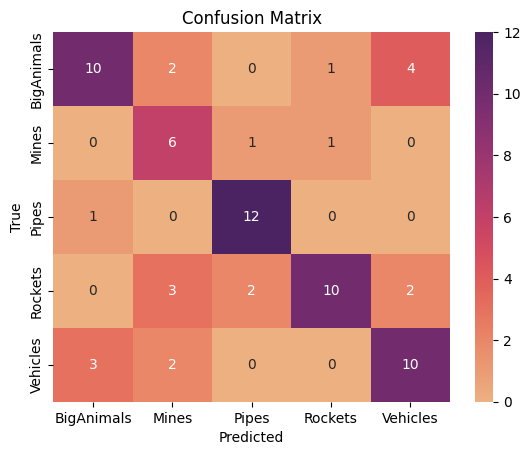

Testing: lr=0.0001, batch_size=32, optimizer=sgd, weight_decay=0.0, epochs=20
Epoch 1/20, Loss: 1.6472479237450495
Epoch 2/20, Loss: 1.5437765916188557
Epoch 3/20, Loss: 1.505691409111023
Epoch 4/20, Loss: 1.4372583760155573
Epoch 5/20, Loss: 1.3906385103861492
Epoch 6/20, Loss: 1.3336037397384644
Epoch 7/20, Loss: 1.2669487794240315
Epoch 8/20, Loss: 1.2044332689709134
Epoch 9/20, Loss: 1.1579011148876615
Epoch 10/20, Loss: 1.1051117314232721
Epoch 11/20, Loss: 1.0648645957310994
Epoch 12/20, Loss: 1.0162758496072557
Epoch 13/20, Loss: 0.9715019398265414
Epoch 14/20, Loss: 0.9418188598420885
Epoch 15/20, Loss: 0.8910964992311265
Epoch 16/20, Loss: 0.8642633888456557
Epoch 17/20, Loss: 0.8462595608499315
Epoch 18/20, Loss: 0.8243818349308438
Epoch 19/20, Loss: 0.7474739220407274
Epoch 20/20, Loss: 0.7405016687181261
Accuracy: 82.86%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.79      0.88      0.83        17
       Mines       0.5

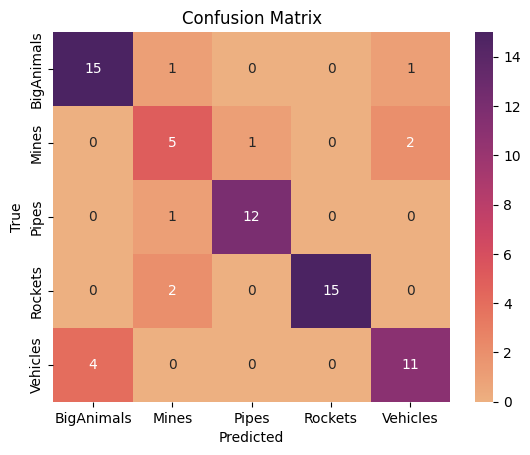

Testing: lr=0.0001, batch_size=32, optimizer=sgd, weight_decay=0.001, epochs=10
Epoch 1/10, Loss: 1.6026412910885282
Epoch 2/10, Loss: 1.5325526528888278
Epoch 3/10, Loss: 1.4475996361838446
Epoch 4/10, Loss: 1.3801322910520766
Epoch 5/10, Loss: 1.3200103441874187
Epoch 6/10, Loss: 1.2910950713687472
Epoch 7/10, Loss: 1.2192723486158583
Epoch 8/10, Loss: 1.1657869948281183
Epoch 9/10, Loss: 1.1212215953403049
Epoch 10/10, Loss: 1.0860146880149841
Accuracy: 62.86%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.71      0.59      0.65        17
       Mines       0.40      0.75      0.52         8
       Pipes       0.92      0.85      0.88        13
     Rockets       0.88      0.41      0.56        17
    Vehicles       0.48      0.67      0.56        15

    accuracy                           0.63        70
   macro avg       0.68      0.65      0.63        70
weighted avg       0.70      0.63      0.63        70



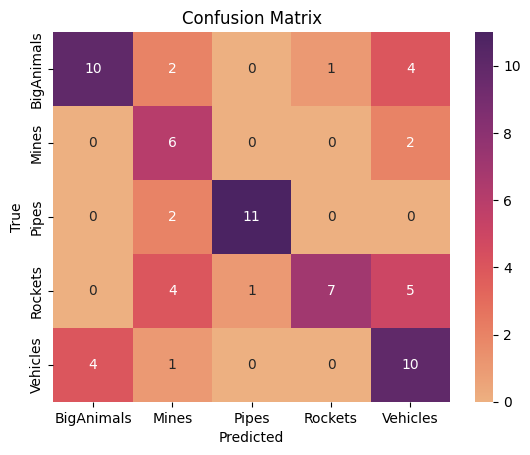

Testing: lr=0.0001, batch_size=32, optimizer=sgd, weight_decay=0.001, epochs=15
Epoch 1/15, Loss: 1.6432604392369587
Epoch 2/15, Loss: 1.5595515701505873
Epoch 3/15, Loss: 1.4844891097810533
Epoch 4/15, Loss: 1.421635217136807
Epoch 5/15, Loss: 1.3701999717288547
Epoch 6/15, Loss: 1.2894104056888156
Epoch 7/15, Loss: 1.2459502220153809
Epoch 8/15, Loss: 1.1970801220999823
Epoch 9/15, Loss: 1.131274660428365
Epoch 10/15, Loss: 1.0789550145467122
Epoch 11/15, Loss: 1.046715670161777
Epoch 12/15, Loss: 0.9910357594490051
Epoch 13/15, Loss: 0.9727486107084486
Epoch 14/15, Loss: 0.920877092414432
Epoch 15/15, Loss: 0.8762114842732748
Accuracy: 65.71%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.79      0.65      0.71        17
       Mines       0.43      0.38      0.40         8
       Pipes       0.76      1.00      0.87        13
     Rockets       0.88      0.41      0.56        17
    Vehicles       0.50      0.80      0.62        

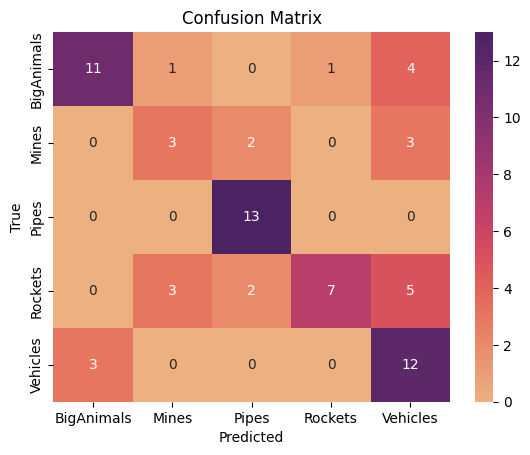

Testing: lr=0.0001, batch_size=32, optimizer=sgd, weight_decay=0.001, epochs=20
Epoch 1/20, Loss: 1.6273789803187053
Epoch 2/20, Loss: 1.566756288210551
Epoch 3/20, Loss: 1.494293040699429
Epoch 4/20, Loss: 1.432217730416192
Epoch 5/20, Loss: 1.3907456662919786
Epoch 6/20, Loss: 1.338343686527676
Epoch 7/20, Loss: 1.2790499263339572
Epoch 8/20, Loss: 1.252641823556688
Epoch 9/20, Loss: 1.1908202171325684
Epoch 10/20, Loss: 1.1421105331844754
Epoch 11/20, Loss: 1.0959294504589505
Epoch 12/20, Loss: 1.0404384202427335
Epoch 13/20, Loss: 0.9957522551218668
Epoch 14/20, Loss: 0.9651832977930704
Epoch 15/20, Loss: 0.9029151466157701
Epoch 16/20, Loss: 0.891844285859002
Epoch 17/20, Loss: 0.8529360095659891
Epoch 18/20, Loss: 0.7909148732821146
Epoch 19/20, Loss: 0.7497600780593024
Epoch 20/20, Loss: 0.717077632745107
Accuracy: 75.71%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.75      0.71      0.73        17
       Mines       0.57   

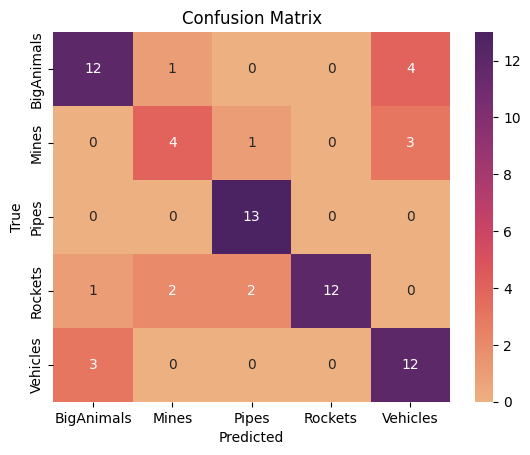

Testing: lr=0.0001, batch_size=32, optimizer=sgd, weight_decay=0.0001, epochs=10
Epoch 1/10, Loss: 1.6000687678654988
Epoch 2/10, Loss: 1.541465613577101
Epoch 3/10, Loss: 1.4928460386064317
Epoch 4/10, Loss: 1.4327727291319106
Epoch 5/10, Loss: 1.3584057357576158
Epoch 6/10, Loss: 1.3122397661209106
Epoch 7/10, Loss: 1.2534390820397272
Epoch 8/10, Loss: 1.2112221320470173
Epoch 9/10, Loss: 1.1582074562708538
Epoch 10/10, Loss: 1.1040521992577448
Accuracy: 64.29%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.71      0.59      0.65        17
       Mines       0.44      0.50      0.47         8
       Pipes       0.79      0.85      0.81        13
     Rockets       0.73      0.47      0.57        17
    Vehicles       0.55      0.80      0.65        15

    accuracy                           0.64        70
   macro avg       0.64      0.64      0.63        70
weighted avg       0.66      0.64      0.64        70



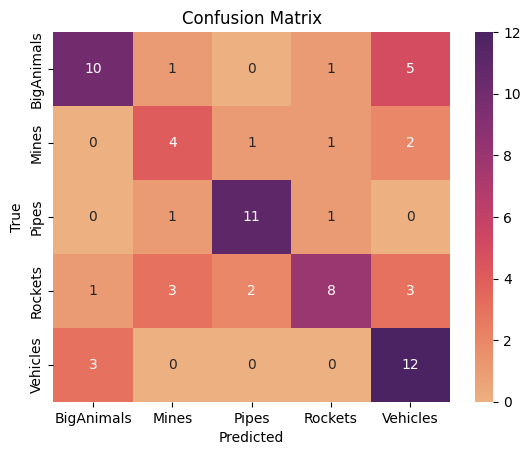

Testing: lr=0.0001, batch_size=32, optimizer=sgd, weight_decay=0.0001, epochs=15
Epoch 1/15, Loss: 1.6530228455861409
Epoch 2/15, Loss: 1.5951649612850614
Epoch 3/15, Loss: 1.5335137181811862
Epoch 4/15, Loss: 1.4771033657921686
Epoch 5/15, Loss: 1.4289904832839966
Epoch 6/15, Loss: 1.3621848159366183
Epoch 7/15, Loss: 1.3177683353424072
Epoch 8/15, Loss: 1.2607474724451702
Epoch 9/15, Loss: 1.2331628534528944
Epoch 10/15, Loss: 1.157821814219157
Epoch 11/15, Loss: 1.1198339859644573
Epoch 12/15, Loss: 1.0833863483534918
Epoch 13/15, Loss: 1.029360055923462
Epoch 14/15, Loss: 1.006853289074368
Epoch 15/15, Loss: 0.973872595363193
Accuracy: 75.71%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.72      0.76      0.74        17
       Mines       0.67      0.75      0.71         8
       Pipes       0.92      0.92      0.92        13
     Rockets       1.00      0.59      0.74        17
    Vehicles       0.60      0.80      0.69       

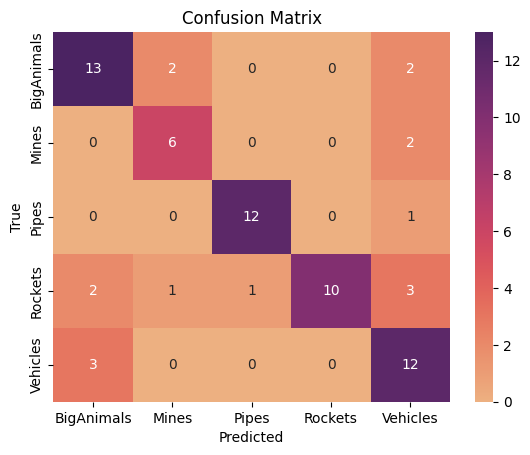

Testing: lr=0.0001, batch_size=32, optimizer=sgd, weight_decay=0.0001, epochs=20
Epoch 1/20, Loss: 1.6701947848002117
Epoch 2/20, Loss: 1.6123020516501532
Epoch 3/20, Loss: 1.5499120288425021
Epoch 4/20, Loss: 1.4829705556233723
Epoch 5/20, Loss: 1.43061359723409
Epoch 6/20, Loss: 1.360355536142985
Epoch 7/20, Loss: 1.3064641820059881
Epoch 8/20, Loss: 1.2494899829228718
Epoch 9/20, Loss: 1.2094343370861478
Epoch 10/20, Loss: 1.1597043408287897
Epoch 11/20, Loss: 1.1246636576122708
Epoch 12/20, Loss: 1.0756236844592624
Epoch 13/20, Loss: 1.0406399303012424
Epoch 14/20, Loss: 1.0160833795865376
Epoch 15/20, Loss: 0.9693177474869622
Epoch 16/20, Loss: 0.9186462495062087
Epoch 17/20, Loss: 0.8834318319956461
Epoch 18/20, Loss: 0.8491042719946967
Epoch 19/20, Loss: 0.811068488491906
Epoch 20/20, Loss: 0.7920839985211691
Accuracy: 77.14%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.78      0.82      0.80        17
       Mines       0.6

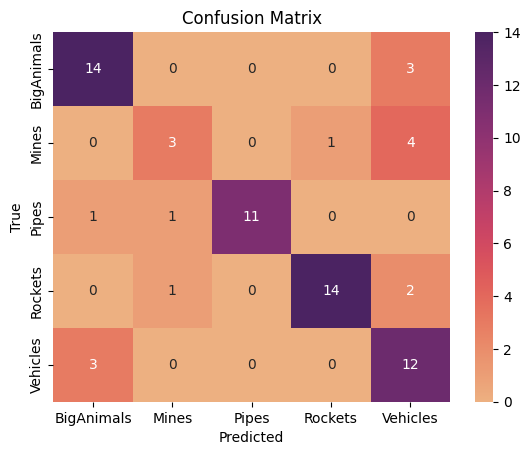

Testing: lr=0.0001, batch_size=32, optimizer=rmsprop, weight_decay=0.0, epochs=10
Epoch 1/10, Loss: 1.1201081408394709
Epoch 2/10, Loss: 0.32732898493607837
Epoch 3/10, Loss: 0.08277574015988244
Epoch 4/10, Loss: 0.03636773448023531
Epoch 5/10, Loss: 0.026614718346132174
Epoch 6/10, Loss: 0.023876446920136612
Epoch 7/10, Loss: 0.01824492055715786
Epoch 8/10, Loss: 0.011442544352677133
Epoch 9/10, Loss: 0.008307131317754587
Epoch 10/10, Loss: 0.009112077558206188
Accuracy: 95.71%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.94      0.94      0.94        17
       Mines       1.00      0.88      0.93         8
       Pipes       0.93      1.00      0.96        13
     Rockets       1.00      0.94      0.97        17
    Vehicles       0.94      1.00      0.97        15

    accuracy                           0.96        70
   macro avg       0.96      0.95      0.95        70
weighted avg       0.96      0.96      0.96        70



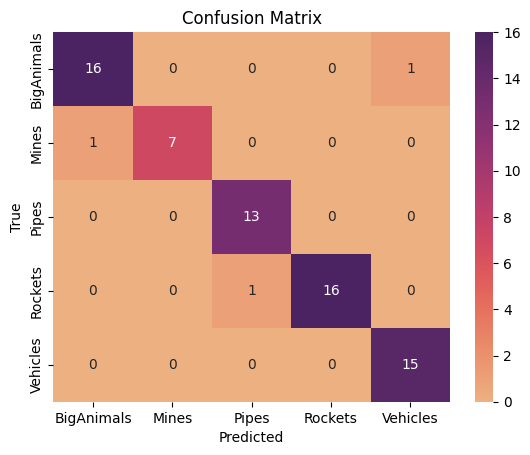

Testing: lr=0.0001, batch_size=32, optimizer=rmsprop, weight_decay=0.0, epochs=15
Epoch 1/15, Loss: 1.19912897878223
Epoch 2/15, Loss: 0.34511465165350175
Epoch 3/15, Loss: 0.11173796364002758
Epoch 4/15, Loss: 0.0523064328978459
Epoch 5/15, Loss: 0.028509604848093457
Epoch 6/15, Loss: 0.020377899727059737
Epoch 7/15, Loss: 0.019906593383186393
Epoch 8/15, Loss: 0.01463464657879538
Epoch 9/15, Loss: 0.01244716046171056
Epoch 10/15, Loss: 0.010943024522728391
Epoch 11/15, Loss: 0.010265539348539379
Epoch 12/15, Loss: 0.008845683627037538
Epoch 13/15, Loss: 0.008673676496578587
Epoch 14/15, Loss: 0.008794251570685042
Epoch 15/15, Loss: 0.008549196826707985
Accuracy: 95.71%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.94      1.00      0.97        17
       Mines       0.89      1.00      0.94         8
       Pipes       0.93      1.00      0.96        13
     Rockets       1.00      0.88      0.94        17
    Vehicles       1.00  

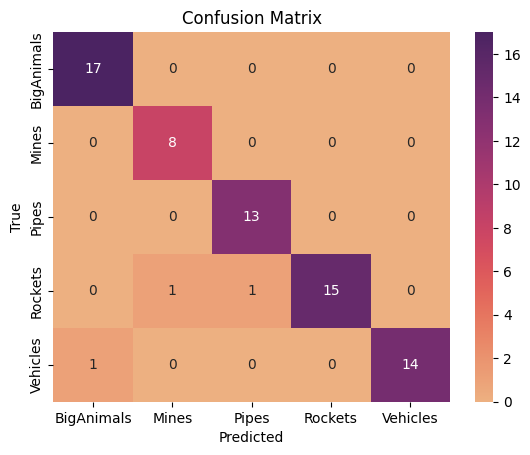

Testing: lr=0.0001, batch_size=32, optimizer=rmsprop, weight_decay=0.0, epochs=20
Epoch 1/20, Loss: 1.199521780014038
Epoch 2/20, Loss: 0.29200609359476304
Epoch 3/20, Loss: 0.1070963508552975
Epoch 4/20, Loss: 0.053091221385531955
Epoch 5/20, Loss: 0.0394976105954912
Epoch 6/20, Loss: 0.02679758694850736
Epoch 7/20, Loss: 0.017618881745470896
Epoch 8/20, Loss: 0.01441425426552693
Epoch 9/20, Loss: 0.01250700316288405
Epoch 10/20, Loss: 0.010551291983574629
Epoch 11/20, Loss: 0.008804776447100772
Epoch 12/20, Loss: 0.006722849535031451
Epoch 13/20, Loss: 0.00747125318998264
Epoch 14/20, Loss: 0.006396773297132717
Epoch 15/20, Loss: 0.005292143543354339
Epoch 16/20, Loss: 0.004404410409430663
Epoch 17/20, Loss: 0.005565807921811938
Epoch 18/20, Loss: 0.005302529445745879
Epoch 19/20, Loss: 0.016035709323154554
Epoch 20/20, Loss: 0.09982529655098915
Accuracy: 84.29%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       1.00      0.71      0.83 

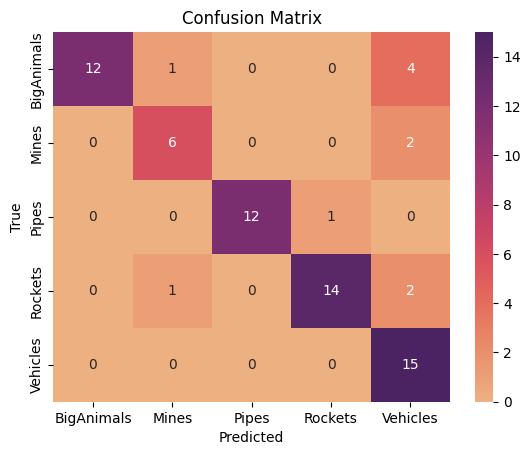

Testing: lr=0.0001, batch_size=32, optimizer=rmsprop, weight_decay=0.001, epochs=10
Epoch 1/10, Loss: 1.122416893641154
Epoch 2/10, Loss: 0.3396924336751302
Epoch 3/10, Loss: 0.10864013681809108
Epoch 4/10, Loss: 0.04094639275636938
Epoch 5/10, Loss: 0.03733984153303835
Epoch 6/10, Loss: 0.025287356538077194
Epoch 7/10, Loss: 0.016183220367464755
Epoch 8/10, Loss: 0.012277537853353553
Epoch 9/10, Loss: 0.015065416176286008
Epoch 10/10, Loss: 0.009534240027682649
Accuracy: 97.14%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       1.00      0.94      0.97        17
       Mines       0.89      1.00      0.94         8
       Pipes       0.93      1.00      0.96        13
     Rockets       1.00      0.94      0.97        17
    Vehicles       1.00      1.00      1.00        15

    accuracy                           0.97        70
   macro avg       0.96      0.98      0.97        70
weighted avg       0.97      0.97      0.97        70



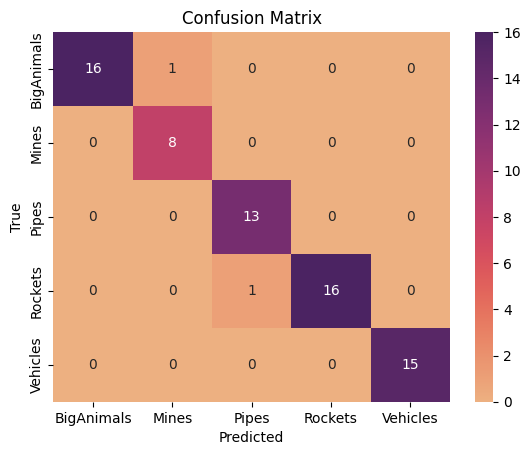

Testing: lr=0.0001, batch_size=32, optimizer=rmsprop, weight_decay=0.001, epochs=15
Epoch 1/15, Loss: 1.1848347451951768
Epoch 2/15, Loss: 0.2861367579963472
Epoch 3/15, Loss: 0.07361611806684071
Epoch 4/15, Loss: 0.04632100752658314
Epoch 5/15, Loss: 0.025363031774759293
Epoch 6/15, Loss: 0.02119239450742801
Epoch 7/15, Loss: 0.01741343333075444
Epoch 8/15, Loss: 0.015045229552520646
Epoch 9/15, Loss: 0.00955106390433179
Epoch 10/15, Loss: 0.009994516511344247
Epoch 11/15, Loss: 0.007943732146587636
Epoch 12/15, Loss: 0.008127856327013837
Epoch 13/15, Loss: 0.009304275684472587
Epoch 14/15, Loss: 0.005353337024442024
Epoch 15/15, Loss: 0.0056179591661526095
Accuracy: 91.43%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       1.00      0.94      0.97        17
       Mines       0.88      0.88      0.88         8
       Pipes       0.87      1.00      0.93        13
     Rockets       0.94      0.88      0.91        17
    Vehicles       0.

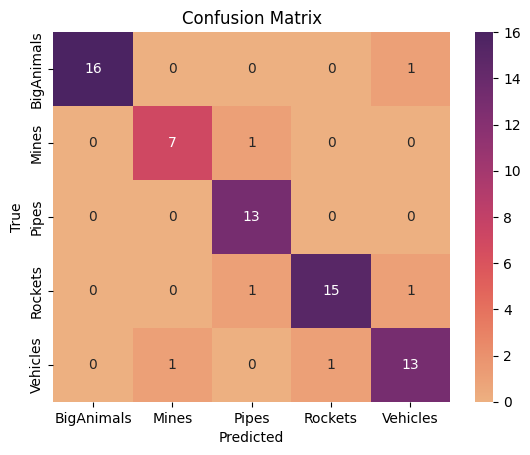

Testing: lr=0.0001, batch_size=32, optimizer=rmsprop, weight_decay=0.001, epochs=20
Epoch 1/20, Loss: 1.1751573549376593
Epoch 2/20, Loss: 0.3227911608086692
Epoch 3/20, Loss: 0.09559320782621701
Epoch 4/20, Loss: 0.04847017447981569
Epoch 5/20, Loss: 0.028225671499967575
Epoch 6/20, Loss: 0.054209162584609456
Epoch 7/20, Loss: 0.0205866281564037
Epoch 8/20, Loss: 0.015256705797380872
Epoch 9/20, Loss: 0.016264032986429002
Epoch 10/20, Loss: 0.012235298028422726
Epoch 11/20, Loss: 0.012113259691331122
Epoch 12/20, Loss: 0.008070565139253935
Epoch 13/20, Loss: 0.006360563035640452
Epoch 14/20, Loss: 0.006601156847965386
Epoch 15/20, Loss: 0.004336277799059947
Epoch 16/20, Loss: 0.008518047268605895
Epoch 17/20, Loss: 0.007841680638699068
Epoch 18/20, Loss: 0.004881034863905774
Epoch 19/20, Loss: 0.004466966234354509
Epoch 20/20, Loss: 0.015100881224498153
Accuracy: 94.29%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.94      1.00    

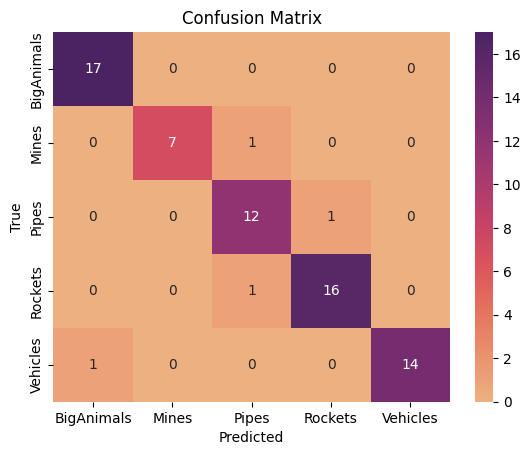

Testing: lr=0.0001, batch_size=32, optimizer=rmsprop, weight_decay=0.0001, epochs=10
Epoch 1/10, Loss: 1.1328630844751995
Epoch 2/10, Loss: 0.33968471652931637
Epoch 3/10, Loss: 0.15481729474332598
Epoch 4/10, Loss: 0.08487574714753363
Epoch 5/10, Loss: 0.03845544118020269
Epoch 6/10, Loss: 0.02976623001611895
Epoch 7/10, Loss: 0.046456652589970164
Epoch 8/10, Loss: 0.013908052040884892
Epoch 9/10, Loss: 0.012728545245611005
Epoch 10/10, Loss: 0.010889369735701216
Accuracy: 92.86%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.85      1.00      0.92        17
       Mines       0.88      0.88      0.88         8
       Pipes       1.00      1.00      1.00        13
     Rockets       1.00      0.94      0.97        17
    Vehicles       0.92      0.80      0.86        15

    accuracy                           0.93        70
   macro avg       0.93      0.92      0.92        70
weighted avg       0.93      0.93      0.93        70



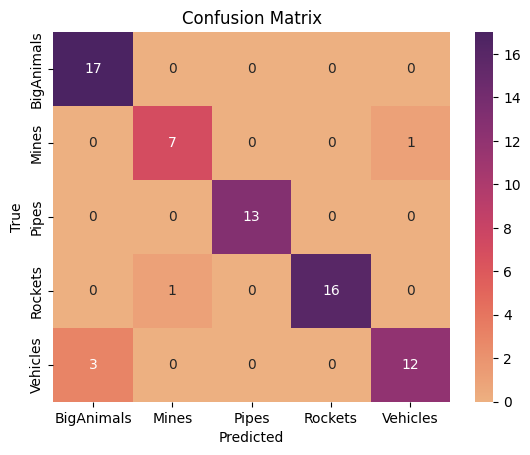

Testing: lr=0.0001, batch_size=32, optimizer=rmsprop, weight_decay=0.0001, epochs=15
Epoch 1/15, Loss: 1.1106480558713276
Epoch 2/15, Loss: 0.34588465094566345
Epoch 3/15, Loss: 0.10145063781076008
Epoch 4/15, Loss: 0.04388448782265186
Epoch 5/15, Loss: 0.028733440157439973
Epoch 6/15, Loss: 0.018735798489716318
Epoch 7/15, Loss: 0.013175636012521055
Epoch 8/15, Loss: 0.014316624703092707
Epoch 9/15, Loss: 0.011338096681154437
Epoch 10/15, Loss: 0.00729398662224412
Epoch 11/15, Loss: 0.007889249801842703
Epoch 12/15, Loss: 0.012484814350803694
Epoch 13/15, Loss: 0.011703748437058594
Epoch 14/15, Loss: 0.008506185737335019
Epoch 15/15, Loss: 0.004674790996230311
Accuracy: 92.86%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       1.00      0.88      0.94        17
       Mines       0.88      0.88      0.88         8
       Pipes       0.87      1.00      0.93        13
     Rockets       1.00      0.88      0.94        17
    Vehicles      

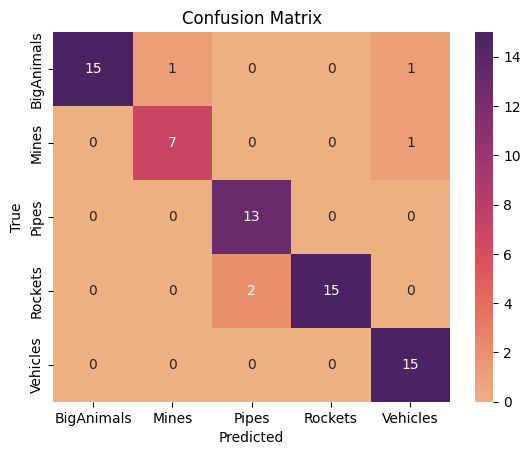

Testing: lr=0.0001, batch_size=32, optimizer=rmsprop, weight_decay=0.0001, epochs=20
Epoch 1/20, Loss: 1.1400015221701727
Epoch 2/20, Loss: 0.341175463464525
Epoch 3/20, Loss: 0.0847456231713295
Epoch 4/20, Loss: 0.06934773466653293
Epoch 5/20, Loss: 0.030540969222784042
Epoch 6/20, Loss: 0.01672048970229096
Epoch 7/20, Loss: 0.02324397603256835
Epoch 8/20, Loss: 0.011167203334884511
Epoch 9/20, Loss: 0.011305050510499213
Epoch 10/20, Loss: 0.015220255746195713
Epoch 11/20, Loss: 0.006956172072225147
Epoch 12/20, Loss: 0.0079624079581764
Epoch 13/20, Loss: 0.0067319783847779036
Epoch 14/20, Loss: 0.004611497615567512
Epoch 15/20, Loss: 0.004438714253612691
Epoch 16/20, Loss: 0.005758950046987997
Epoch 17/20, Loss: 0.0034917559629927077
Epoch 18/20, Loss: 0.003788516287588411
Epoch 19/20, Loss: 0.006669273457696868
Epoch 20/20, Loss: 0.03694742152260409
Accuracy: 90.00%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.93      0.82      

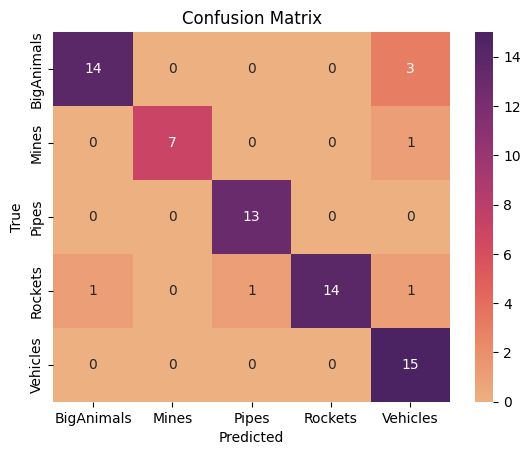

Testing: lr=0.0005, batch_size=16, optimizer=adam, weight_decay=0.0, epochs=10
Epoch 1/10, Loss: 1.1804386956824198
Epoch 2/10, Loss: 0.49957010750141406
Epoch 3/10, Loss: 0.3193854292233785
Epoch 4/10, Loss: 0.20238565281033516
Epoch 5/10, Loss: 0.11530570375422637
Epoch 6/10, Loss: 0.06926991656008694
Epoch 7/10, Loss: 0.10161383243070708
Epoch 8/10, Loss: 0.1376069768642386
Epoch 9/10, Loss: 0.17830972259657252
Epoch 10/10, Loss: 0.1501826737076044
Accuracy: 81.43%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.79      0.88      0.83        17
       Mines       0.54      0.88      0.67         8
       Pipes       1.00      0.92      0.96        13
     Rockets       1.00      0.76      0.87        17
    Vehicles       0.77      0.67      0.71        15

    accuracy                           0.81        70
   macro avg       0.82      0.82      0.81        70
weighted avg       0.85      0.81      0.82        70



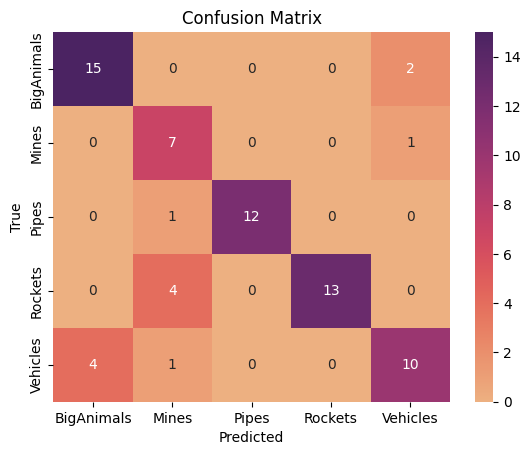

Testing: lr=0.0005, batch_size=16, optimizer=adam, weight_decay=0.0, epochs=15
Epoch 1/15, Loss: 1.1009620626767476
Epoch 2/15, Loss: 0.47382108204894596
Epoch 3/15, Loss: 0.3386295677887069
Epoch 4/15, Loss: 0.19624712442358336
Epoch 5/15, Loss: 0.1656517090482844
Epoch 6/15, Loss: 0.15878857247945335
Epoch 7/15, Loss: 0.0926753813918266
Epoch 8/15, Loss: 0.04724666403813495
Epoch 9/15, Loss: 0.043876691410938896
Epoch 10/15, Loss: 0.04794333904929873
Epoch 11/15, Loss: 0.06550485413107607
Epoch 12/15, Loss: 0.0793189696657161
Epoch 13/15, Loss: 0.13780475469926992
Epoch 14/15, Loss: 0.2678521221710576
Epoch 15/15, Loss: 0.19671046382023227
Accuracy: 87.14%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.73      0.94      0.82        17
       Mines       0.83      0.62      0.71         8
       Pipes       1.00      0.92      0.96        13
     Rockets       0.94      0.94      0.94        17
    Vehicles       0.92      0.80     

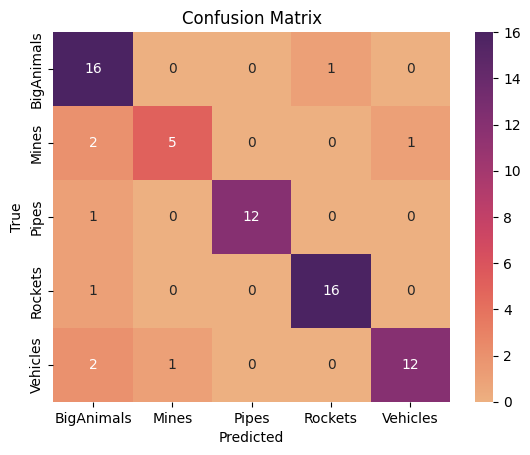

Testing: lr=0.0005, batch_size=16, optimizer=adam, weight_decay=0.0, epochs=20
Epoch 1/20, Loss: 1.1477709296676848
Epoch 2/20, Loss: 0.42058772842089337
Epoch 3/20, Loss: 0.3513743184092972
Epoch 4/20, Loss: 0.3721688071058856
Epoch 5/20, Loss: 0.20495089350475204
Epoch 6/20, Loss: 0.1388553772121668
Epoch 7/20, Loss: 0.07684876930175556
Epoch 8/20, Loss: 0.08425674639228317
Epoch 9/20, Loss: 0.0809740883608659
Epoch 10/20, Loss: 0.0654852651577029
Epoch 11/20, Loss: 0.11051396746188402
Epoch 12/20, Loss: 0.11907337678389417
Epoch 13/20, Loss: 0.14895962132140994
Epoch 14/20, Loss: 0.10740461081473364
Epoch 15/20, Loss: 0.11197953800567323
Epoch 16/20, Loss: 0.11949668064092596
Epoch 17/20, Loss: 0.10373996198177338
Epoch 18/20, Loss: 0.05707319774147537
Epoch 19/20, Loss: 0.033710113597205944
Epoch 20/20, Loss: 0.015977319129483983
Accuracy: 92.86%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.94      0.94      0.94        17
    

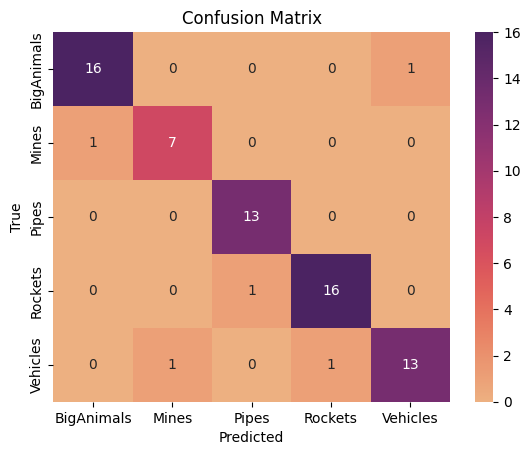

Testing: lr=0.0005, batch_size=16, optimizer=adam, weight_decay=0.001, epochs=10
Epoch 1/10, Loss: 1.0808717244201236
Epoch 2/10, Loss: 0.30149100555313957
Epoch 3/10, Loss: 0.1250394597235653
Epoch 4/10, Loss: 0.18826886483778557
Epoch 5/10, Loss: 0.19125555724733406
Epoch 6/10, Loss: 0.19587141316797999
Epoch 7/10, Loss: 0.2949846691141526
Epoch 8/10, Loss: 0.13223436081575024
Epoch 9/10, Loss: 0.1504391429738866
Epoch 10/10, Loss: 0.15950498005582225
Accuracy: 90.00%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.88      0.82      0.85        17
       Mines       1.00      1.00      1.00         8
       Pipes       0.93      1.00      0.96        13
     Rockets       0.84      0.94      0.89        17
    Vehicles       0.92      0.80      0.86        15

    accuracy                           0.90        70
   macro avg       0.91      0.91      0.91        70
weighted avg       0.90      0.90      0.90        70



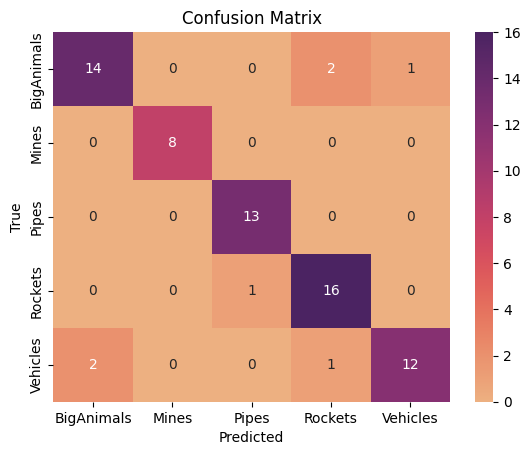

Testing: lr=0.0005, batch_size=16, optimizer=adam, weight_decay=0.001, epochs=15
Epoch 1/15, Loss: 1.0244331177737978
Epoch 2/15, Loss: 0.33305612620380187
Epoch 3/15, Loss: 0.2627003813783328
Epoch 4/15, Loss: 0.21885438077151775
Epoch 5/15, Loss: 0.13440425083455113
Epoch 6/15, Loss: 0.20195494302444988
Epoch 7/15, Loss: 0.16250928460309902
Epoch 8/15, Loss: 0.17972366801566547
Epoch 9/15, Loss: 0.10923635442223814
Epoch 10/15, Loss: 0.13302759624396762
Epoch 11/15, Loss: 0.20804305302186143
Epoch 12/15, Loss: 0.10609981345219745
Epoch 13/15, Loss: 0.13563255608702698
Epoch 14/15, Loss: 0.1151749847146372
Epoch 15/15, Loss: 0.18312233220785856
Accuracy: 82.86%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       1.00      0.65      0.79        17
       Mines       0.67      1.00      0.80         8
       Pipes       1.00      0.85      0.92        13
     Rockets       1.00      0.82      0.90        17
    Vehicles       0.64      0.93 

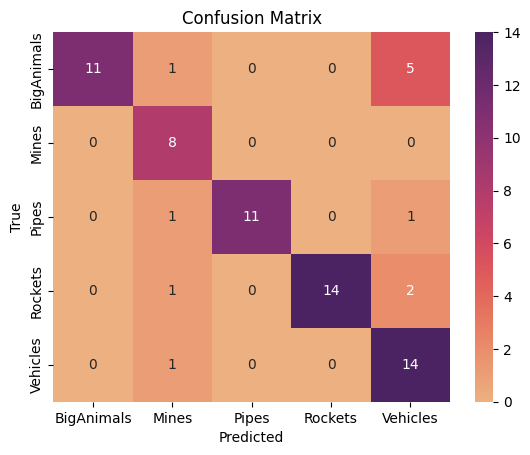

Testing: lr=0.0005, batch_size=16, optimizer=adam, weight_decay=0.001, epochs=20
Epoch 1/20, Loss: 1.2616225911511316
Epoch 2/20, Loss: 0.4311361403928863
Epoch 3/20, Loss: 0.2703473638329241
Epoch 4/20, Loss: 0.2990420113007228
Epoch 5/20, Loss: 0.2836279682815075
Epoch 6/20, Loss: 0.14065136574208736
Epoch 7/20, Loss: 0.18661393349369368
Epoch 8/20, Loss: 0.13224221020936966
Epoch 9/20, Loss: 0.16955367558532292
Epoch 10/20, Loss: 0.11723509213576715
Epoch 11/20, Loss: 0.10051328673337896
Epoch 12/20, Loss: 0.2474339478649199
Epoch 13/20, Loss: 0.12656341472433674
Epoch 14/20, Loss: 0.1599378331253926
Epoch 15/20, Loss: 0.14927377841538852
Epoch 16/20, Loss: 0.20932453425808084
Epoch 17/20, Loss: 0.10578522613892953
Epoch 18/20, Loss: 0.05976939035786523
Epoch 19/20, Loss: 0.02685375974720551
Epoch 20/20, Loss: 0.01219991529877815
Accuracy: 91.43%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.94      0.88      0.91        17
     

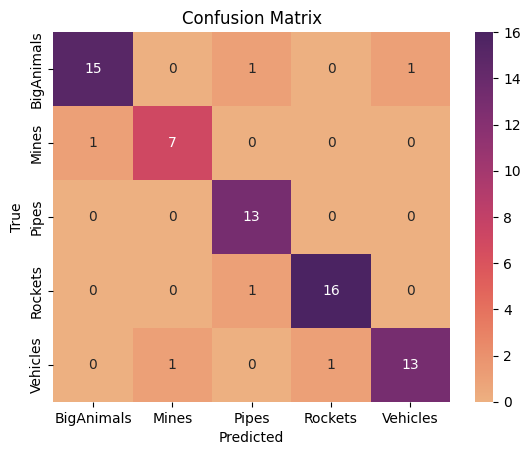

Testing: lr=0.0005, batch_size=16, optimizer=adam, weight_decay=0.0001, epochs=10
Epoch 1/10, Loss: 1.20277135570844
Epoch 2/10, Loss: 0.5736945908930566
Epoch 3/10, Loss: 0.37995899510052467
Epoch 4/10, Loss: 0.29588942312532
Epoch 5/10, Loss: 0.16585219009882873
Epoch 6/10, Loss: 0.24352205358445644
Epoch 7/10, Loss: 0.18060602247714996
Epoch 8/10, Loss: 0.12785740424361494
Epoch 9/10, Loss: 0.08819707519271308
Epoch 10/10, Loss: 0.1304221941779057
Accuracy: 82.86%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.85      0.65      0.73        17
       Mines       0.62      1.00      0.76         8
       Pipes       1.00      1.00      1.00        13
     Rockets       0.93      0.82      0.88        17
    Vehicles       0.75      0.80      0.77        15

    accuracy                           0.83        70
   macro avg       0.83      0.85      0.83        70
weighted avg       0.85      0.83      0.83        70



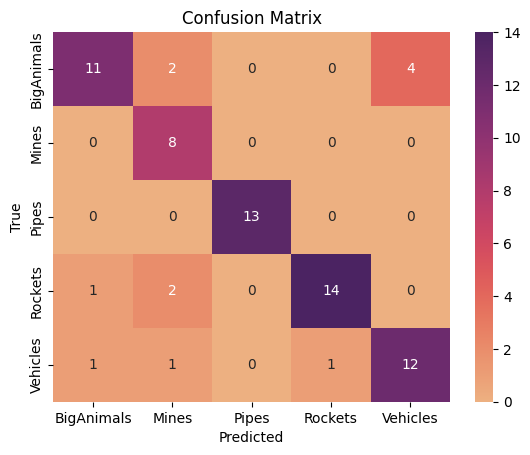

Testing: lr=0.0005, batch_size=16, optimizer=adam, weight_decay=0.0001, epochs=15
Epoch 1/15, Loss: 1.2142345011234283
Epoch 2/15, Loss: 0.46815166622400284
Epoch 3/15, Loss: 0.3245969381597307
Epoch 4/15, Loss: 0.15095315852926838
Epoch 5/15, Loss: 0.2028130425347222
Epoch 6/15, Loss: 0.16048851298789182
Epoch 7/15, Loss: 0.20126601639721128
Epoch 8/15, Loss: 0.11651321076270607
Epoch 9/15, Loss: 0.08549639598156016
Epoch 10/15, Loss: 0.04009066765300102
Epoch 11/15, Loss: 0.050618260736680694
Epoch 12/15, Loss: 0.0800940575492051
Epoch 13/15, Loss: 0.11014366496561302
Epoch 14/15, Loss: 0.12795353261753917
Epoch 15/15, Loss: 0.14077292387891147
Accuracy: 90.00%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       1.00      0.76      0.87        17
       Mines       0.88      0.88      0.88         8
       Pipes       0.93      1.00      0.96        13
     Rockets       0.94      0.94      0.94        17
    Vehicles       0.78      0.93

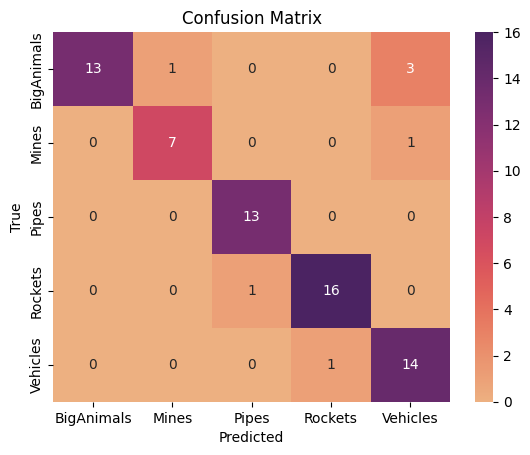

Testing: lr=0.0005, batch_size=16, optimizer=adam, weight_decay=0.0001, epochs=20
Epoch 1/20, Loss: 1.0614171458615198
Epoch 2/20, Loss: 0.3906584506233533
Epoch 3/20, Loss: 0.224005160232385
Epoch 4/20, Loss: 0.25593139107028645
Epoch 5/20, Loss: 0.15709703374240133
Epoch 6/20, Loss: 0.16009908495470881
Epoch 7/20, Loss: 0.18769730399880144
Epoch 8/20, Loss: 0.19811754539195034
Epoch 9/20, Loss: 0.13006517104804516
Epoch 10/20, Loss: 0.1880952294708954
Epoch 11/20, Loss: 0.18431894610532457
Epoch 12/20, Loss: 0.13929158211168316
Epoch 13/20, Loss: 0.07202912442800072
Epoch 14/20, Loss: 0.04296667165019446
Epoch 15/20, Loss: 0.048104302957654
Epoch 16/20, Loss: 0.10368988468932609
Epoch 17/20, Loss: 0.13260691136949593
Epoch 18/20, Loss: 0.17774869830140638
Epoch 19/20, Loss: 0.1557050934061408
Epoch 20/20, Loss: 0.20698564261611965
Accuracy: 81.43%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       1.00      0.53      0.69        17
     

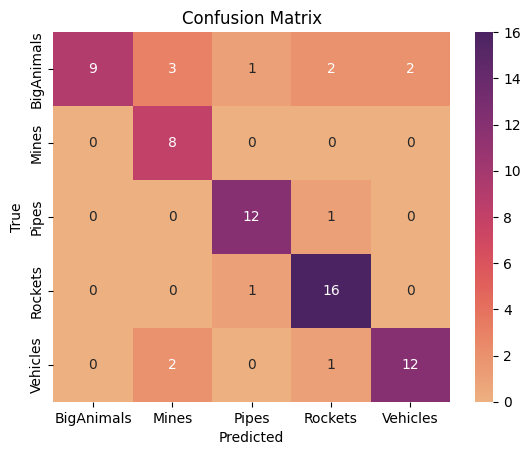

Testing: lr=0.0005, batch_size=16, optimizer=sgd, weight_decay=0.0, epochs=10
Epoch 1/10, Loss: 1.6634285979800754
Epoch 2/10, Loss: 1.3606803152296278
Epoch 3/10, Loss: 1.0891751713222928
Epoch 4/10, Loss: 0.8044343094031016
Epoch 5/10, Loss: 0.6302268041504754
Epoch 6/10, Loss: 0.4259104116095437
Epoch 7/10, Loss: 0.3629685151908133
Epoch 8/10, Loss: 0.2810703491171201
Epoch 9/10, Loss: 0.20274442392918798
Epoch 10/10, Loss: 0.162908845477634
Accuracy: 91.43%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.85      1.00      0.92        17
       Mines       0.89      1.00      0.94         8
       Pipes       0.87      1.00      0.93        13
     Rockets       1.00      0.88      0.94        17
    Vehicles       1.00      0.73      0.85        15

    accuracy                           0.91        70
   macro avg       0.92      0.92      0.91        70
weighted avg       0.93      0.91      0.91        70



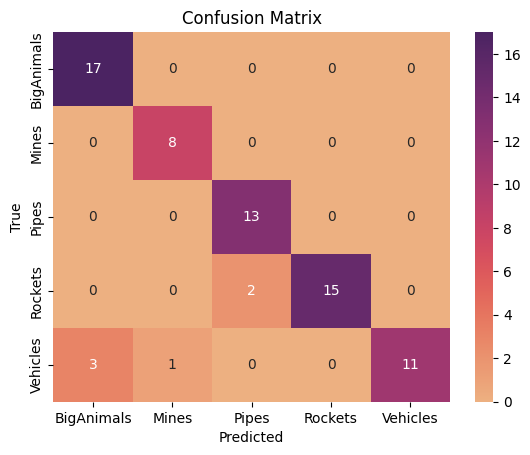

Testing: lr=0.0005, batch_size=16, optimizer=sgd, weight_decay=0.0, epochs=15
Epoch 1/15, Loss: 1.6037053399615817
Epoch 2/15, Loss: 1.3476797342300415
Epoch 3/15, Loss: 1.0324464208549924
Epoch 4/15, Loss: 0.7437240249580808
Epoch 5/15, Loss: 0.5735205544365777
Epoch 6/15, Loss: 0.45270833041932845
Epoch 7/15, Loss: 0.32321426024039585
Epoch 8/15, Loss: 0.2771875229146745
Epoch 9/15, Loss: 0.1932699924541844
Epoch 10/15, Loss: 0.17009939874211946
Epoch 11/15, Loss: 0.1326609773354398
Epoch 12/15, Loss: 0.09790751131044494
Epoch 13/15, Loss: 0.0928676018698348
Epoch 14/15, Loss: 0.07005122345354822
Epoch 15/15, Loss: 0.052921719952589936
Accuracy: 88.57%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.83      0.88      0.86        17
       Mines       0.86      0.75      0.80         8
       Pipes       0.87      1.00      0.93        13
     Rockets       1.00      0.88      0.94        17
    Vehicles       0.87      0.87      0.8

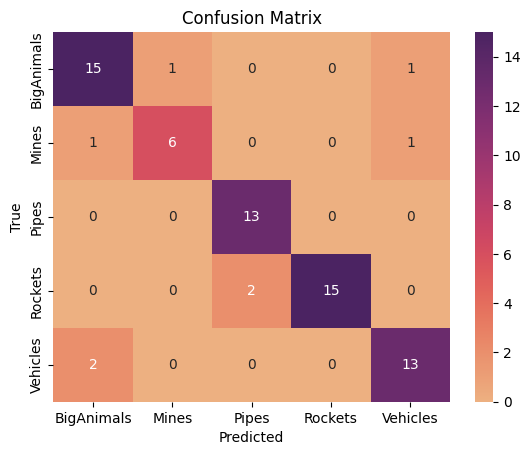

Testing: lr=0.0005, batch_size=16, optimizer=sgd, weight_decay=0.0, epochs=20
Epoch 1/20, Loss: 1.5793777638011508
Epoch 2/20, Loss: 1.2839375072055392
Epoch 3/20, Loss: 0.9646143648359511
Epoch 4/20, Loss: 0.697651313410865
Epoch 5/20, Loss: 0.5391823500394821
Epoch 6/20, Loss: 0.3875533582435714
Epoch 7/20, Loss: 0.2846747214595477
Epoch 8/20, Loss: 0.21274983096453878
Epoch 9/20, Loss: 0.14696911639637417
Epoch 10/20, Loss: 0.15447971431745422
Epoch 11/20, Loss: 0.11920600011944771
Epoch 12/20, Loss: 0.0801758702016539
Epoch 13/20, Loss: 0.07581505510542128
Epoch 14/20, Loss: 0.0645712645103534
Epoch 15/20, Loss: 0.05376669164333078
Epoch 16/20, Loss: 0.05258835883190235
Epoch 17/20, Loss: 0.046148938540783196
Epoch 18/20, Loss: 0.051387916370812387
Epoch 19/20, Loss: 0.03854556231656008
Epoch 20/20, Loss: 0.0529119980831941
Accuracy: 90.00%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.83      0.88      0.86        17
       Min

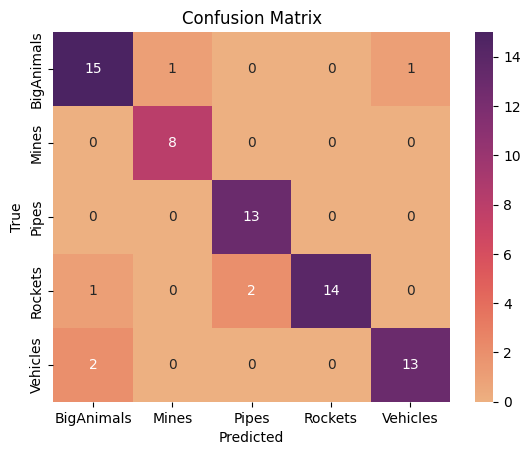

Testing: lr=0.0005, batch_size=16, optimizer=sgd, weight_decay=0.001, epochs=10
Epoch 1/10, Loss: 1.601649522781372
Epoch 2/10, Loss: 1.3562307688925002
Epoch 3/10, Loss: 1.0585297014978197
Epoch 4/10, Loss: 0.8487087885538737
Epoch 5/10, Loss: 0.5904115637143453
Epoch 6/10, Loss: 0.4546080579360326
Epoch 7/10, Loss: 0.3355012784401576
Epoch 8/10, Loss: 0.2547587864100933
Epoch 9/10, Loss: 0.18892847042944697
Epoch 10/10, Loss: 0.17994065168831083
Accuracy: 87.14%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.78      0.82      0.80        17
       Mines       0.88      0.88      0.88         8
       Pipes       0.87      1.00      0.93        13
     Rockets       1.00      0.94      0.97        17
    Vehicles       0.85      0.73      0.79        15

    accuracy                           0.87        70
   macro avg       0.87      0.87      0.87        70
weighted avg       0.87      0.87      0.87        70



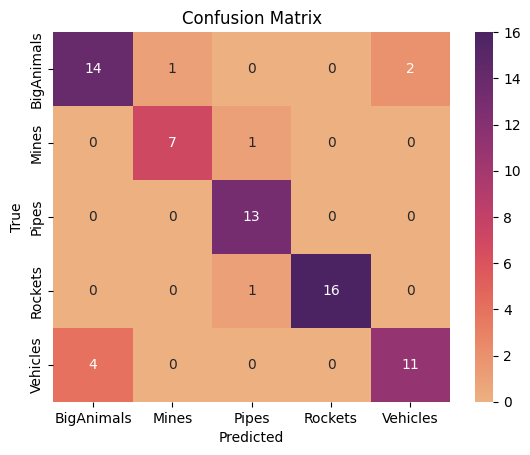

Testing: lr=0.0005, batch_size=16, optimizer=sgd, weight_decay=0.001, epochs=15
Epoch 1/15, Loss: 1.6427225867907207
Epoch 2/15, Loss: 1.332911491394043
Epoch 3/15, Loss: 1.072189191977183
Epoch 4/15, Loss: 0.7728405363029904
Epoch 5/15, Loss: 0.567683658666081
Epoch 6/15, Loss: 0.36952191011773217
Epoch 7/15, Loss: 0.2949271346959803
Epoch 8/15, Loss: 0.21417826041579247
Epoch 9/15, Loss: 0.13871461691127884
Epoch 10/15, Loss: 0.13983133683602014
Epoch 11/15, Loss: 0.11058485445876916
Epoch 12/15, Loss: 0.085668477954136
Epoch 13/15, Loss: 0.07389387498713201
Epoch 14/15, Loss: 0.04944197181612253
Epoch 15/15, Loss: 0.06315986315409343
Accuracy: 91.43%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.88      0.88      0.88        17
       Mines       0.89      1.00      0.94         8
       Pipes       0.93      1.00      0.96        13
     Rockets       0.94      0.94      0.94        17
    Vehicles       0.92      0.80      0.86

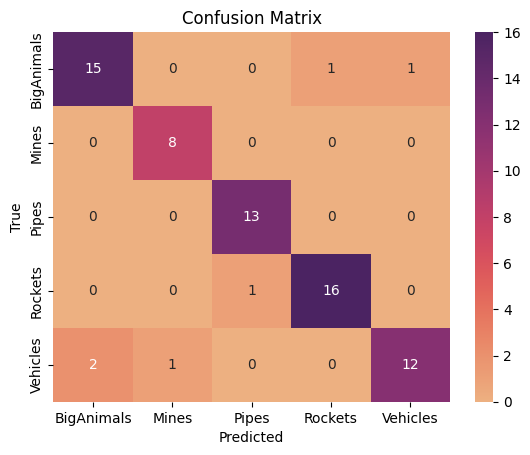

Testing: lr=0.0005, batch_size=16, optimizer=sgd, weight_decay=0.001, epochs=20
Epoch 1/20, Loss: 1.6166681912210252
Epoch 2/20, Loss: 1.3326528867085774
Epoch 3/20, Loss: 1.0633905993567572
Epoch 4/20, Loss: 0.7606715659300486
Epoch 5/20, Loss: 0.5921809126933416
Epoch 6/20, Loss: 0.4199279397726059
Epoch 7/20, Loss: 0.3263650859395663
Epoch 8/20, Loss: 0.24379971250891685
Epoch 9/20, Loss: 0.19314321875572205
Epoch 10/20, Loss: 0.18210137469900978
Epoch 11/20, Loss: 0.1147320605814457
Epoch 12/20, Loss: 0.12477381755080488
Epoch 13/20, Loss: 0.0890652367638217
Epoch 14/20, Loss: 0.1009584546296133
Epoch 15/20, Loss: 0.09868599226077397
Epoch 16/20, Loss: 0.07259033382352856
Epoch 17/20, Loss: 0.06807866878807545
Epoch 18/20, Loss: 0.06551518529239628
Epoch 19/20, Loss: 0.031207623115430277
Epoch 20/20, Loss: 0.03729059060828553
Accuracy: 88.57%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.94      0.88      0.91        17
       M

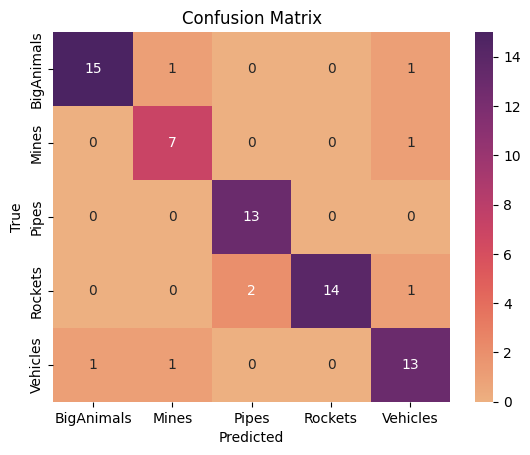

Testing: lr=0.0005, batch_size=16, optimizer=sgd, weight_decay=0.0001, epochs=10
Epoch 1/10, Loss: 1.5376549031999376
Epoch 2/10, Loss: 1.3098533484670851
Epoch 3/10, Loss: 0.9982585575845506
Epoch 4/10, Loss: 0.741548650794559
Epoch 5/10, Loss: 0.5255449149343703
Epoch 6/10, Loss: 0.36433910661273533
Epoch 7/10, Loss: 0.2697509742445416
Epoch 8/10, Loss: 0.20927709713578224
Epoch 9/10, Loss: 0.14249079301953316
Epoch 10/10, Loss: 0.13008147416015467
Accuracy: 87.14%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.79      0.88      0.83        17
       Mines       0.88      0.88      0.88         8
       Pipes       0.87      1.00      0.93        13
     Rockets       1.00      0.82      0.90        17
    Vehicles       0.86      0.80      0.83        15

    accuracy                           0.87        70
   macro avg       0.88      0.88      0.87        70
weighted avg       0.88      0.87      0.87        70



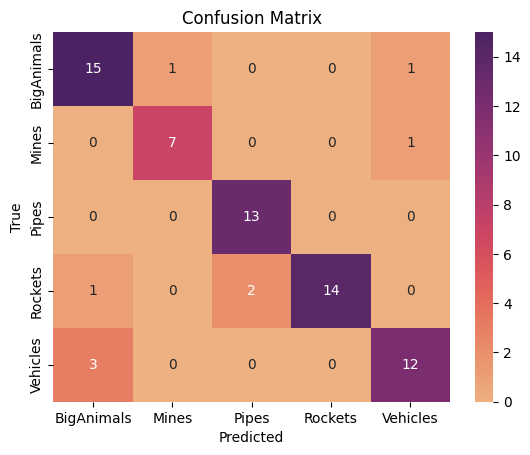

Testing: lr=0.0005, batch_size=16, optimizer=sgd, weight_decay=0.0001, epochs=15
Epoch 1/15, Loss: 1.574551569090949
Epoch 2/15, Loss: 1.3010000023576949
Epoch 3/15, Loss: 0.972509053018358
Epoch 4/15, Loss: 0.7322537865903642
Epoch 5/15, Loss: 0.48542453679773545
Epoch 6/15, Loss: 0.3369259246521526
Epoch 7/15, Loss: 0.26089657594760257
Epoch 8/15, Loss: 0.23439816054370669
Epoch 9/15, Loss: 0.16720258899860913
Epoch 10/15, Loss: 0.10227104524771373
Epoch 11/15, Loss: 0.11958768611980809
Epoch 12/15, Loss: 0.1024380727774567
Epoch 13/15, Loss: 0.09844819228682253
Epoch 14/15, Loss: 0.055650138606627784
Epoch 15/15, Loss: 0.042908603222005896
Accuracy: 87.14%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.88      0.88      0.88        17
       Mines       0.89      1.00      0.94         8
       Pipes       0.81      1.00      0.90        13
     Rockets       0.93      0.82      0.88        17
    Vehicles       0.85      0.73    

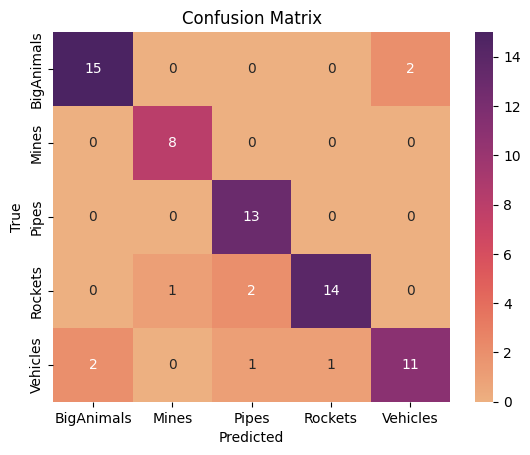

Testing: lr=0.0005, batch_size=16, optimizer=sgd, weight_decay=0.0001, epochs=20
Epoch 1/20, Loss: 1.61532238456938
Epoch 2/20, Loss: 1.3271953993373447
Epoch 3/20, Loss: 1.0472068621052637
Epoch 4/20, Loss: 0.7958624992105696
Epoch 5/20, Loss: 0.6048828330304887
Epoch 6/20, Loss: 0.40733037806219524
Epoch 7/20, Loss: 0.3107590898871422
Epoch 8/20, Loss: 0.24760623690154818
Epoch 9/20, Loss: 0.202452984948953
Epoch 10/20, Loss: 0.1547060828242037
Epoch 11/20, Loss: 0.1506482060584757
Epoch 12/20, Loss: 0.08982777460995647
Epoch 13/20, Loss: 0.09679209668603209
Epoch 14/20, Loss: 0.09534252745409806
Epoch 15/20, Loss: 0.0676403156378203
Epoch 16/20, Loss: 0.05261002087758647
Epoch 17/20, Loss: 0.07567526006864177
Epoch 18/20, Loss: 0.0430138964826862
Epoch 19/20, Loss: 0.045663898810744286
Epoch 20/20, Loss: 0.06333345324835843
Accuracy: 90.00%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.76      0.94      0.84        17
       Mine

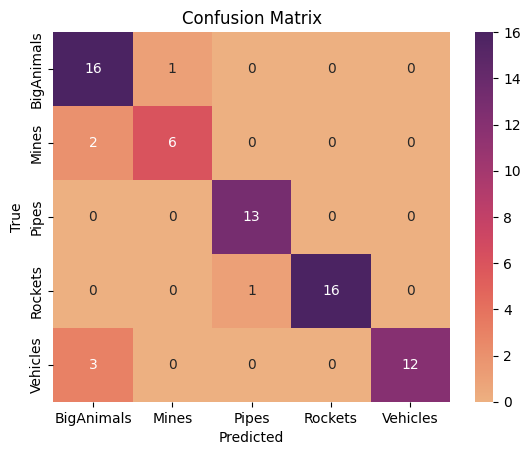

Testing: lr=0.0005, batch_size=16, optimizer=rmsprop, weight_decay=0.0, epochs=10
Epoch 1/10, Loss: 1.8081743452284071
Epoch 2/10, Loss: 1.2388263377878401
Epoch 3/10, Loss: 1.1299617853429582
Epoch 4/10, Loss: 0.8935767031378217
Epoch 5/10, Loss: 0.7796215464671453
Epoch 6/10, Loss: 0.7110109287831519
Epoch 7/10, Loss: 0.5957814223236508
Epoch 8/10, Loss: 0.4668033570051193
Epoch 9/10, Loss: 0.5638887294464641
Epoch 10/10, Loss: 0.3389456810222732
Accuracy: 41.43%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       1.00      0.18      0.30        17
       Mines       0.19      0.75      0.31         8
       Pipes       1.00      0.00      0.00        13
     Rockets       0.52      0.94      0.67        17
    Vehicles       0.80      0.27      0.40        15

    accuracy                           0.41        70
   macro avg       0.70      0.43      0.33        70
weighted avg       0.75      0.41      0.36        70



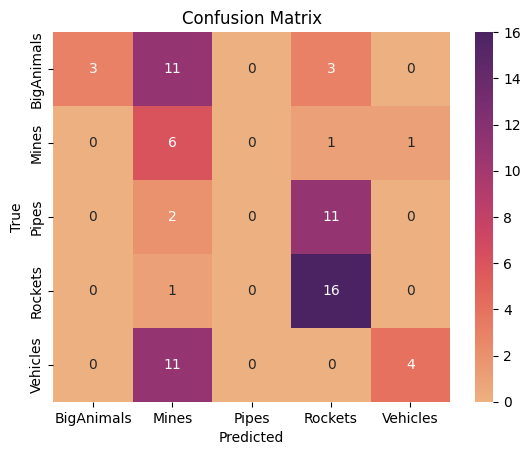

Testing: lr=0.0005, batch_size=16, optimizer=rmsprop, weight_decay=0.0, epochs=15
Epoch 1/15, Loss: 1.878177437517378
Epoch 2/15, Loss: 1.3361683554119534
Epoch 3/15, Loss: 1.1374445292684767
Epoch 4/15, Loss: 1.0456335975064173
Epoch 5/15, Loss: 0.9042230910725064
Epoch 6/15, Loss: 0.7359105977747176
Epoch 7/15, Loss: 0.5397481007708443
Epoch 8/15, Loss: 0.4580591461724705
Epoch 9/15, Loss: 0.4190916207929452
Epoch 10/15, Loss: 0.41271456703543663
Epoch 11/15, Loss: 0.2660694726639324
Epoch 12/15, Loss: 0.3958019127862321
Epoch 13/15, Loss: 0.20549284397727913
Epoch 14/15, Loss: 0.49571692943573
Epoch 15/15, Loss: 0.316990674369865
Accuracy: 82.86%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.79      0.88      0.83        17
       Mines       0.83      0.62      0.71         8
       Pipes       0.92      0.92      0.92        13
     Rockets       0.81      1.00      0.89        17
    Vehicles       0.82      0.60      0.69    

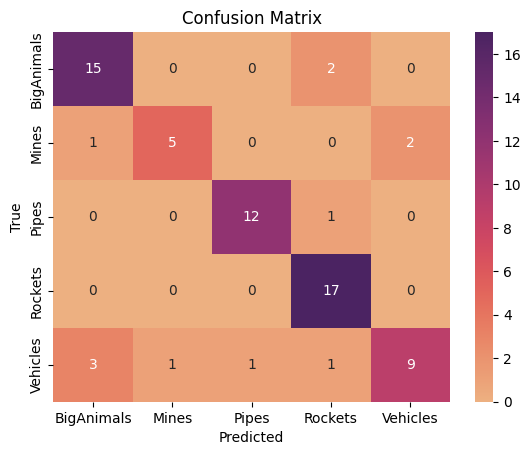

Testing: lr=0.0005, batch_size=16, optimizer=rmsprop, weight_decay=0.0, epochs=20
Epoch 1/20, Loss: 1.8075844976637099
Epoch 2/20, Loss: 1.235147582160102
Epoch 3/20, Loss: 1.1147422360049353
Epoch 4/20, Loss: 0.9090562529034085
Epoch 5/20, Loss: 0.8467433253924052
Epoch 6/20, Loss: 0.732050844364696
Epoch 7/20, Loss: 0.6084663487142987
Epoch 8/20, Loss: 0.5378930295507113
Epoch 9/20, Loss: 0.41088831838634277
Epoch 10/20, Loss: 0.5222526921166314
Epoch 11/20, Loss: 0.4265139748652776
Epoch 12/20, Loss: 0.32271769187516636
Epoch 13/20, Loss: 0.2711028926488426
Epoch 14/20, Loss: 0.3027159368826283
Epoch 15/20, Loss: 0.18785439079834354
Epoch 16/20, Loss: 0.2324935802155071
Epoch 17/20, Loss: 0.19447106412715381
Epoch 18/20, Loss: 0.3475243765860796
Epoch 19/20, Loss: 0.20810608814160028
Epoch 20/20, Loss: 0.17663732108970484
Accuracy: 90.00%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.89      0.94      0.91        17
       Mines 

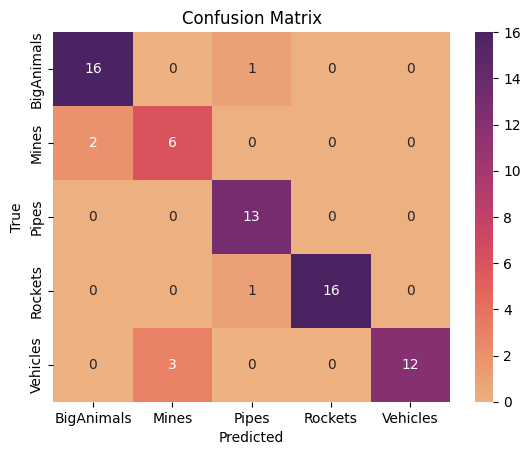

Testing: lr=0.0005, batch_size=16, optimizer=rmsprop, weight_decay=0.001, epochs=10
Epoch 1/10, Loss: 1.8189471628930833
Epoch 2/10, Loss: 1.4174523949623108
Epoch 3/10, Loss: 1.2822129494614072
Epoch 4/10, Loss: 1.0999448067612119
Epoch 5/10, Loss: 0.9726927843358781
Epoch 6/10, Loss: 0.7508224580023024
Epoch 7/10, Loss: 0.760803265704049
Epoch 8/10, Loss: 0.5896597339047326
Epoch 9/10, Loss: 0.5934908125135634
Epoch 10/10, Loss: 0.3761645323700375
Accuracy: 72.86%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.80      0.47      0.59        17
       Mines       0.45      0.62      0.53         8
       Pipes       0.92      0.92      0.92        13
     Rockets       0.84      0.94      0.89        17
    Vehicles       0.59      0.67      0.62        15

    accuracy                           0.73        70
   macro avg       0.72      0.73      0.71        70
weighted avg       0.75      0.73      0.73        70



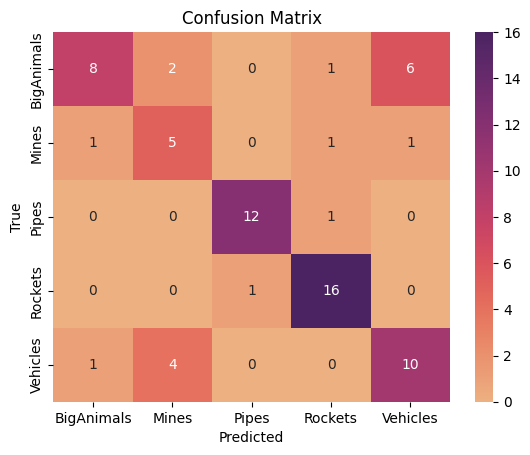

Testing: lr=0.0005, batch_size=16, optimizer=rmsprop, weight_decay=0.001, epochs=15
Epoch 1/15, Loss: 1.844489230049981
Epoch 2/15, Loss: 1.4569157229529486
Epoch 3/15, Loss: 1.1510318848821852
Epoch 4/15, Loss: 1.0131162140104506
Epoch 5/15, Loss: 0.9521313574579027
Epoch 6/15, Loss: 0.7382877618074417
Epoch 7/15, Loss: 0.6765824026531644
Epoch 8/15, Loss: 0.6469107617934545
Epoch 9/15, Loss: 0.4318908883465661
Epoch 10/15, Loss: 0.4724133031235801
Epoch 11/15, Loss: 0.7181580025288794
Epoch 12/15, Loss: 0.3821530230343342
Epoch 13/15, Loss: 0.42078838621576625
Epoch 14/15, Loss: 0.4202757105231285
Epoch 15/15, Loss: 0.25650122575461864
Accuracy: 30.00%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       1.00      0.12      0.21        17
       Mines       0.14      1.00      0.25         8
       Pipes       1.00      0.08      0.14        13
     Rockets       1.00      0.12      0.21        17
    Vehicles       1.00      0.53      0.7

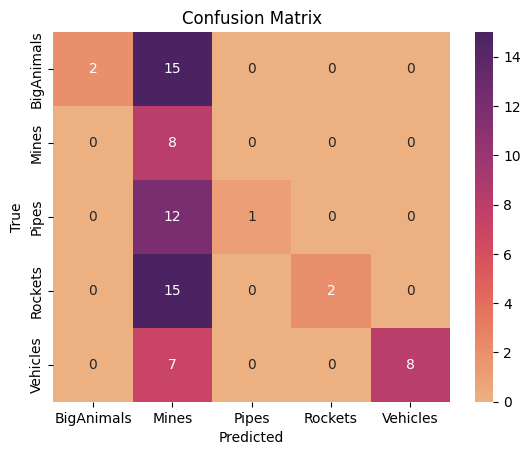

Testing: lr=0.0005, batch_size=16, optimizer=rmsprop, weight_decay=0.001, epochs=20
Epoch 1/20, Loss: 1.8423496550983853
Epoch 2/20, Loss: 1.402407043510013
Epoch 3/20, Loss: 1.3021149900224473
Epoch 4/20, Loss: 1.106801923778322
Epoch 5/20, Loss: 1.0292058851983812
Epoch 6/20, Loss: 0.8613303071922727
Epoch 7/20, Loss: 0.8596065607335832
Epoch 8/20, Loss: 0.7900571359528435
Epoch 9/20, Loss: 0.8234968235095342
Epoch 10/20, Loss: 0.7140360532535447
Epoch 11/20, Loss: 0.5346953943371773
Epoch 12/20, Loss: 0.47842811627520454
Epoch 13/20, Loss: 0.3298792880442407
Epoch 14/20, Loss: 0.33290139337380725
Epoch 15/20, Loss: 0.3067790375401576
Epoch 16/20, Loss: 0.34119784873392844
Epoch 17/20, Loss: 0.21364600459734598
Epoch 18/20, Loss: 0.21269076565901437
Epoch 19/20, Loss: 0.2977084815502167
Epoch 20/20, Loss: 0.3338592097991043
Accuracy: 65.71%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.63      0.71      0.67        17
       Mines

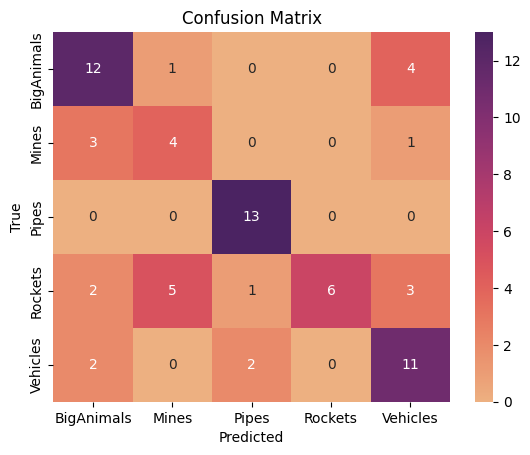

Testing: lr=0.0005, batch_size=16, optimizer=rmsprop, weight_decay=0.0001, epochs=10
Epoch 1/10, Loss: 1.8908526632520888
Epoch 2/10, Loss: 1.291602869828542
Epoch 3/10, Loss: 1.1806683109866247
Epoch 4/10, Loss: 0.925804164674547
Epoch 5/10, Loss: 0.7788732846577963
Epoch 6/10, Loss: 0.8111847754981782
Epoch 7/10, Loss: 0.6921247243881226
Epoch 8/10, Loss: 0.7742950552039676
Epoch 9/10, Loss: 0.4305635955598619
Epoch 10/10, Loss: 0.36641844113667804
Accuracy: 82.86%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       1.00      0.53      0.69        17
       Mines       0.86      0.75      0.80         8
       Pipes       1.00      0.92      0.96        13
     Rockets       0.89      1.00      0.94        17
    Vehicles       0.61      0.93      0.74        15

    accuracy                           0.83        70
   macro avg       0.87      0.83      0.83        70
weighted avg       0.87      0.83      0.83        70



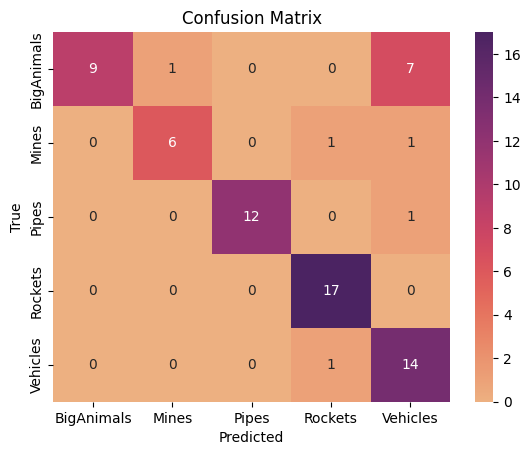

Testing: lr=0.0005, batch_size=16, optimizer=rmsprop, weight_decay=0.0001, epochs=15
Epoch 1/15, Loss: 1.757916722032759
Epoch 2/15, Loss: 1.4343609544965956
Epoch 3/15, Loss: 1.1221220592657726
Epoch 4/15, Loss: 0.99054244822926
Epoch 5/15, Loss: 0.8128718021843169
Epoch 6/15, Loss: 0.6722543934981028
Epoch 7/15, Loss: 0.633248969912529
Epoch 8/15, Loss: 0.6633459991878934
Epoch 9/15, Loss: 0.4525378909375932
Epoch 10/15, Loss: 0.3229605178866122
Epoch 11/15, Loss: 0.35059968671864933
Epoch 12/15, Loss: 0.2779400265879101
Epoch 13/15, Loss: 0.14936276980572277
Epoch 14/15, Loss: 0.15683166630980042
Epoch 15/15, Loss: 0.44499744526627993
Accuracy: 88.57%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       1.00      0.82      0.90        17
       Mines       1.00      0.88      0.93         8
       Pipes       0.92      0.85      0.88        13
     Rockets       0.80      0.94      0.86        17
    Vehicles       0.82      0.93      0.8

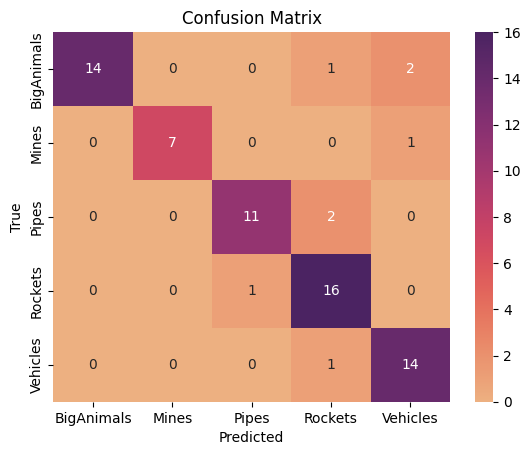

Testing: lr=0.0005, batch_size=16, optimizer=rmsprop, weight_decay=0.0001, epochs=20
Epoch 1/20, Loss: 1.9099785817994013
Epoch 2/20, Loss: 1.4189353220992618
Epoch 3/20, Loss: 1.151601407263014
Epoch 4/20, Loss: 1.0897805127832625
Epoch 5/20, Loss: 1.0156982408629522
Epoch 6/20, Loss: 0.7925397505362829
Epoch 7/20, Loss: 0.6196379148297839
Epoch 8/20, Loss: 0.6101341297229131
Epoch 9/20, Loss: 0.5482565454310842
Epoch 10/20, Loss: 0.4584046196606424
Epoch 11/20, Loss: 0.40582846684588325
Epoch 12/20, Loss: 0.4187544344200028
Epoch 13/20, Loss: 0.3256472787923283
Epoch 14/20, Loss: 0.22394727046291033
Epoch 15/20, Loss: 0.189843382479416
Epoch 16/20, Loss: 0.23015864483184284
Epoch 17/20, Loss: 0.27145380133555996
Epoch 18/20, Loss: 0.2630242995089955
Epoch 19/20, Loss: 0.20331971378376087
Epoch 20/20, Loss: 0.22369471171663868
Accuracy: 74.29%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.52      1.00      0.68        17
       Min

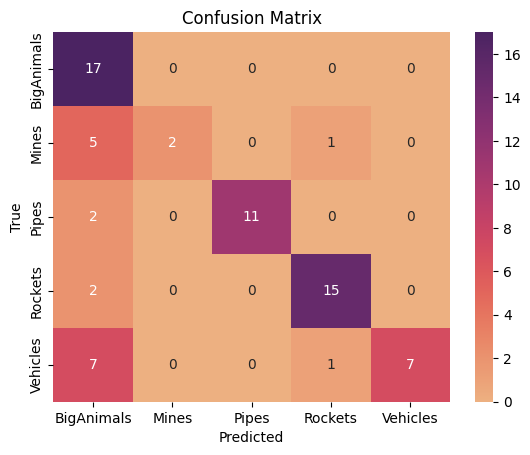

Testing: lr=0.0005, batch_size=32, optimizer=adam, weight_decay=0.0, epochs=10
Epoch 1/10, Loss: 1.207733107937707
Epoch 2/10, Loss: 0.41433648268381756
Epoch 3/10, Loss: 0.17030833744340473
Epoch 4/10, Loss: 0.06279465080135399
Epoch 5/10, Loss: 0.03789346396095223
Epoch 6/10, Loss: 0.023360936385062005
Epoch 7/10, Loss: 0.028676944888300367
Epoch 8/10, Loss: 0.0376454529662927
Epoch 9/10, Loss: 0.048299542576488524
Epoch 10/10, Loss: 0.02973960003712111
Accuracy: 90.00%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.82      0.82      0.82        17
       Mines       0.89      1.00      0.94         8
       Pipes       1.00      1.00      1.00        13
     Rockets       1.00      0.94      0.97        17
    Vehicles       0.80      0.80      0.80        15

    accuracy                           0.90        70
   macro avg       0.90      0.91      0.91        70
weighted avg       0.90      0.90      0.90        70



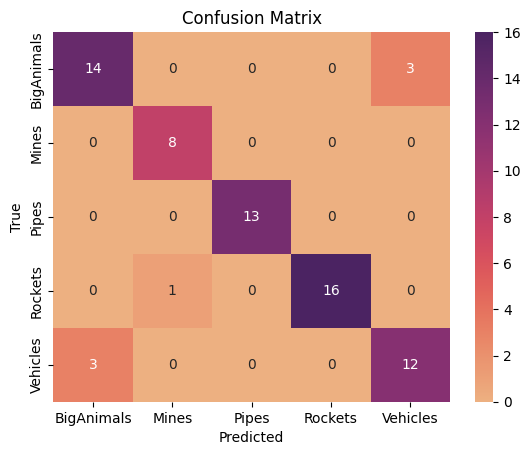

Testing: lr=0.0005, batch_size=32, optimizer=adam, weight_decay=0.0, epochs=15
Epoch 1/15, Loss: 1.2434906429714627
Epoch 2/15, Loss: 0.33813565307193333
Epoch 3/15, Loss: 0.15487982167137992
Epoch 4/15, Loss: 0.07984962500631809
Epoch 5/15, Loss: 0.07683028818832503
Epoch 6/15, Loss: 0.031204790394339297
Epoch 7/15, Loss: 0.018170812788108986
Epoch 8/15, Loss: 0.06699052742785877
Epoch 9/15, Loss: 0.06321519075168504
Epoch 10/15, Loss: 0.07428645704769427
Epoch 11/15, Loss: 0.09692111839022902
Epoch 12/15, Loss: 0.051407900638878345
Epoch 13/15, Loss: 0.06832483183178636
Epoch 14/15, Loss: 0.1045913544173042
Epoch 15/15, Loss: 0.1068234605093797
Accuracy: 84.29%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       1.00      0.65      0.79        17
       Mines       0.44      1.00      0.62         8
       Pipes       0.93      1.00      0.96        13
     Rockets       1.00      0.94      0.97        17
    Vehicles       1.00      0.73

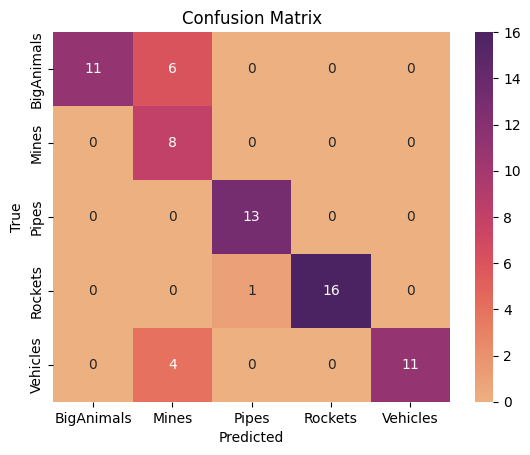

Testing: lr=0.0005, batch_size=32, optimizer=adam, weight_decay=0.0, epochs=20
Epoch 1/20, Loss: 1.166503495640225
Epoch 2/20, Loss: 0.40615514914194745
Epoch 3/20, Loss: 0.11181966960430145
Epoch 4/20, Loss: 0.06401973693735069
Epoch 5/20, Loss: 0.03748808035420047
Epoch 6/20, Loss: 0.024636044166982174
Epoch 7/20, Loss: 0.024926181209997997
Epoch 8/20, Loss: 0.01056915744104319
Epoch 9/20, Loss: 0.010034132878192596
Epoch 10/20, Loss: 0.017243065069326095
Epoch 11/20, Loss: 0.010393886619971858
Epoch 12/20, Loss: 0.017766752952916756
Epoch 13/20, Loss: 0.02778381657683187
Epoch 14/20, Loss: 0.061309144418272704
Epoch 15/20, Loss: 0.10995160177763966
Epoch 16/20, Loss: 0.20644378082619774
Epoch 17/20, Loss: 0.1973023157980707
Epoch 18/20, Loss: 0.1441718132959472
Epoch 19/20, Loss: 0.13417797701226342
Epoch 20/20, Loss: 0.0753844500415855
Accuracy: 87.14%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.94      0.88      0.91        1

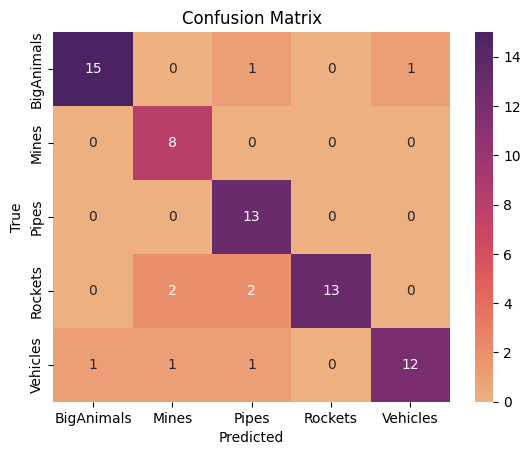

Testing: lr=0.0005, batch_size=32, optimizer=adam, weight_decay=0.001, epochs=10
Epoch 1/10, Loss: 1.1991490059428744
Epoch 2/10, Loss: 0.36358042226897347
Epoch 3/10, Loss: 0.17109907335705227
Epoch 4/10, Loss: 0.10649899683064884
Epoch 5/10, Loss: 0.05988391778535313
Epoch 6/10, Loss: 0.06637396114981836
Epoch 7/10, Loss: 0.03631576709449291
Epoch 8/10, Loss: 0.017817153905828793
Epoch 9/10, Loss: 0.009305183517022265
Epoch 10/10, Loss: 0.005716351895696587
Accuracy: 91.43%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       1.00      0.76      0.87        17
       Mines       0.88      0.88      0.88         8
       Pipes       0.87      1.00      0.93        13
     Rockets       0.94      0.94      0.94        17
    Vehicles       0.88      1.00      0.94        15

    accuracy                           0.91        70
   macro avg       0.91      0.92      0.91        70
weighted avg       0.92      0.91      0.91        70



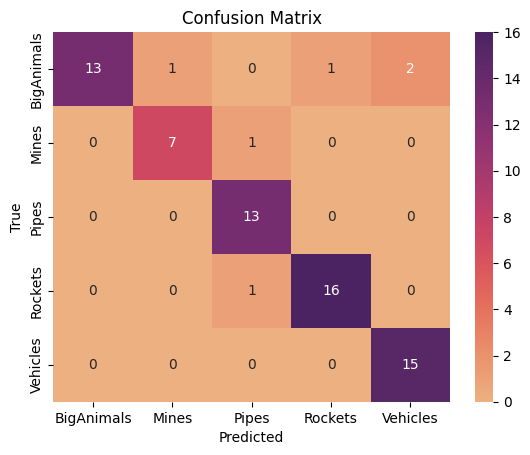

Testing: lr=0.0005, batch_size=32, optimizer=adam, weight_decay=0.001, epochs=15
Epoch 1/15, Loss: 1.1818825999895732
Epoch 2/15, Loss: 0.2903388440608978
Epoch 3/15, Loss: 0.13124746746487087
Epoch 4/15, Loss: 0.0791702756865157
Epoch 5/15, Loss: 0.04903434423936738
Epoch 6/15, Loss: 0.01758937853285008
Epoch 7/15, Loss: 0.01835271416025029
Epoch 8/15, Loss: 0.010218488104227517
Epoch 9/15, Loss: 0.014776943251490593
Epoch 10/15, Loss: 0.02602157596912649
Epoch 11/15, Loss: 0.051107267228265606
Epoch 12/15, Loss: 0.06434930674731731
Epoch 13/15, Loss: 0.06410276289615366
Epoch 14/15, Loss: 0.08378266946723063
Epoch 15/15, Loss: 0.11802118437157737
Accuracy: 88.57%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       1.00      0.76      0.87        17
       Mines       0.88      0.88      0.88         8
       Pipes       0.92      0.92      0.92        13
     Rockets       0.94      0.88      0.91        17
    Vehicles       0.75      1.

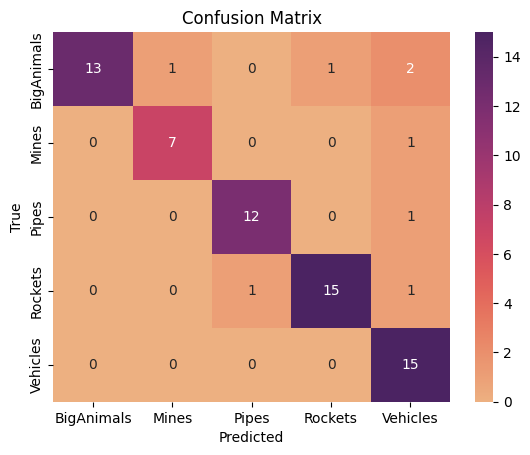

Testing: lr=0.0005, batch_size=32, optimizer=adam, weight_decay=0.001, epochs=20
Epoch 1/20, Loss: 1.1854114532470703
Epoch 2/20, Loss: 0.37305570311016506
Epoch 3/20, Loss: 0.11640427592727873
Epoch 4/20, Loss: 0.06244741752743721
Epoch 5/20, Loss: 0.03796559644656049
Epoch 6/20, Loss: 0.04214936691439814
Epoch 7/20, Loss: 0.06652184875888957
Epoch 8/20, Loss: 0.08126935135159227
Epoch 9/20, Loss: 0.06253172581394513
Epoch 10/20, Loss: 0.06067371249405874
Epoch 11/20, Loss: 0.05350350671344333
Epoch 12/20, Loss: 0.05365272875254353
Epoch 13/20, Loss: 0.021204069308522675
Epoch 14/20, Loss: 0.03237713925126526
Epoch 15/20, Loss: 0.02689446048397157
Epoch 16/20, Loss: 0.017284343174348276
Epoch 17/20, Loss: 0.017380229533753462
Epoch 18/20, Loss: 0.015198156379887627
Epoch 19/20, Loss: 0.03066767333075404
Epoch 20/20, Loss: 0.04985950201646321
Accuracy: 88.57%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       1.00      0.76      0.87      

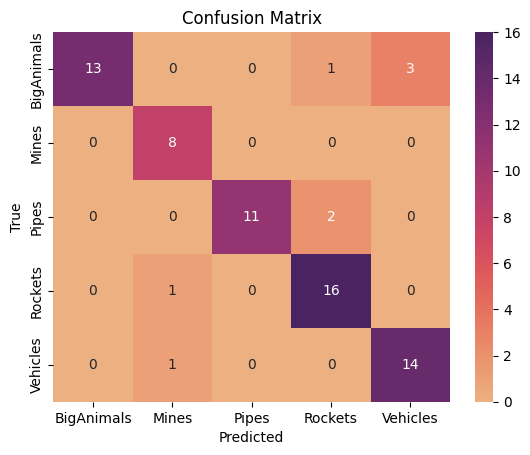

Testing: lr=0.0005, batch_size=32, optimizer=adam, weight_decay=0.0001, epochs=10
Epoch 1/10, Loss: 1.1282524863878887
Epoch 2/10, Loss: 0.3474372691578335
Epoch 3/10, Loss: 0.17122459908326468
Epoch 4/10, Loss: 0.07427806903918584
Epoch 5/10, Loss: 0.04864151920709345
Epoch 6/10, Loss: 0.026804066573580105
Epoch 7/10, Loss: 0.021855045213467546
Epoch 8/10, Loss: 0.01545118483611279
Epoch 9/10, Loss: 0.0493434424408608
Epoch 10/10, Loss: 0.0669322552987271
Accuracy: 85.71%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.80      0.94      0.86        17
       Mines       1.00      0.50      0.67         8
       Pipes       1.00      0.92      0.96        13
     Rockets       0.89      0.94      0.91        17
    Vehicles       0.75      0.80      0.77        15

    accuracy                           0.86        70
   macro avg       0.89      0.82      0.84        70
weighted avg       0.87      0.86      0.85        70



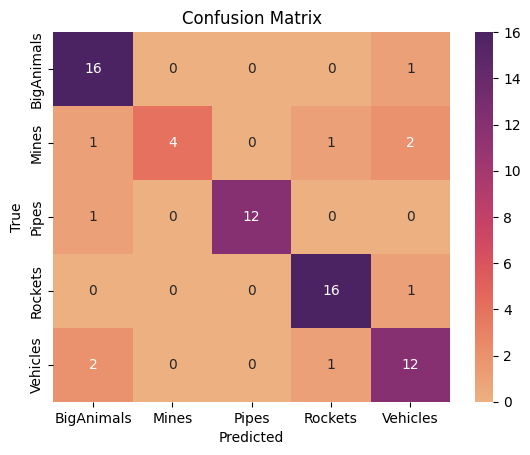

Testing: lr=0.0005, batch_size=32, optimizer=adam, weight_decay=0.0001, epochs=15
Epoch 1/15, Loss: 1.2022881309191387
Epoch 2/15, Loss: 0.3982694662279553
Epoch 3/15, Loss: 0.12623239722516802
Epoch 4/15, Loss: 0.07122105090982384
Epoch 5/15, Loss: 0.0486567338100738
Epoch 6/15, Loss: 0.04295230004936457
Epoch 7/15, Loss: 0.02365514708475934
Epoch 8/15, Loss: 0.06586546031758189
Epoch 9/15, Loss: 0.037385063970254526
Epoch 10/15, Loss: 0.03101893390218417
Epoch 11/15, Loss: 0.0185680128633976
Epoch 12/15, Loss: 0.018792966328975227
Epoch 13/15, Loss: 0.007671421342011955
Epoch 14/15, Loss: 0.005889319478430682
Epoch 15/15, Loss: 0.005205924351078768
Accuracy: 98.57%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       1.00      1.00      1.00        17
       Mines       1.00      1.00      1.00         8
       Pipes       0.93      1.00      0.96        13
     Rockets       1.00      0.94      0.97        17
    Vehicles       1.00      

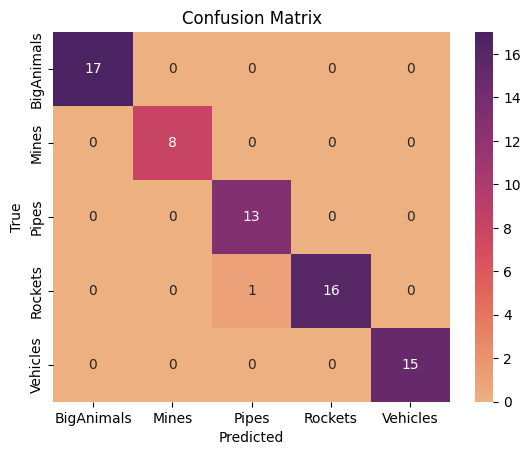

Testing: lr=0.0005, batch_size=32, optimizer=adam, weight_decay=0.0001, epochs=20
Epoch 1/20, Loss: 1.1938777565956116
Epoch 2/20, Loss: 0.3958430025312636
Epoch 3/20, Loss: 0.17750648574696648
Epoch 4/20, Loss: 0.0804284657869074
Epoch 5/20, Loss: 0.051034860105978117
Epoch 6/20, Loss: 0.05377488314277596
Epoch 7/20, Loss: 0.04000842059031129
Epoch 8/20, Loss: 0.0684331070838703
Epoch 9/20, Loss: 0.07629773972762956
Epoch 10/20, Loss: 0.03230191508515014
Epoch 11/20, Loss: 0.02899416649921073
Epoch 12/20, Loss: 0.017146933616863355
Epoch 13/20, Loss: 0.020425564454247553
Epoch 14/20, Loss: 0.01081621126892666
Epoch 15/20, Loss: 0.012447703345161345
Epoch 16/20, Loss: 0.009231630518722037
Epoch 17/20, Loss: 0.011041594332911901
Epoch 18/20, Loss: 0.046663366387494735
Epoch 19/20, Loss: 0.06476876734652454
Epoch 20/20, Loss: 0.05673446237213082
Accuracy: 84.29%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.80      0.71      0.75     

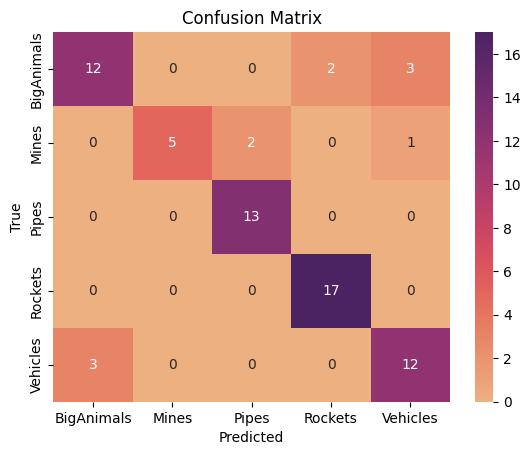

Testing: lr=0.0005, batch_size=32, optimizer=sgd, weight_decay=0.0, epochs=10
Epoch 1/10, Loss: 1.6185423268212213
Epoch 2/10, Loss: 1.443149275249905
Epoch 3/10, Loss: 1.206053998735216
Epoch 4/10, Loss: 1.0228728652000427
Epoch 5/10, Loss: 0.8494979606734382
Epoch 6/10, Loss: 0.70869470304913
Epoch 7/10, Loss: 0.5801936189333597
Epoch 8/10, Loss: 0.44831022289064193
Epoch 9/10, Loss: 0.3959735135237376
Epoch 10/10, Loss: 0.32632110516230267
Accuracy: 85.71%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.94      0.88      0.91        17
       Mines       0.71      0.62      0.67         8
       Pipes       0.81      1.00      0.90        13
     Rockets       1.00      0.82      0.90        17
    Vehicles       0.76      0.87      0.81        15

    accuracy                           0.86        70
   macro avg       0.85      0.84      0.84        70
weighted avg       0.87      0.86      0.86        70



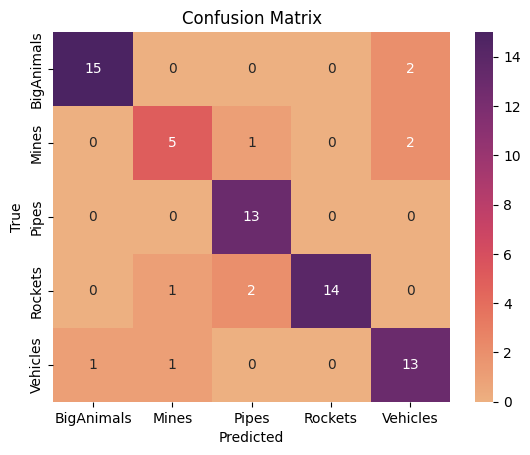

Testing: lr=0.0005, batch_size=32, optimizer=sgd, weight_decay=0.0, epochs=15
Epoch 1/15, Loss: 1.5577701860004
Epoch 2/15, Loss: 1.4261632760365803
Epoch 3/15, Loss: 1.2466687361399333
Epoch 4/15, Loss: 1.0866469873322382
Epoch 5/15, Loss: 0.8936715126037598
Epoch 6/15, Loss: 0.7577234771516588
Epoch 7/15, Loss: 0.5955373379919264
Epoch 8/15, Loss: 0.5074495805634393
Epoch 9/15, Loss: 0.37704450885454815
Epoch 10/15, Loss: 0.3433060844739278
Epoch 11/15, Loss: 0.2567979759640164
Epoch 12/15, Loss: 0.22020686831739214
Epoch 13/15, Loss: 0.19137602382236057
Epoch 14/15, Loss: 0.14938259290324318
Epoch 15/15, Loss: 0.12727029704385334
Accuracy: 85.71%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.79      0.88      0.83        17
       Mines       0.88      0.88      0.88         8
       Pipes       0.86      0.92      0.89        13
     Rockets       1.00      0.82      0.90        17
    Vehicles       0.80      0.80      0.80    

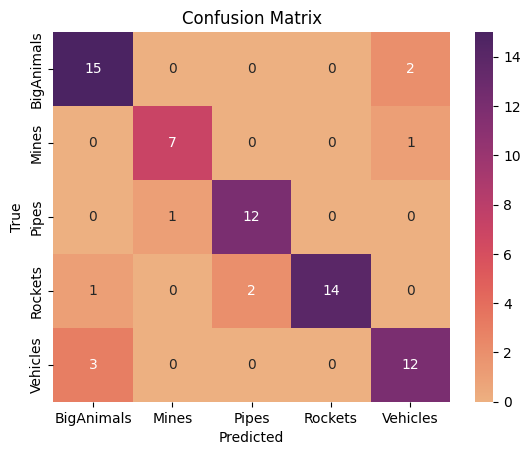

Testing: lr=0.0005, batch_size=32, optimizer=sgd, weight_decay=0.0, epochs=20
Epoch 1/20, Loss: 1.6539749834272597
Epoch 2/20, Loss: 1.467450777689616
Epoch 3/20, Loss: 1.273264275656806
Epoch 4/20, Loss: 1.0383477210998535
Epoch 5/20, Loss: 0.8864337073432075
Epoch 6/20, Loss: 0.7299569514062669
Epoch 7/20, Loss: 0.5820907983514998
Epoch 8/20, Loss: 0.4752865301238166
Epoch 9/20, Loss: 0.4035096267859141
Epoch 10/20, Loss: 0.34508704476886326
Epoch 11/20, Loss: 0.28983619146876866
Epoch 12/20, Loss: 0.2416170918279224
Epoch 13/20, Loss: 0.18552926017178428
Epoch 14/20, Loss: 0.1994136075178782
Epoch 15/20, Loss: 0.14913358953264025
Epoch 16/20, Loss: 0.13174689892265531
Epoch 17/20, Loss: 0.12341745528909895
Epoch 18/20, Loss: 0.10908824702103932
Epoch 19/20, Loss: 0.0957694302002589
Epoch 20/20, Loss: 0.09170023848613103
Accuracy: 87.14%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.82      0.82      0.82        17
       Mines   

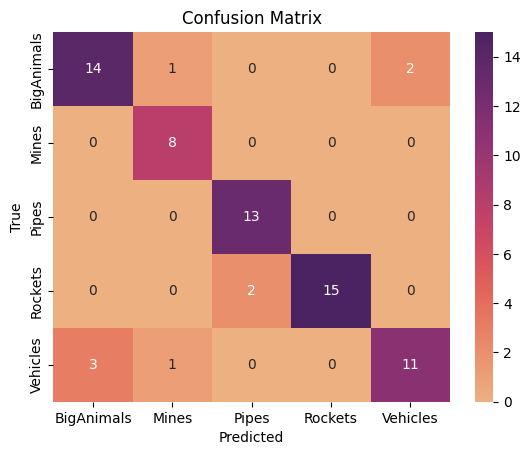

Testing: lr=0.0005, batch_size=32, optimizer=sgd, weight_decay=0.001, epochs=10
Epoch 1/10, Loss: 1.6699597305721707
Epoch 2/10, Loss: 1.4549390739864774
Epoch 3/10, Loss: 1.2595728503333197
Epoch 4/10, Loss: 1.065930141343011
Epoch 5/10, Loss: 0.8799008991983202
Epoch 6/10, Loss: 0.7300660742653741
Epoch 7/10, Loss: 0.6115087734328376
Epoch 8/10, Loss: 0.5091517037815518
Epoch 9/10, Loss: 0.40183665023909676
Epoch 10/10, Loss: 0.3406846390830146
Accuracy: 82.86%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.79      0.88      0.83        17
       Mines       0.86      0.75      0.80         8
       Pipes       0.80      0.92      0.86        13
     Rockets       1.00      0.82      0.90        17
    Vehicles       0.73      0.73      0.73        15

    accuracy                           0.83        70
   macro avg       0.84      0.82      0.83        70
weighted avg       0.84      0.83      0.83        70



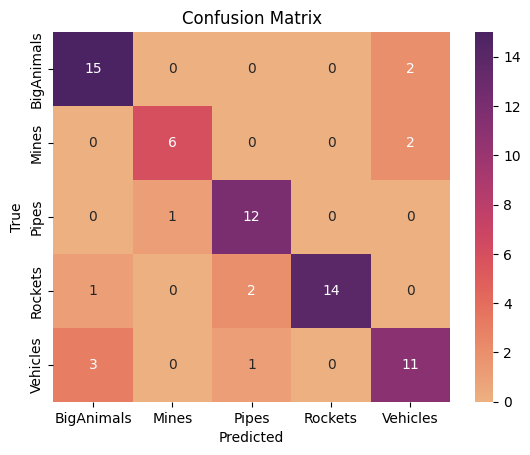

Testing: lr=0.0005, batch_size=32, optimizer=sgd, weight_decay=0.001, epochs=15
Epoch 1/15, Loss: 1.6300538645850287
Epoch 2/15, Loss: 1.4479717281129625
Epoch 3/15, Loss: 1.2555540800094604
Epoch 4/15, Loss: 1.0304742124345567
Epoch 5/15, Loss: 0.8643206622865465
Epoch 6/15, Loss: 0.732938700252109
Epoch 7/15, Loss: 0.5998302830590142
Epoch 8/15, Loss: 0.4829535351859199
Epoch 9/15, Loss: 0.4154437118106418
Epoch 10/15, Loss: 0.3368792368306054
Epoch 11/15, Loss: 0.2681366122431225
Epoch 12/15, Loss: 0.23980586065186393
Epoch 13/15, Loss: 0.20627680089738634
Epoch 14/15, Loss: 0.15449201398425633
Epoch 15/15, Loss: 0.1249669889609019
Accuracy: 87.14%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.83      0.88      0.86        17
       Mines       0.73      1.00      0.84         8
       Pipes       1.00      1.00      1.00        13
     Rockets       1.00      0.76      0.87        17
    Vehicles       0.80      0.80      0.80  

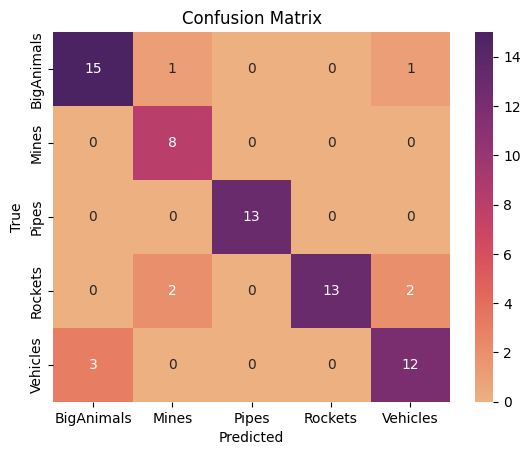

Testing: lr=0.0005, batch_size=32, optimizer=sgd, weight_decay=0.001, epochs=20
Epoch 1/20, Loss: 1.635984738667806
Epoch 2/20, Loss: 1.4332603348626032
Epoch 3/20, Loss: 1.2311367458767362
Epoch 4/20, Loss: 1.0685898794068232
Epoch 5/20, Loss: 0.9075414604610867
Epoch 6/20, Loss: 0.7600652707947625
Epoch 7/20, Loss: 0.613687558306588
Epoch 8/20, Loss: 0.49166387650701737
Epoch 9/20, Loss: 0.433099498351415
Epoch 10/20, Loss: 0.36731506056255764
Epoch 11/20, Loss: 0.2783685541815228
Epoch 12/20, Loss: 0.26365343895223403
Epoch 13/20, Loss: 0.19366565512286293
Epoch 14/20, Loss: 0.19377161728011238
Epoch 15/20, Loss: 0.15463822335004807
Epoch 16/20, Loss: 0.14514446672466066
Epoch 17/20, Loss: 0.1175158785449134
Epoch 18/20, Loss: 0.09437454160716799
Epoch 19/20, Loss: 0.09242624416947365
Epoch 20/20, Loss: 0.0909551659391986
Accuracy: 90.00%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.77      1.00      0.87        17
       Mines 

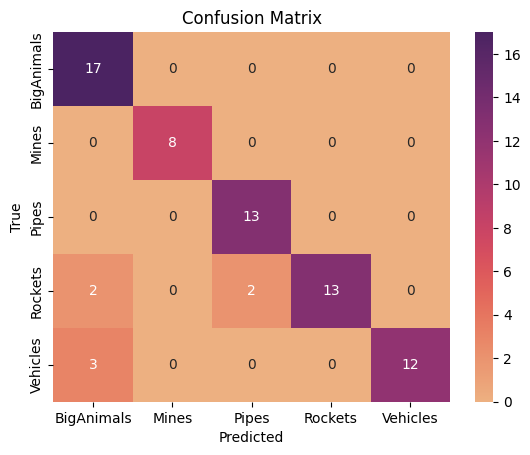

Testing: lr=0.0005, batch_size=32, optimizer=sgd, weight_decay=0.0001, epochs=10
Epoch 1/10, Loss: 1.6626701884799533
Epoch 2/10, Loss: 1.48240417904324
Epoch 3/10, Loss: 1.2649415996339586
Epoch 4/10, Loss: 1.0688594381014507
Epoch 5/10, Loss: 0.8802638782395257
Epoch 6/10, Loss: 0.7580643097559611
Epoch 7/10, Loss: 0.6077083746592203
Epoch 8/10, Loss: 0.5416516330507066
Epoch 9/10, Loss: 0.4300520684983995
Epoch 10/10, Loss: 0.34411654538578457
Accuracy: 87.14%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.83      0.88      0.86        17
       Mines       1.00      1.00      1.00         8
       Pipes       0.81      1.00      0.90        13
     Rockets       0.88      0.88      0.88        17
    Vehicles       0.91      0.67      0.77        15

    accuracy                           0.87        70
   macro avg       0.89      0.89      0.88        70
weighted avg       0.88      0.87      0.87        70



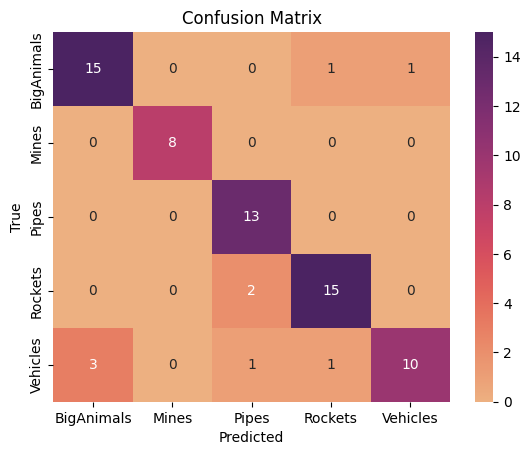

Testing: lr=0.0005, batch_size=32, optimizer=sgd, weight_decay=0.0001, epochs=15
Epoch 1/15, Loss: 1.6073914633856878
Epoch 2/15, Loss: 1.4389283789528742
Epoch 3/15, Loss: 1.2481906943851047
Epoch 4/15, Loss: 1.030697888798184
Epoch 5/15, Loss: 0.8425048987070719
Epoch 6/15, Loss: 0.7033152050442166
Epoch 7/15, Loss: 0.5676133930683136
Epoch 8/15, Loss: 0.4902106291717953
Epoch 9/15, Loss: 0.40223871337042916
Epoch 10/15, Loss: 0.34872238834698993
Epoch 11/15, Loss: 0.25537870327631634
Epoch 12/15, Loss: 0.23315455185042488
Epoch 13/15, Loss: 0.1884752106335428
Epoch 14/15, Loss: 0.14123124298122194
Epoch 15/15, Loss: 0.13845605899890265
Accuracy: 88.57%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.83      0.88      0.86        17
       Mines       0.80      1.00      0.89         8
       Pipes       0.87      1.00      0.93        13
     Rockets       1.00      0.82      0.90        17
    Vehicles       0.92      0.80      0.

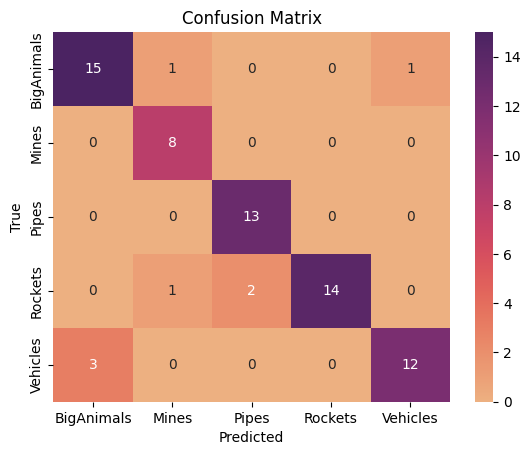

Testing: lr=0.0005, batch_size=32, optimizer=sgd, weight_decay=0.0001, epochs=20
Epoch 1/20, Loss: 1.622553335295783
Epoch 2/20, Loss: 1.4437888463338215
Epoch 3/20, Loss: 1.233663558959961
Epoch 4/20, Loss: 1.0308248003323872
Epoch 5/20, Loss: 0.8579669992129008
Epoch 6/20, Loss: 0.6876192953851488
Epoch 7/20, Loss: 0.5675866040918562
Epoch 8/20, Loss: 0.45587100585301715
Epoch 9/20, Loss: 0.3770935932795207
Epoch 10/20, Loss: 0.32021088070339626
Epoch 11/20, Loss: 0.24894191986984676
Epoch 12/20, Loss: 0.20878603392177159
Epoch 13/20, Loss: 0.15530303368965784
Epoch 14/20, Loss: 0.13905773394637638
Epoch 15/20, Loss: 0.14410521503951815
Epoch 16/20, Loss: 0.11815354062451257
Epoch 17/20, Loss: 0.09021488742695914
Epoch 18/20, Loss: 0.09323059560524093
Epoch 19/20, Loss: 0.06752428536613782
Epoch 20/20, Loss: 0.06095564613739649
Accuracy: 85.71%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.82      0.82      0.82        17
       M

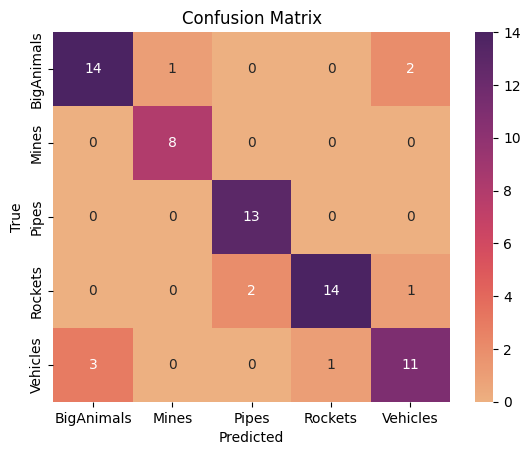

Testing: lr=0.0005, batch_size=32, optimizer=rmsprop, weight_decay=0.0, epochs=10
Epoch 1/10, Loss: 1.8758233653174505
Epoch 2/10, Loss: 1.4906758334901598
Epoch 3/10, Loss: 1.161061121357812
Epoch 4/10, Loss: 0.8935961325963339
Epoch 5/10, Loss: 0.7650310926967197
Epoch 6/10, Loss: 0.7034165859222412
Epoch 7/10, Loss: 0.6160604920652177
Epoch 8/10, Loss: 0.506106909778383
Epoch 9/10, Loss: 0.5074563490019904
Epoch 10/10, Loss: 0.5537469469838672
Accuracy: 70.00%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.85      0.65      0.73        17
       Mines       0.62      0.62      0.62         8
       Pipes       1.00      0.38      0.56        13
     Rockets       0.59      0.94      0.73        17
    Vehicles       0.71      0.80      0.75        15

    accuracy                           0.70        70
   macro avg       0.75      0.68      0.68        70
weighted avg       0.76      0.70      0.69        70



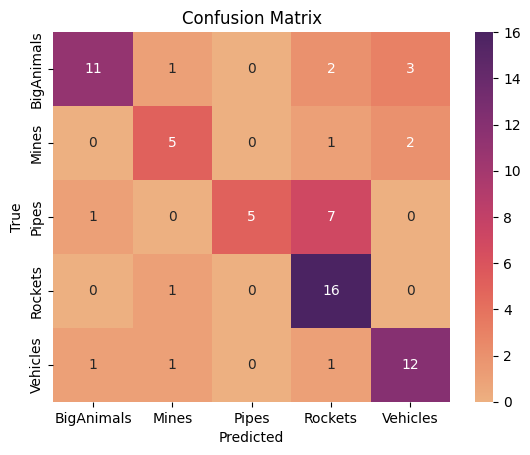

Testing: lr=0.0005, batch_size=32, optimizer=rmsprop, weight_decay=0.0, epochs=15
Epoch 1/15, Loss: 1.973672972785102
Epoch 2/15, Loss: 1.3532684644063313
Epoch 3/15, Loss: 1.0535351634025574
Epoch 4/15, Loss: 1.019169807434082
Epoch 5/15, Loss: 0.6720474428600736
Epoch 6/15, Loss: 0.5004097256395552
Epoch 7/15, Loss: 0.6173005004723867
Epoch 8/15, Loss: 0.33781857788562775
Epoch 9/15, Loss: 0.280622661113739
Epoch 10/15, Loss: 0.2507521038254102
Epoch 11/15, Loss: 0.17886435819996727
Epoch 12/15, Loss: 0.07990230454338922
Epoch 13/15, Loss: 0.06469590382443534
Epoch 14/15, Loss: 0.11069058585498068
Epoch 15/15, Loss: 0.25910763608084786
Accuracy: 84.29%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.89      0.94      0.91        17
       Mines       0.67      0.50      0.57         8
       Pipes       0.92      0.85      0.88        13
     Rockets       0.76      0.94      0.84        17
    Vehicles       0.92      0.80      0.8

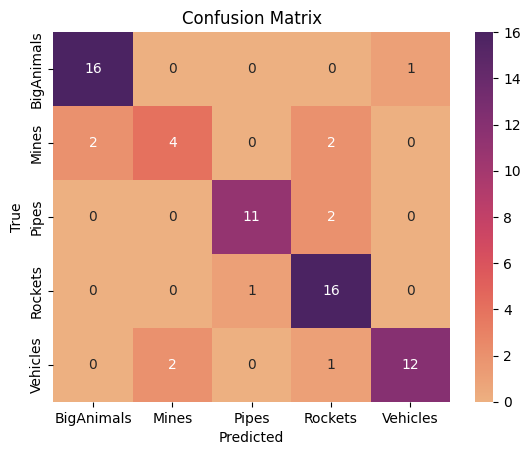

Testing: lr=0.0005, batch_size=32, optimizer=rmsprop, weight_decay=0.0, epochs=20
Epoch 1/20, Loss: 2.061324119567871
Epoch 2/20, Loss: 1.1498430238829718
Epoch 3/20, Loss: 0.9452117946412828
Epoch 4/20, Loss: 0.6674680378701952
Epoch 5/20, Loss: 0.6147173643112183
Epoch 6/20, Loss: 0.45386726823117995
Epoch 7/20, Loss: 0.3017270267009735
Epoch 8/20, Loss: 0.36761152413156295
Epoch 9/20, Loss: 0.237680498096678
Epoch 10/20, Loss: 0.10939009115099907
Epoch 11/20, Loss: 0.15807834598753187
Epoch 12/20, Loss: 0.1334673778878318
Epoch 13/20, Loss: 0.08541511547648245
Epoch 14/20, Loss: 0.09897213843133715
Epoch 15/20, Loss: 0.027038633202513058
Epoch 16/20, Loss: 0.05295069453616937
Epoch 17/20, Loss: 0.01979501110812028
Epoch 18/20, Loss: 0.010549490805715322
Epoch 19/20, Loss: 0.01394290412362251
Epoch 20/20, Loss: 0.10535884472644991
Accuracy: 68.57%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.88      0.88      0.88        17
     

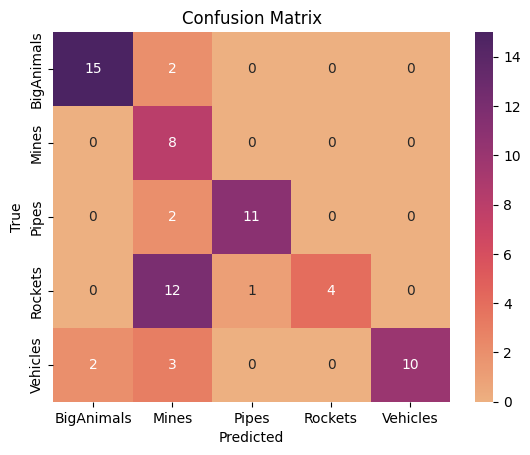

Testing: lr=0.0005, batch_size=32, optimizer=rmsprop, weight_decay=0.001, epochs=10
Epoch 1/10, Loss: 1.9481786092122395
Epoch 2/10, Loss: 1.472806692123413
Epoch 3/10, Loss: 1.1695554322666593
Epoch 4/10, Loss: 1.222515384356181
Epoch 5/10, Loss: 1.0642003681924608
Epoch 6/10, Loss: 0.8511108822292752
Epoch 7/10, Loss: 0.8211394415961372
Epoch 8/10, Loss: 0.6344676481352912
Epoch 9/10, Loss: 0.5603294571240743
Epoch 10/10, Loss: 0.4630056586530473
Accuracy: 72.86%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.61      0.82      0.70        17
       Mines       0.67      0.25      0.36         8
       Pipes       0.91      0.77      0.83        13
     Rockets       0.67      0.94      0.78        17
    Vehicles       1.00      0.60      0.75        15

    accuracy                           0.73        70
   macro avg       0.77      0.68      0.69        70
weighted avg       0.77      0.73      0.72        70



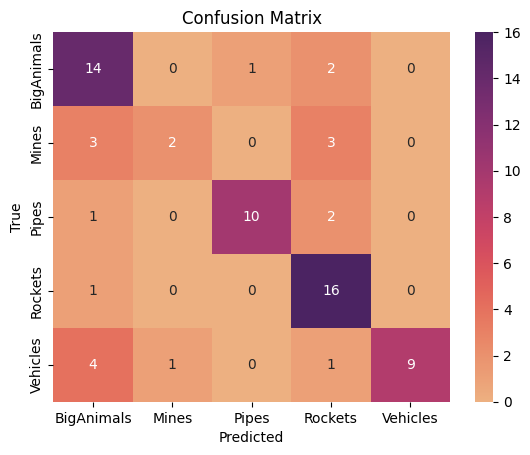

Testing: lr=0.0005, batch_size=32, optimizer=rmsprop, weight_decay=0.001, epochs=15
Epoch 1/15, Loss: 1.7286857631471422
Epoch 2/15, Loss: 1.184478521347046
Epoch 3/15, Loss: 0.9611349304517111
Epoch 4/15, Loss: 0.754391974873013
Epoch 5/15, Loss: 0.8619679345024956
Epoch 6/15, Loss: 0.47661444379223716
Epoch 7/15, Loss: 0.4843539165125953
Epoch 8/15, Loss: 0.2999446756309933
Epoch 9/15, Loss: 0.17338945178522003
Epoch 10/15, Loss: 0.2037213941415151
Epoch 11/15, Loss: 0.0913221426308155
Epoch 12/15, Loss: 0.3323397744033072
Epoch 13/15, Loss: 0.23452316390143502
Epoch 14/15, Loss: 0.09625615634851986
Epoch 15/15, Loss: 0.05806256644427776
Accuracy: 88.57%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.87      0.76      0.81        17
       Mines       0.88      0.88      0.88         8
       Pipes       0.93      1.00      0.96        13
     Rockets       0.89      1.00      0.94        17
    Vehicles       0.86      0.80      0

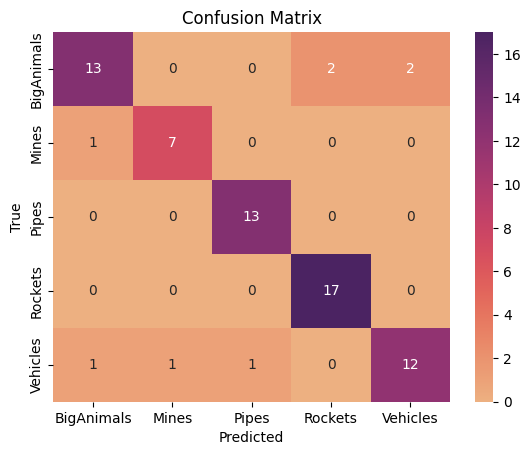

Testing: lr=0.0005, batch_size=32, optimizer=rmsprop, weight_decay=0.001, epochs=20
Epoch 1/20, Loss: 1.924873603714837
Epoch 2/20, Loss: 1.2731056544515822
Epoch 3/20, Loss: 1.0078652567333646
Epoch 4/20, Loss: 0.8814254800478617
Epoch 5/20, Loss: 0.7387583520677354
Epoch 6/20, Loss: 0.7511376672320895
Epoch 7/20, Loss: 0.554724825753106
Epoch 8/20, Loss: 0.38360048168235356
Epoch 9/20, Loss: 0.25084007448620266
Epoch 10/20, Loss: 0.35317617654800415
Epoch 11/20, Loss: 0.2175022665825155
Epoch 12/20, Loss: 0.2655806317925453
Epoch 13/20, Loss: 0.11774162865347332
Epoch 14/20, Loss: 0.041378179358111486
Epoch 15/20, Loss: 0.04377759941336182
Epoch 16/20, Loss: 0.06934506518559323
Epoch 17/20, Loss: 0.6092256738079919
Epoch 18/20, Loss: 0.25317177755965126
Epoch 19/20, Loss: 0.12296730735235745
Epoch 20/20, Loss: 0.03693764056596491
Accuracy: 87.14%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       1.00      0.82      0.90        17
      

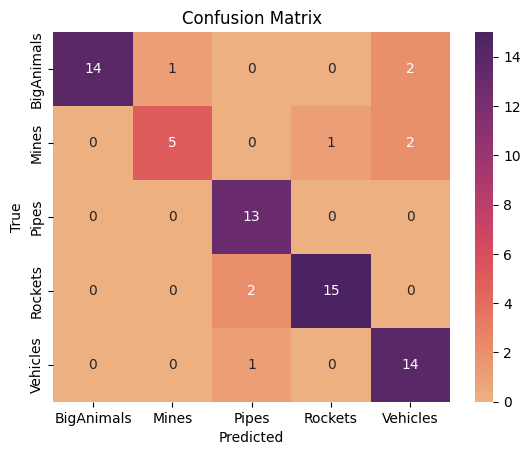

Testing: lr=0.0005, batch_size=32, optimizer=rmsprop, weight_decay=0.0001, epochs=10
Epoch 1/10, Loss: 1.9251107374827068
Epoch 2/10, Loss: 1.3292252752516005
Epoch 3/10, Loss: 0.9746073153283861
Epoch 4/10, Loss: 0.7743019329177009
Epoch 5/10, Loss: 0.5928796430428823
Epoch 6/10, Loss: 0.4649284879366557
Epoch 7/10, Loss: 0.4175790846347809
Epoch 8/10, Loss: 0.23189247565137017
Epoch 9/10, Loss: 0.11045403199063407
Epoch 10/10, Loss: 0.2484283157520824
Accuracy: 62.86%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.48      0.94      0.64        17
       Mines       0.14      0.12      0.13         8
       Pipes       0.90      0.69      0.78        13
     Rockets       0.86      0.71      0.77        17
    Vehicles       1.00      0.40      0.57        15

    accuracy                           0.63        70
   macro avg       0.68      0.57      0.58        70
weighted avg       0.72      0.63      0.63        70



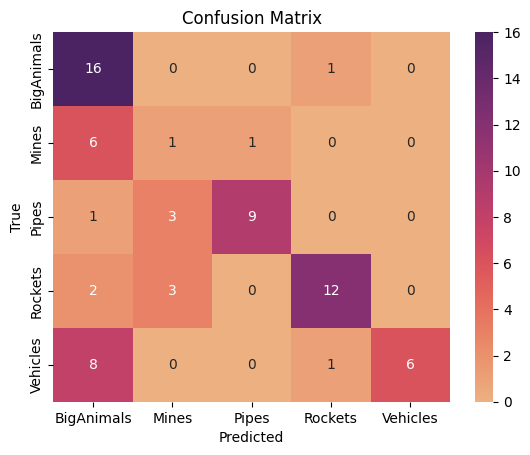

Testing: lr=0.0005, batch_size=32, optimizer=rmsprop, weight_decay=0.0001, epochs=15
Epoch 1/15, Loss: 1.9178057379192777
Epoch 2/15, Loss: 1.5310031572977703
Epoch 3/15, Loss: 1.2977900902430217
Epoch 4/15, Loss: 1.0990778671370611
Epoch 5/15, Loss: 0.8849306570159065
Epoch 6/15, Loss: 0.6698159144984351
Epoch 7/15, Loss: 0.5705255104435815
Epoch 8/15, Loss: 0.4191705452071296
Epoch 9/15, Loss: 0.4887068834569719
Epoch 10/15, Loss: 0.3021044847038057
Epoch 11/15, Loss: 0.14699797415071064
Epoch 12/15, Loss: 0.10292447275585598
Epoch 13/15, Loss: 0.07201496263345082
Epoch 14/15, Loss: 0.09100901521742344
Epoch 15/15, Loss: 0.14509018220835262
Accuracy: 44.29%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       0.29      0.47      0.36        17
       Mines       0.24      0.50      0.32         8
       Pipes       1.00      0.00      0.00        13
     Rockets       0.89      0.47      0.62        17
    Vehicles       0.69      0.73    

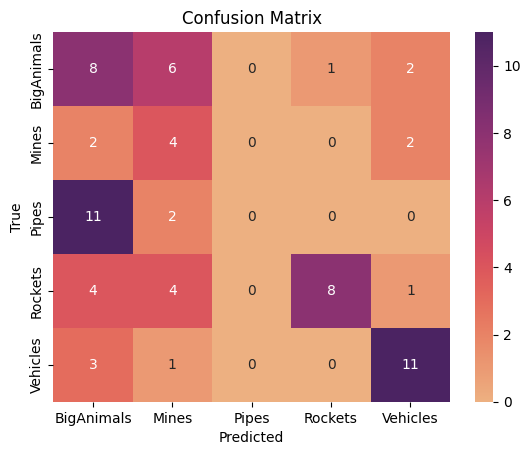

Testing: lr=0.0005, batch_size=32, optimizer=rmsprop, weight_decay=0.0001, epochs=20
Epoch 1/20, Loss: 1.9088517957263522
Epoch 2/20, Loss: 1.1733593609597948
Epoch 3/20, Loss: 1.126536336210039
Epoch 4/20, Loss: 0.8556306031015184
Epoch 5/20, Loss: 0.7017217212253146
Epoch 6/20, Loss: 0.6234767999913957
Epoch 7/20, Loss: 0.4008781048986647
Epoch 8/20, Loss: 0.2989761581023534
Epoch 9/20, Loss: 0.2887303051021364
Epoch 10/20, Loss: 0.3665873176521725
Epoch 11/20, Loss: 0.2666436806321144
Epoch 12/20, Loss: 0.16129101895623738
Epoch 13/20, Loss: 0.06305722354186906
Epoch 14/20, Loss: 0.05196930136945513
Epoch 15/20, Loss: 0.06121497415006161
Epoch 16/20, Loss: 0.03978519245154328
Epoch 17/20, Loss: 0.10910154754916827
Epoch 18/20, Loss: 0.08675906496743362
Epoch 19/20, Loss: 0.7211175395382775
Epoch 20/20, Loss: 0.23324084281921387
Accuracy: 88.57%
Classification Report:
               precision    recall  f1-score   support

  BigAnimals       1.00      0.82      0.90        17
       

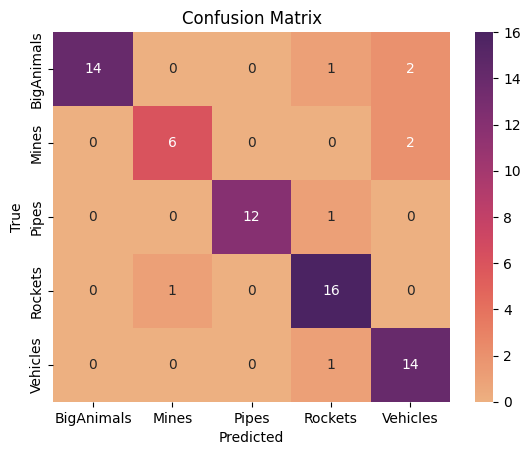

In [8]:
# Store results
results = []

for lr in param_grid['learning_rate']:
    for batch_size in param_grid['batch_size']:
        for optimizer_name in param_grid['optimizer']:
            for weight_decay in param_grid['weight_decay']:
                for num_epochs in param_grid['num_epochs']:
                    print(f"Testing: lr={lr}, batch_size={batch_size}, optimizer={optimizer_name}, weight_decay={weight_decay}, epochs={num_epochs}")

                    # Reload dataset with specified batch size
                    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
                    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

                    # Load model
                    model = load_densenet(num_classes=len(class_names))
                    model = model.to(device)

                    # Define optimizer and loss function
                    optimizer = get_optimizer(optimizer_name, model, lr, weight_decay)
                    criterion = nn.CrossEntropyLoss()

                    # Training loop
                    for epoch in range(num_epochs):
                        model.train()
                        running_loss = 0.0
                        for inputs, labels in train_loader:
                            inputs, labels = inputs.to(device), labels.to(device)
                            optimizer.zero_grad()
                            outputs = model(inputs)
                            loss = criterion(outputs, labels)
                            loss.backward()
                            optimizer.step()
                            running_loss += loss.item()

                        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / len(train_loader)}")

                    # Testing loop
                    model.eval()
                    y_true = []
                    y_pred = []
                    with torch.no_grad():
                        for inputs, labels in test_loader:
                            inputs, labels = inputs.to(device), labels.to(device)
                            outputs = model(inputs)
                            _, predictions = torch.max(outputs, 1)
                            y_true.extend(labels.cpu().numpy())
                            y_pred.extend(predictions.cpu().numpy())

                    # Calculate metrics
                    accuracy = accuracy_score(y_true, y_pred)
                    class_report = classification_report(y_true, y_pred, target_names=class_names, zero_division=1)
                    conf_matrix = confusion_matrix(y_true, y_pred)

                    print(f"Accuracy: {accuracy * 100:.2f}%")
                    print("Classification Report:\n", class_report)

                    # Save metrics
                    results.append({
                        'params': {
                            'learning_rate': lr,
                            'batch_size': batch_size,
                            'optimizer': optimizer_name,
                            'weight_decay': weight_decay,
                            'num_epochs': num_epochs
                        },
                        'accuracy': accuracy,
                        'classification_report': class_report,
                        'confusion_matrix': conf_matrix
                    })

                    # Plot confusion matrix
                    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=sns.color_palette("flare", as_cmap=True), xticklabels=class_names, yticklabels=class_names)
                    plt.title('Confusion Matrix')
                    plt.xlabel('Predicted')
                    plt.ylabel('True')
                    plt.show()
                    plt.close()

In [ ]:
'''
# Parameter grid for hyperparameter search

'learning_rate': [0.001, 0.0001, 0.0005],
'batch_size': [16, 32],
'optimizer': ['adam', 'sgd', 'rmsprop'],
'weight_decay': [0.0, 1e-3, 1e-4],
'num_epochs': [10, 15, 20]

'''

In [10]:
# Save the best model
best_result = max(results, key=lambda x: x['accuracy'])
best_model = load_densenet(num_classes=len(class_names))

# Save the model in two formats
torch.save(best_model.state_dict(), "densenet121_state_dict.pth")  # Save state_dict
torch.save(best_model, "densenet121_state_complete.pth")  # Save entire model


In [12]:
print(best_result)

{'params': {'learning_rate': 0.0005, 'batch_size': 32, 'optimizer': 'adam', 'weight_decay': 0.0001, 'num_epochs': 15}, 'accuracy': 0.9857142857142858, 'classification_report': '              precision    recall  f1-score   support\n\n  BigAnimals       1.00      1.00      1.00        17\n       Mines       1.00      1.00      1.00         8\n       Pipes       0.93      1.00      0.96        13\n     Rockets       1.00      0.94      0.97        17\n    Vehicles       1.00      1.00      1.00        15\n\n    accuracy                           0.99        70\n   macro avg       0.99      0.99      0.99        70\nweighted avg       0.99      0.99      0.99        70\n', 'confusion_matrix': array([[17,  0,  0,  0,  0],
       [ 0,  8,  0,  0,  0],
       [ 0,  0, 13,  0,  0],
       [ 0,  0,  1, 16,  0],
       [ 0,  0,  0,  0, 15]])}


In [14]:
check = torch.load("C:/Users/rishi/Desktop/JHU/Critical Infrastructure Protection/Major Project/Data Sets/Sonar/densenet121/densenet121_state_dict.pth")
for param_name, param_tensor in check.items():
    print(f"Parameter: {param_name}, Shape: {param_tensor.shape}")

Parameter: features.conv0.weight, Shape: torch.Size([64, 3, 7, 7])
Parameter: features.norm0.weight, Shape: torch.Size([64])
Parameter: features.norm0.bias, Shape: torch.Size([64])
Parameter: features.norm0.running_mean, Shape: torch.Size([64])
Parameter: features.norm0.running_var, Shape: torch.Size([64])
Parameter: features.norm0.num_batches_tracked, Shape: torch.Size([])
Parameter: features.denseblock1.denselayer1.norm1.weight, Shape: torch.Size([64])
Parameter: features.denseblock1.denselayer1.norm1.bias, Shape: torch.Size([64])
Parameter: features.denseblock1.denselayer1.norm1.running_mean, Shape: torch.Size([64])
Parameter: features.denseblock1.denselayer1.norm1.running_var, Shape: torch.Size([64])
Parameter: features.denseblock1.denselayer1.norm1.num_batches_tracked, Shape: torch.Size([])
Parameter: features.denseblock1.denselayer1.conv1.weight, Shape: torch.Size([128, 64, 1, 1])
Parameter: features.denseblock1.denselayer1.norm2.weight, Shape: torch.Size([128])
Parameter: featur

C:\Users\rishi\AppData\Local\Temp\ipykernel_10492\1793340680.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  check = torch.load("C:/Users/rishi/Desktop/JHU/Critical Infr